In [1]:
# plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches


# main
import pandas as pd
import numpy as np

# misc
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
pd.set_option('display.max_columns', 500)

In [2]:
data = pd.read_csv('AnalyticsQuestionnairePitchData.csv')
data

PitchId  GamePk PitcherHand        PitchCall PitchType  BatterId  \
0        231       1           L    called_strike        CH        19   
1        384       1           L             ball        CU        19   
2        616       1           L        field_out        SL        19   
3        503       1           L             ball        SI        24   
4        322       1           L  swinging_strike        CU        24   
..       ...     ...         ...              ...       ...       ...   
615       67       2           R  swinging_strike        SL        10   
616       99       2           R     blocked_ball        SL        10   
617      609       2           R     blocked_ball        SL        10   
618      236       2           R             ball        FC        10   
619       68       2           R        strikeout        FC        10   

     PitcherId BatterSide  Inning  IsTop  Balls  Strikes  Outs  PostBalls  \
0           11          R       1      1      0        0     0          0   
1           11          R       1      1      0        1     0          1   
2           11          R       1      1      1        1     0          1   
3           11          L       1      1      0        0     1          1   
4           11          L       1      1      1        0     1          1   
..         ...        ...     ...    ...    ...      ...   ...        ...   
615          3          R       9      0      0        1     2          0   
616          3          R       9      0      0        2     2          1   
617          3          R       9      0      1        2     2          2   
618          3          R       9      0      2        2     2          3   
619          3          R       9      0      3        2     2          3   

     PostStrikes  PostOuts  PitchNumber  AtBatNumber  AwayTeamID  VenueID  \
0              1         0            1            1           1        1   
1              1         0            2            1           1        1   
2              1         1            3            1           1        1   
3              0         1            1            2           1        1   
4              1         1            2            2           1        1   
..           ...       ...          ...          ...         ...      ...   
615            2         2            2           73           1        2   
616            2         2            3           73           1        2   
617            2         2            4           73           1        2   
618            2         2            5           73           1        2   
619            3         3            6           73           1        2   

     HomeTeamID  StrikeZoneTop  StrikeZoneBottom  ReleaseExtension  \
0             2           3.34              1.49          6.333190   
1             2           3.22              1.49          6.180109   
2             2           3.29              1.49          6.456011   
3             2           3.32              1.37          6.374740   
4             2           3.55              1.63          6.449741   
..          ...            ...               ...               ...   
615           1           3.32              1.51          7.128313   
616           1           3.29              1.53          7.158543   
617           1           3.25              1.48          7.098805   
618           1           3.29              1.46          7.134882   
619           1           3.32              1.51          7.243216   

     ReleaseAngle  ReleaseSpinAxis  ReleasePositionX  ReleasePositionY  \
0       -0.982596       129.001968          1.829443         54.166813   
1       -0.145756       325.680359          1.922387         54.319893   
2       -0.273241       147.066055          2.027967         54.043991   
3       -0.689673       133.912903          2.047452         54.125263   
4       -0.469257       324.051544          1.974079         54.050

In [3]:
data.isna().sum()[data.isna().sum()>0]

PitchType                            19
ReleaseExtension                     19
ReleaseAngle                         19
ReleaseSpinAxis                      19
ReleasePositionX                     19
ReleasePositionY                     19
ReleasePositionZ                     19
ReleaseSpeed                         19
ReleaseDirection                     19
ReleaseSpinRate                      19
TrajectoryHorizontalBreak            19
TrajectoryVerticalBreakInduced       19
TrajectoryZoneSpeed                  19
TrajectoryVerticalApproachAngle      19
TrajectoryPfxHorz                    19
TrajectoryPfxVert                    19
TrajectoryEffectiveVelocity          19
TrajectoryHorizontalApproachAngle    19
TrajectoryVerticalBreak              19
TrajectoryLocationX                  19
TrajectoryLocationY                  19
TrajectoryLocationZ                  19
SpinVectorX                          19
SpinVectorY                          19
SpinVectorZ                          19


In [4]:
# remove pickoff attempt, since only 19 pickoff attempts
data = data.dropna().reset_index(drop=True)

In [5]:
data['PitcherId'].value_counts()

1     198
11     97
7      75
5      26
6      23
9      22
3      21
12     20
15     17
10     17
13     15
17     15
14     14
4      12
16     11
2      10
8       8
Name: PitcherId, dtype: int64

In [6]:
data['PitcherHand'].value_counts()

R    435
L    166
Name: PitcherHand, dtype: int64

In [7]:
data.groupby('PitcherId')['PitchType'].value_counts()

PitcherId  PitchType
1          FF           87
           SL           32
           CH           30
           CU           27
           FC           22
2          SL            4
           CH            3
           FF            2
           SI            1
3          FC           15
           SL            5
           SI            1
4          CH            4
           FC            4
           FF            4
5          SL           14
           CU            8
           SI            3
           FF            1
6          KC           12
           FF            5
           CH            3
           SI            3
7          FF           21
           SI           20
           CU           13
           SL           11
           FC           10
8          SI            5
           FC            1
           FF            1
           SL            1
9          SL           13
           FF            9
10         SL            9
           FF            8
11     

In [8]:
data.head(10)

PitchId  GamePk PitcherHand        PitchCall PitchType  BatterId  \
0      231       1           L    called_strike        CH        19   
1      384       1           L             ball        CU        19   
2      616       1           L        field_out        SL        19   
3      503       1           L             ball        SI        24   
4      322       1           L  swinging_strike        CU        24   
5      502       1           L           single        SI        24   
6      606       1           L             ball        CH        21   
7      579       1           L    called_strike        CH        21   
8      598       1           L             ball        SL        21   
9        1       1           L             ball        CH        21   

   PitcherId BatterSide  Inning  IsTop  Balls  Strikes  Outs  PostBalls  \
0         11          R       1      1      0        0     0          0   
1         11          R       1      1      0        1     0          1   
2         11          R       1      1      1        1     0          1   
3         11          L       1      1      0        0     1          1   
4         11          L       1      1      1        0     1          1   
5         11          L       0      1      1        1     1          1   
6         11          R       1      1      0        0     1          1   
7         11          R       1      1      1        0     1          1   
8         11          R       1      1      1        1     1          2   
9         11          R       1      1      2        1     1          3   

   PostStrikes  PostOuts  PitchNumber  AtBatNumber  AwayTeamID  VenueID  \
0            1         0            1            1           1        1   
1            1         0            2            1           1        1   
2            1         1            3            1           1        1   
3            0         1            1            2           1        1   
4            1         1            2            2           1        1   
5            1         1            3            2           1        1   
6            0         1            1            3           1        1   
7            1         1            2            3           1        1   
8            1         1            3            3           1        1   
9            1         1            4            3           1        1   

   HomeTeamID  StrikeZoneTop  StrikeZoneBottom  ReleaseExtension  \
0           2           3.34              1.49          6.333190   
1           2           3.22              1.49          6.180109   
2           2           3.29              1.49          6.456011   
3           2           3.32              1.37          6.374740   
4           2           3.55              1.63          6.449741   
5           2           3.55              1.63          6.358619   
6           2           3.35              1.59          6.418847   
7           2           3.33              1.59          6.305537   
8           2           3.35              1.59          6.369079   
9           2           3.24              1.59          6.506008   

   ReleaseAngle  ReleaseSpinAxis  ReleasePositionX  ReleasePositionY  \
0     -0.982596       129.001968          1.829443         54.166813   
1     -0.145756       325.680359          1.922387         54.319893   
2     -0.273241       147.066055          2.027967         54.043991   
3     -0.689673       133.912903          2.047452         54.125263   
4     -0.469257       324.051544          1.974079         54.050262   
5     -1.071078       129.930801          2.032322         54.141384   
6     -2.678739       136.527023          1.910468         54.081154   
7     -1.649917       132.622604          1.990832         54.194466   
8     -0.629451       153.101807          2.432913         54.130924   
9     -2.249441       126.121094          2.033803         53.993992   

   ReleasePositionZ  Releas

In [9]:
data[data['Inning']==0]

PitchId  GamePk PitcherHand PitchCall PitchType  BatterId  PitcherId  \
5      502       1           L    single        SI        24         11   

  BatterSide  Inning  IsTop  Balls  Strikes  Outs  PostBalls  PostStrikes  \
5          L       0      1      1        1     1          1            1   

   PostOuts  PitchNumber  AtBatNumber  AwayTeamID  VenueID  HomeTeamID  \
5         1            3            2           1        1           2   

   StrikeZoneTop  StrikeZoneBottom  ReleaseExtension  ReleaseAngle  \
5           3.55              1.63          6.358619     -1.071078   

   ReleaseSpinAxis  ReleasePositionX  ReleasePositionY  ReleasePositionZ  \
5       129.930801          2.032322         54.141384          5.493455   

   ReleaseSpeed  ReleaseDirection  ReleaseSpinRate  TrajectoryHorizontalBreak  \
5      91.76296          2.632833      2370.793945                  -1.128146   

   TrajectoryVerticalBreakInduced  TrajectoryZoneSpeed  \
5                        0.500265            84.891502   

   TrajectoryVerticalApproachAngle  TrajectoryPfxHorz  TrajectoryPfxVert  \
5                         -6.02623           0.664279           0.293128   

   TrajectoryEffectiveVelocity  TrajectoryHorizontalApproachAngle  \
5                    91.875328                           0.089518   

   TrajectoryVerticalBreak  TrajectoryLocationX  TrajectoryLocationY  \
5                -2.206681             0.735875             1.416667   

   TrajectoryLocationZ  SpinVectorX  SpinVectorY  SpinVectorZ  SpinFitError  \
5             2.300991 -1250.922607  1349.987549  1494.453247      0.140501   

   TrajectoryZoneTime  TrajectoryPolynomialX0  TrajectoryPolynomialX1  \
5            0.410206                2.031946               -6.125667   

   TrajectoryPolynomialX2  TrajectoryPolynomialY0  TrajectoryPolynomialY1  \
5                7.230775               54.133205             -133.213043   

   TrajectoryPolynomialY2  TrajectoryPolynomialZ0  TrajectoryPolynomialZ1  \
5               11.450228                5.493302               -2.493185   

   TrajectoryPolynomialZ2  TrajectoryX0  TrajectoryX1  TrajectoryX2  \
5                -12.8936      1.848431     50.001354      5.403293   

   TrajectoryV0  TrajectoryV1  TrajectoryV2  TrajectoryA0  TrajectoryA1  \
5     -5.675765    -132.50061      -3.29543      14.46155     22.900455   

   TrajectoryA2  
5    -25.787201

In [10]:
data['Inning'][data['Inning']==0]=1

In [11]:
data.groupby(['PitcherId','GamePk'])['Inning'].value_counts()

PitcherId  GamePk  Inning
1          1       5         26
                   2         25
                   4         19
                   3         18
                   1         14
           2       2         18
                   4         17
                   1         15
                   3         15
                   5         12
                   7         10
                   6          9
2          1       7         10
3          1       9         15
           2       9          6
4          1       7         12
5          1       8         26
6          1       6         14
           2       8          9
7          2       6         18
                   5         17
                   4         14
                   1         11
                   2          8
                   3          7
8          1       10         8
9          2       8         22
10         2       9         17
11         1       1         23
                   2         23
              

In [12]:
class GameReport:
    def __init__(self, dataset, gameid, pitcherid):
        self.dataset = data
        self.gameid = gameid
        self.pitcherid = pitcherid
        
    def plot_velocity_per_inning(self):
        plt.figure(figsize=(12,5))
        filtered_data = self.dataset[(self.dataset['GamePk'] == self.gameid) & (self.dataset['PitcherId'] == self.pitcherid)]

        if filtered_data.empty:
            print("No data available for the given game and pitcher.")
            return

        pivot_data = filtered_data.pivot_table(index='Inning', columns='PitchType', 
                                               values='ReleaseSpeed', aggfunc='mean')

        pivot_data.plot(kind='line', marker='o')
        plt.title(f"Velocity of Pitches per Inning for Pitcher {self.pitcherid} in Game {self.gameid}")
        plt.xlabel("Inning")
        plt.ylabel("Velocity (mph)")
        plt.legend(title="Pitch Type")
        plt.ylim(75,100)
        plt.grid(True)
        plt.show()
    
    def plot_vertical_movement_per_inning(self):
        plt.figure(figsize=(12,5))
        filtered_data = self.dataset[(self.dataset['GamePk'] == self.gameid) & (self.dataset['PitcherId'] == self.pitcherid)]

        if filtered_data.empty:
            print("No data available for the given game and pitcher.")
            return

        pivot_data = filtered_data.pivot_table(index='Inning', columns='PitchType', 
                                               values='TrajectoryVerticalBreakInduced', aggfunc='mean')*12

        pivot_data.plot(kind='line', marker='o')
        plt.title(f"Induced Vertical Break of Pitches per Inning for Pitcher {self.pitcherid} in Game {self.gameid}")
        plt.xlabel("Inning")
        plt.ylabel("Induced Vertical Break")
        plt.legend(title="Pitch Type")
        plt.grid(True)
        plt.show()
        
    def plot_horizontal_movement_per_inning(self):
        plt.figure(figsize=(12,5))
        filtered_data = self.dataset[(self.dataset['GamePk'] == self.gameid) & (self.dataset['PitcherId'] == self.pitcherid)]

        if filtered_data.empty:
            print("No data available for the given game and pitcher.")
            return

        pivot_data = filtered_data.pivot_table(index='Inning', columns='PitchType', 
                                               values='TrajectoryHorizontalBreak', aggfunc='mean')*12

        pivot_data.plot(kind='line', marker='o')
        plt.title(f"Horizontal Break of Pitches per Inning for Pitcher {self.pitcherid} in Game {self.gameid}")
        plt.xlabel("Inning")
        plt.ylabel("Horizontal Break")
        plt.legend(title="Pitch Type")
        plt.grid(True)
        plt.show()
    
    def plot_release_point(self):
        plt.figure(figsize=(12,5))
        filtered_data = self.dataset[(self.dataset['GamePk'] == self.gameid) & (self.dataset['PitcherId'] == self.pitcherid)]

        if filtered_data.empty:
            print("No data available for the given game and pitcher.")
            return

        sns.scatterplot(data=filtered_data, x='ReleasePositionX', y='ReleasePositionZ', 
                        hue='PitchType', s=100)
        plt.title(f"Release Point of Pitches for Pitcher {self.pitcherid} in Game {self.gameid}")
        plt.xlabel("Horizontal Release Point")
        plt.ylabel("Vertical Release Point")
        plt.ylim(0,10)
        plt.xlim(-5,5)
        plt.legend(title="Pitch Type")
        plt.grid(True)
        plt.show()
    
    def _plot_movement(self, movement_type):
        plt.figure(figsize=(12,5))
        filtered_data = self.dataset[(self.dataset['GamePk'] == self.gameid) & (self.dataset['PitcherId'] == self.pitcherid)]

        if filtered_data.empty:
            print("No data available for the given game and pitcher.")
            return

        if movement_type == 'TrajectoryHorizontalBreak':
            for pitch_type in filtered_data['PitchType'].unique():
                pitch_data = filtered_data[filtered_data['PitchType'] == pitch_type]
                plt.scatter(y=pitch_data['ReleaseSpeed'], 
                            x=pitch_data[movement_type]*12, 
                            label=pitch_type, alpha=0.7)

            plt.title(f"Release Speed vs {movement_type.replace('_', ' ').title()} for Pitcher {self.pitcherid} in Game {self.gameid}")
            plt.ylabel("Release Speed (mph)")
            plt.xlabel(f"{movement_type.replace('_', ' ').title()}")
            plt.ylim(70,105)
            plt.xlim(-20,20)
            plt.legend(title="Pitch Type")
            plt.grid(True)
            plt.show()
        else:
            for pitch_type in filtered_data['PitchType'].unique():
                pitch_data = filtered_data[filtered_data['PitchType'] == pitch_type]
                plt.scatter(x=pitch_data['ReleaseSpeed'], 
                            y=pitch_data[movement_type]*12, 
                            label=pitch_type, alpha=0.7)

            plt.title(f"Release Speed vs {movement_type.replace('_', ' ').title()} for Pitcher {self.pitcherid} in Game {self.gameid}")
            plt.xlabel("Release Speed (mph)")
            plt.ylabel(f"{movement_type.replace('_', ' ').title()}")
            plt.legend(title="Pitch Type")
            plt.grid(True)
            plt.show()
        
    def plot_speed_vs_horizontal_movement(self):
        self._plot_movement('TrajectoryHorizontalBreak')

    def plot_speed_vs_vertical_movement(self):
        self._plot_movement('TrajectoryVerticalBreakInduced')
        
    def plot_pitch_usage_percentage(self):
        plt.figure(figsize=(12,5))
        filtered_data = self.dataset[(self.dataset['GamePk'] == self.gameid) & (self.dataset['PitcherId'] == self.pitcherid)]

        if filtered_data.empty:
            print("No data available for the given game and pitcher.")
            return

        pitch_counts = filtered_data.groupby(['Inning', 'PitchType']).size().unstack(fill_value=0)
        pitch_percentages = pitch_counts.div(pitch_counts.sum(axis=1), axis=0) * 100

        pitch_percentages.plot(kind='line', marker='o')
        plt.title(f"Percentage Pitch Usage per Inning for Pitcher {self.pitcherid} in Game {self.gameid}")
        plt.xlabel("Inning")
        plt.ylabel("Percentage Usage (%)")
        plt.legend(title="Pitch Type", bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.show()
        
    def plot_strike_zone(self):
        plt.figure(figsize=(12,5))
        filtered_data = self.dataset[(self.dataset['GamePk'] == self.gameid) & (self.dataset['PitcherId'] == self.pitcherid)]

        def new_column(row):
            if row['PostBalls'] - row['Balls'] > 0:
                return 'ball'
            elif (row['PostStrikes'] - row['Strikes'] > 0) and (row['PitchCall'] != 'foul'):
                return 'strike'
            else:
                return 'other'

        filtered_data['sb'] = filtered_data.apply(new_column, axis=1)
        filtered_data_sb = filtered_data[filtered_data['sb'].isin(['ball','strike'])]
        
        if filtered_data.empty:
            print("No data available for the given game and pitcher.")
            return

        avg_strike_zone_top = self.dataset['StrikeZoneTop'].mean()
        avg_strike_zone_bottom = self.dataset['StrikeZoneBottom'].mean()
        filtered_data['normalized_sz_top'] = avg_strike_zone_top
        filtered_data['normalized_sz_bottom'] = avg_strike_zone_bottom
        filtered_data['PitchType'] = filtered_data['PitchType'].astype('category')
        filtered_data_sb['sb'] = filtered_data_sb['sb'].astype('category')
        
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))

        # Define color palette for pitch types and strike/ball calls
        pitch_type_palette = sns.color_palette("bright", len(filtered_data['PitchType'].unique()))
        strike_ball_palette = {'ball': 'red', 'strike': 'green'}

        for pitch_type, color in zip(filtered_data['PitchType'].unique(), pitch_type_palette):
            pitch_data = filtered_data[filtered_data['PitchType'] == pitch_type]
            axes[0].scatter(pitch_data['TrajectoryLocationX'], pitch_data['TrajectoryLocationZ'], 
                            label=pitch_type, color=color, alpha=0.7)
        axes[0].set_title("Pitch Location by Type")
        axes[0].set_xlabel("X Location")
        axes[0].set_ylabel("Z Location")
        axes[0].legend(title="Pitch Type")
        axes[0].set_xlim(-3,3)
        axes[0].set_ylim(0,5)
        self._draw_strike_zone(axes[0], avg_strike_zone_top, avg_strike_zone_bottom)

        for call, color in strike_ball_palette.items():
            call_data = filtered_data_sb[filtered_data_sb['sb'] == call]
            axes[1].scatter(call_data['TrajectoryLocationX'], call_data['TrajectoryLocationZ'], 
                            label=call, color=color, alpha=0.7)
        axes[1].set_title("Pitch Location by Strike/Ball")
        axes[1].set_xlabel("X Location")
        axes[1].set_ylabel("Z Location")
        axes[1].legend(title="Call")
        self._draw_strike_zone(axes[1], avg_strike_zone_top, avg_strike_zone_bottom)
        plt.tight_layout()
        axes[1].set_xlim(-3,3)
        axes[1].set_ylim(0,5)
        plt.show()
        
    def _draw_strike_zone(self, ax, top, bottom):
        ax.add_patch(plt.Rectangle((-0.708, bottom), 1.416, top - bottom, fill=False, color='blue', lw=2))
        
    def calculate_trajectory(self, coeffs, t):
        x = coeffs['TrajectoryPolynomialX0'] + coeffs['TrajectoryPolynomialX1'] * t + coeffs['TrajectoryPolynomialX2'] * t**2
        y = coeffs['TrajectoryPolynomialY0'] + coeffs['TrajectoryPolynomialY1'] * t + coeffs['TrajectoryPolynomialY2'] * t**2
        z = coeffs['TrajectoryPolynomialZ0'] + coeffs['TrajectoryPolynomialZ1'] * t + coeffs['TrajectoryPolynomialZ2'] * t**2
        return x, y, z

    def plot_pitch_paths(self):
        plt.figure(figsize=(12,5))
        # Filter the DataFrame
        filtered_data = self.dataset[(self.dataset['GamePk'] == self.gameid) & (self.dataset['PitcherId'] == self.pitcherid)]

        # Group by pitch type and calculate mean for each coefficient
        average_coeffs = filtered_data.groupby('PitchType').mean()

        # Time variable
        t = np.linspace(0, 0.6, 100)
        
        # Overhead view
        plt.subplot(1, 2, 1)
        for pitch_type, coeffs in average_coeffs.iterrows():
            x, y, _ = self.calculate_trajectory(coeffs, t)
            plt.plot(y, -x, label=pitch_type)
        plt.xlabel('Distance to Home Plate (ft)')
        plt.ylabel('Horizontal Movement (ft)')
        plt.title('Average Pitch Path (Overhead View)')
        plt.ylim(-4, 4)
        plt.axhline(y=0, c='black', linestyle='-')
        plt.scatter(0,0, c='red')
        plt.legend()

        # Side view
        plt.subplot(1, 2, 2)
        for pitch_type, coeffs in average_coeffs.iterrows():
            _, y, z = self.calculate_trajectory(coeffs, t)
            plt.plot(y, z, label=pitch_type)
        plt.xlabel('Distance to Home Plate (ft)')
        plt.ylabel('Vertical Movement (ft)')
        plt.title('Average Pitch Path (Side View)')
        plt.scatter(0,0, c='red')
        plt.ylim(0, 8)
        plt.legend()

        plt.tight_layout()
        plt.show()

### Game Report for Pitchers
pitchers chosen with pitches > 20 across the two games

<Figure size 1200x500 with 0 Axes>

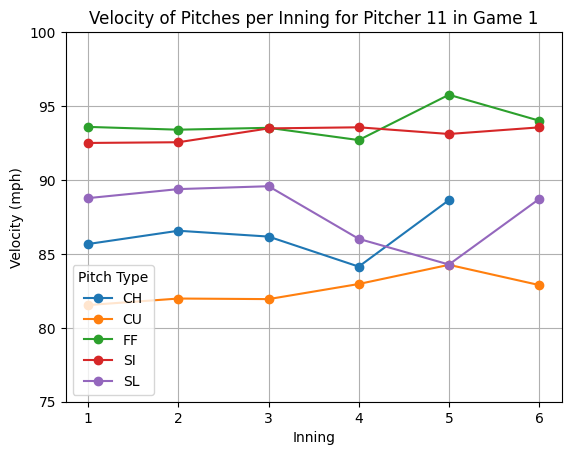

<Figure size 1200x500 with 0 Axes>

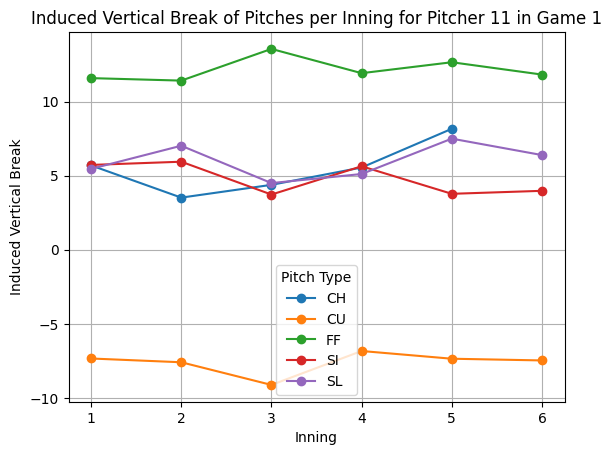

<Figure size 1200x500 with 0 Axes>

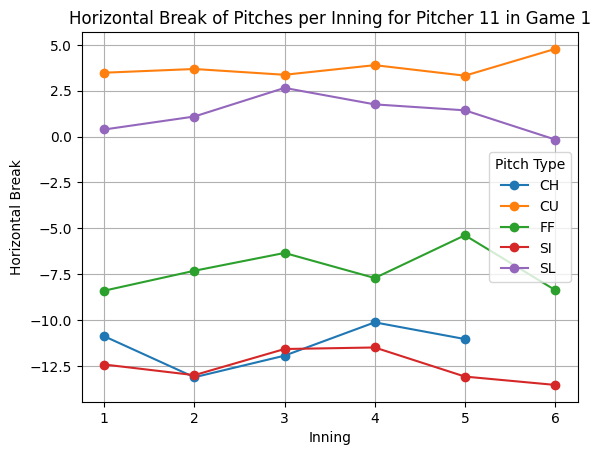

<Figure size 1200x500 with 0 Axes>

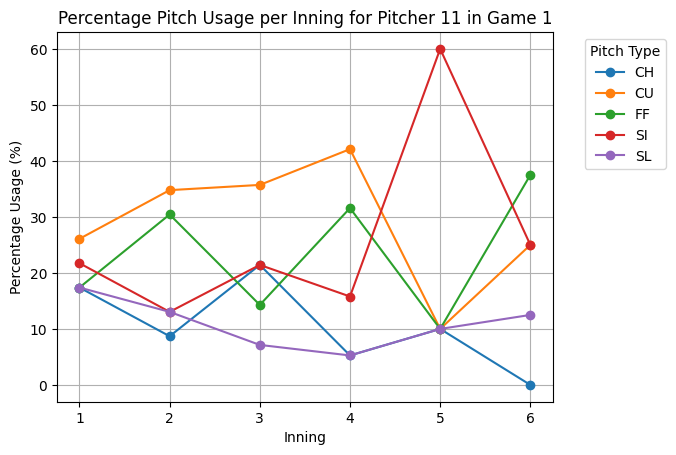

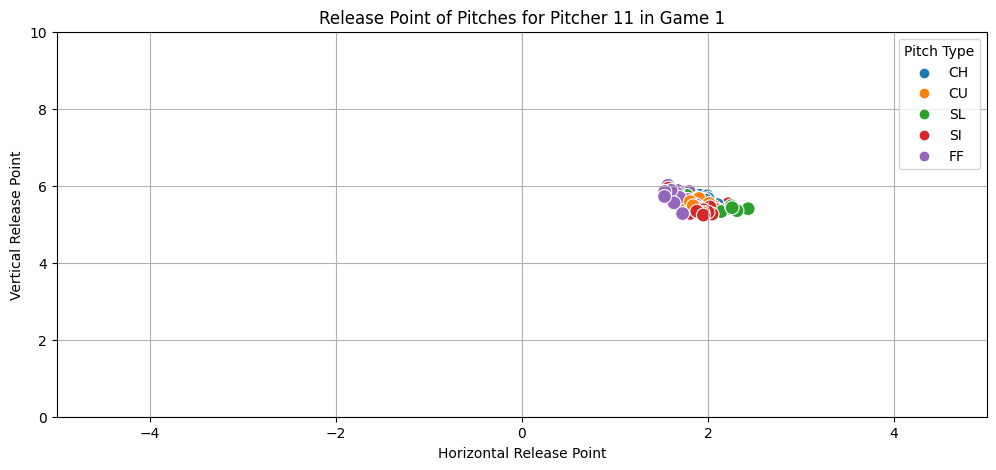

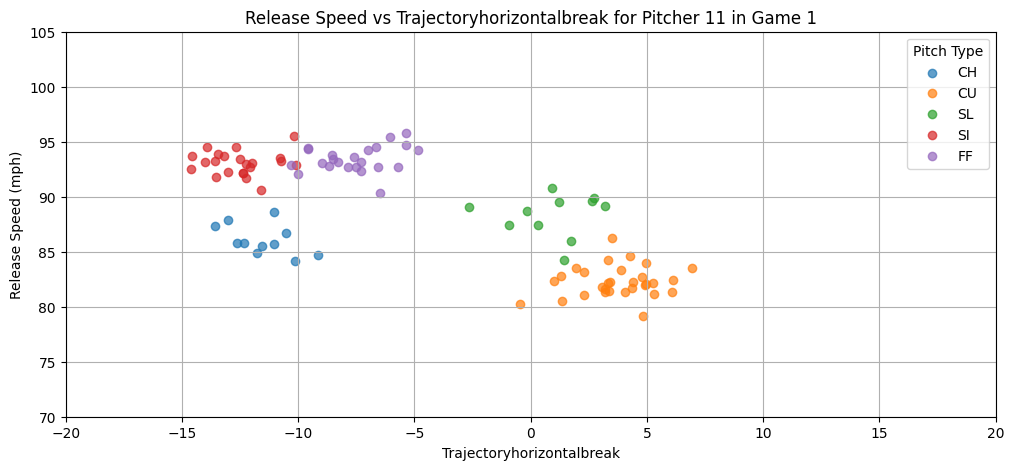

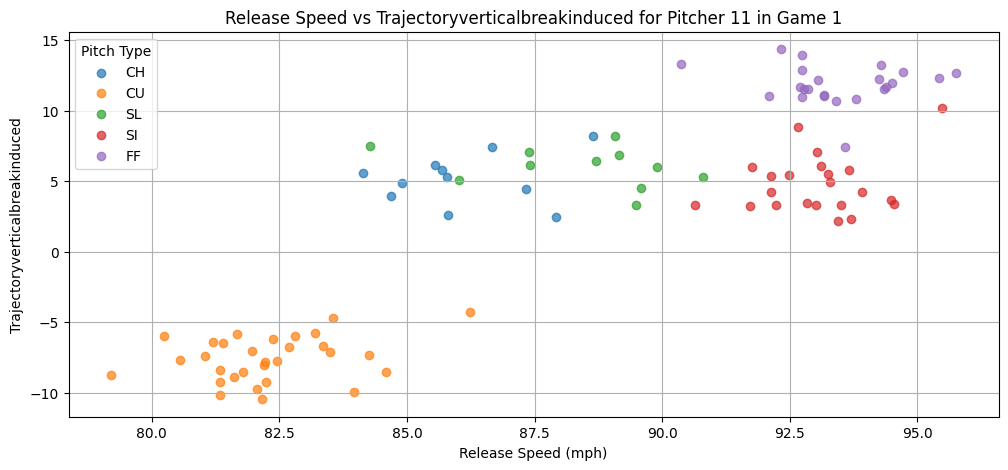

<Figure size 1200x500 with 0 Axes>

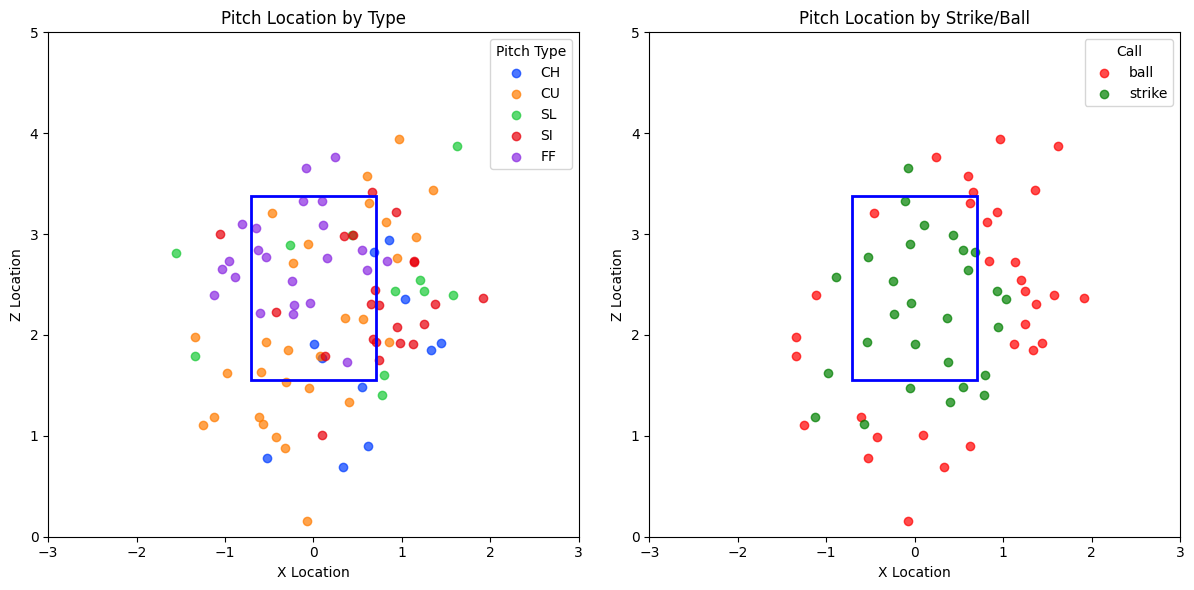

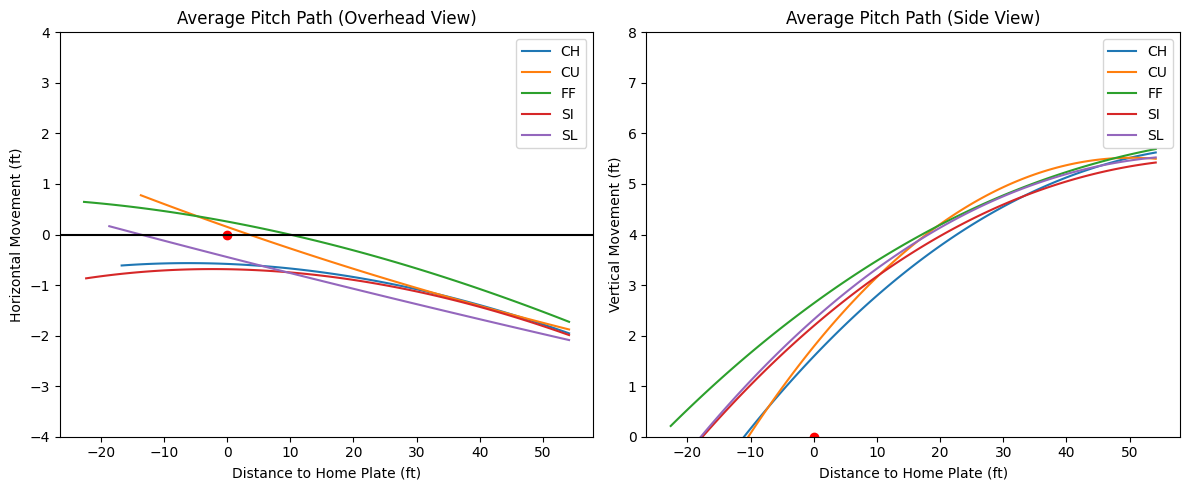

<Figure size 1200x500 with 0 Axes>

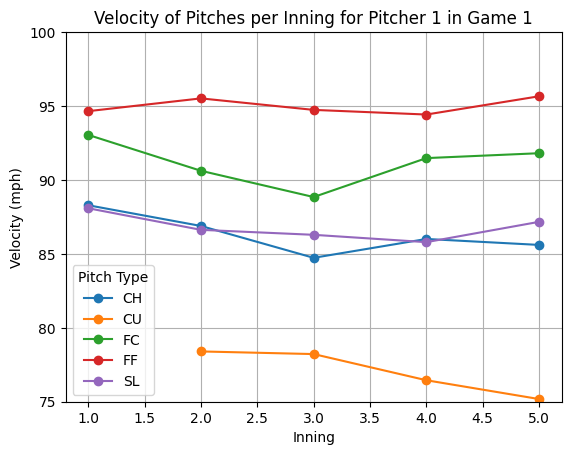

<Figure size 1200x500 with 0 Axes>

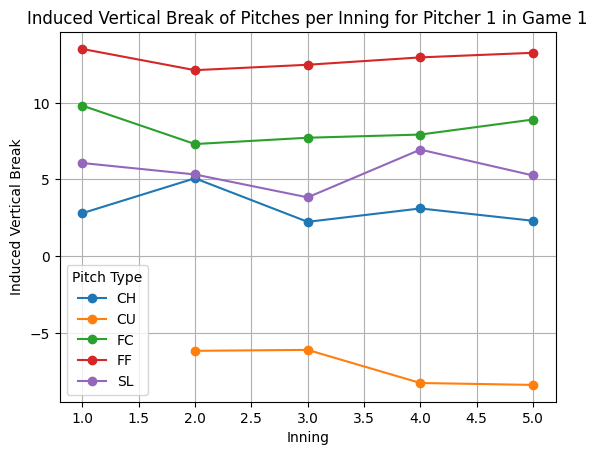

<Figure size 1200x500 with 0 Axes>

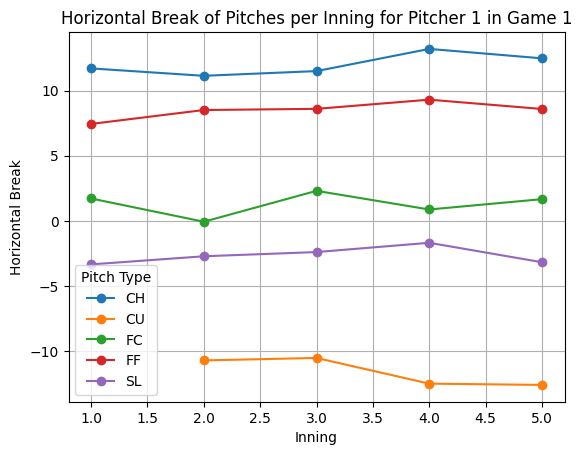

<Figure size 1200x500 with 0 Axes>

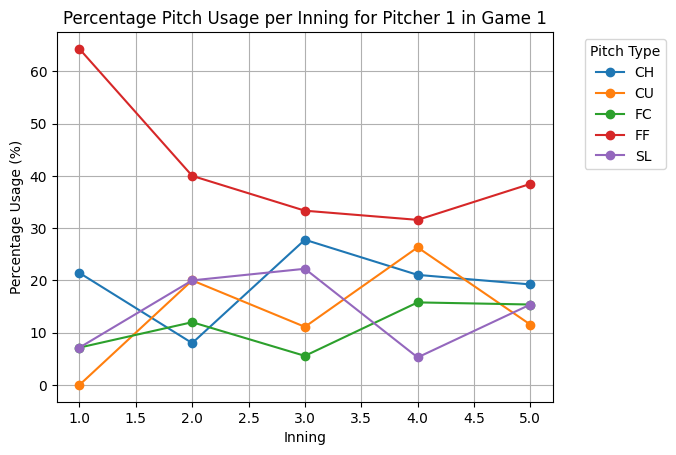

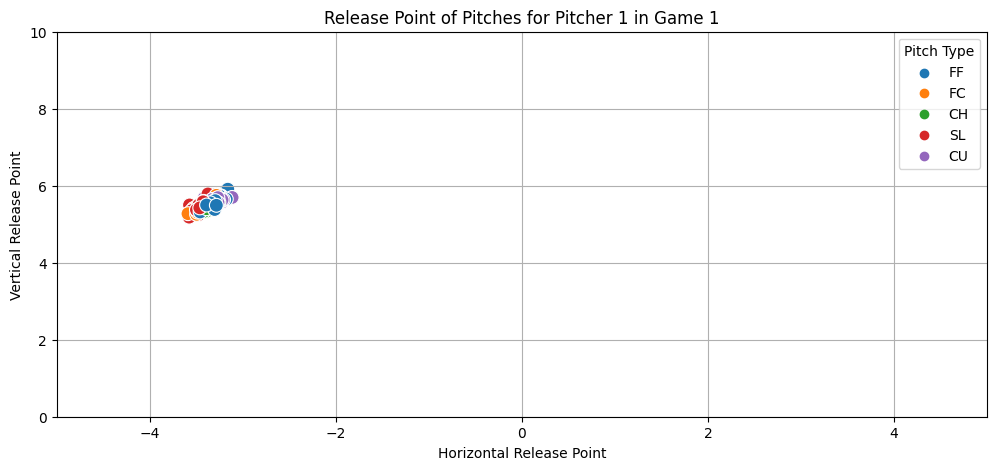

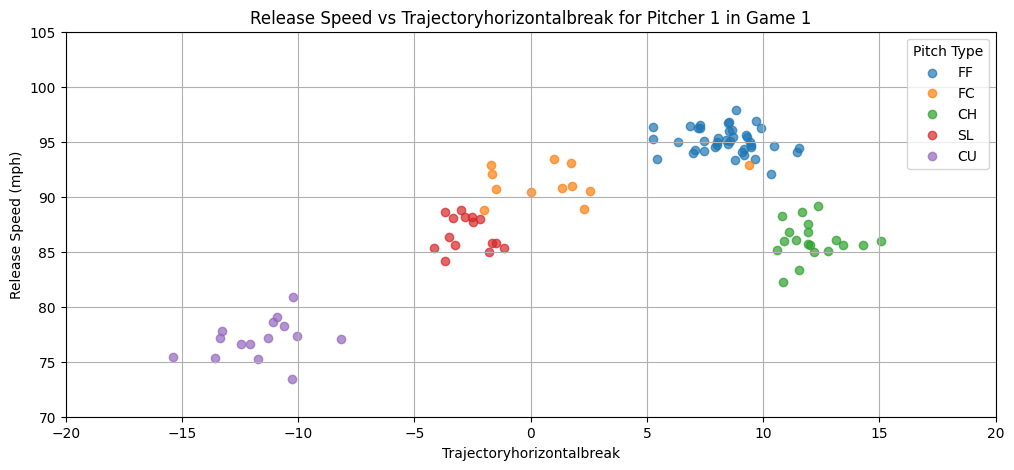

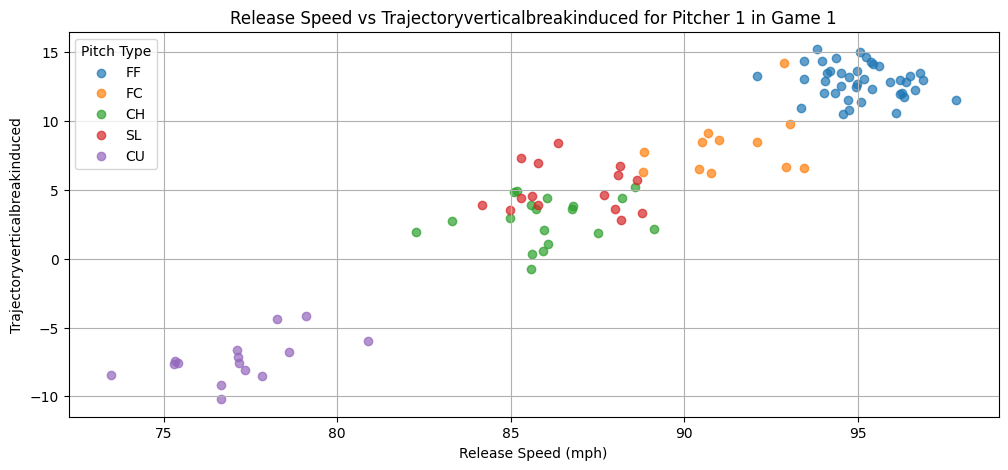

<Figure size 1200x500 with 0 Axes>

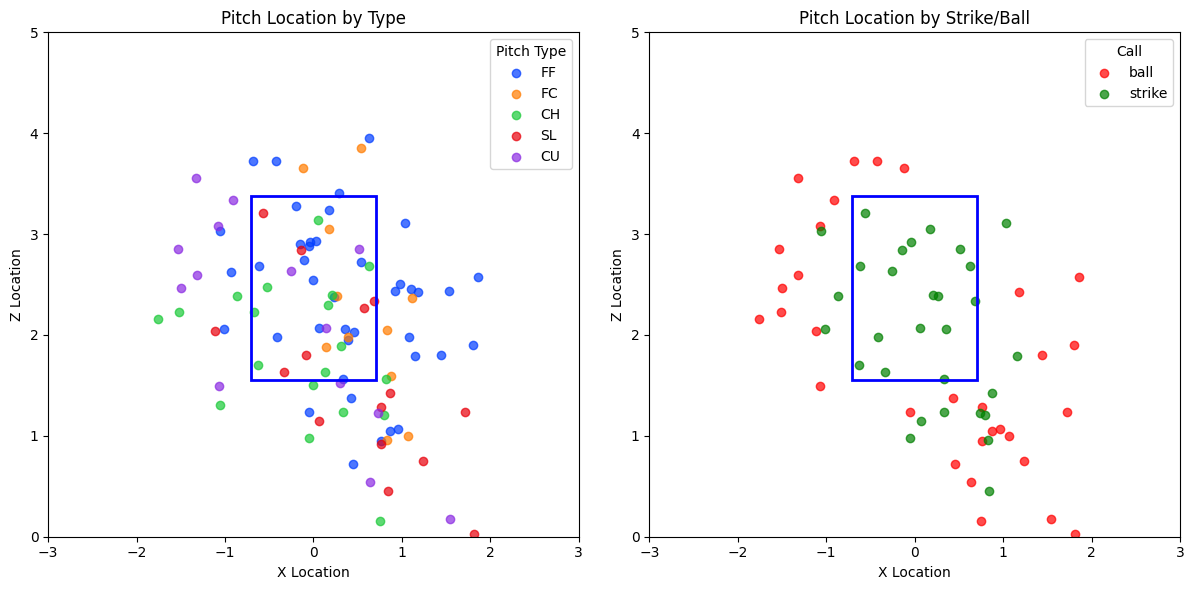

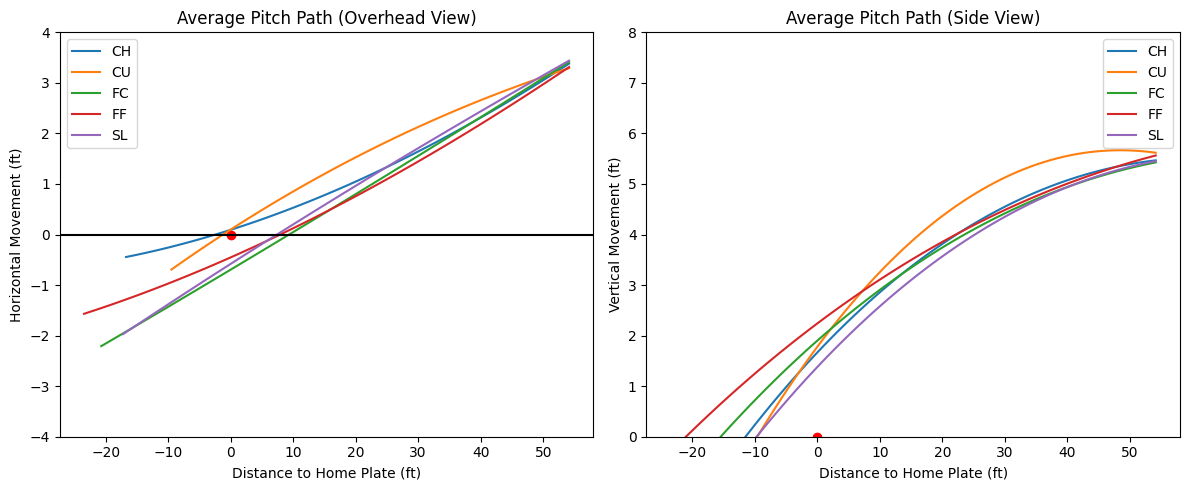

<Figure size 1200x500 with 0 Axes>

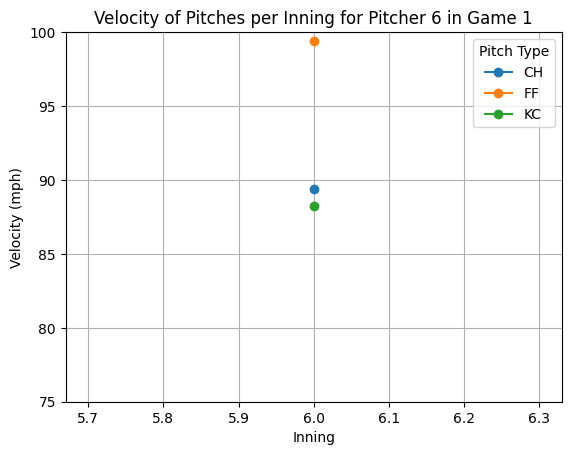

<Figure size 1200x500 with 0 Axes>

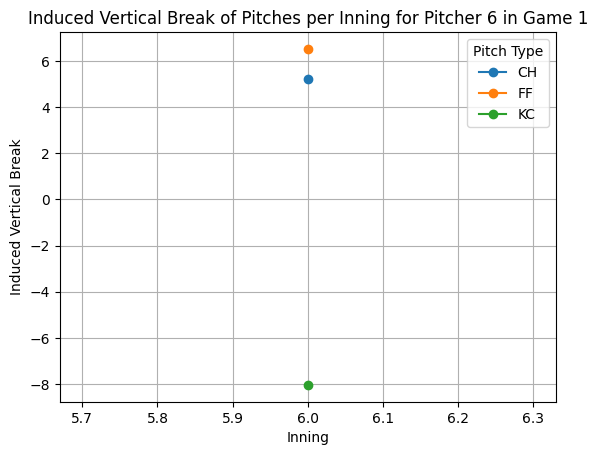

<Figure size 1200x500 with 0 Axes>

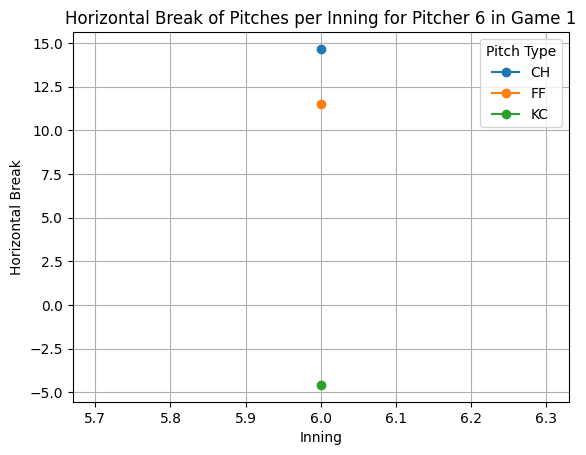

<Figure size 1200x500 with 0 Axes>

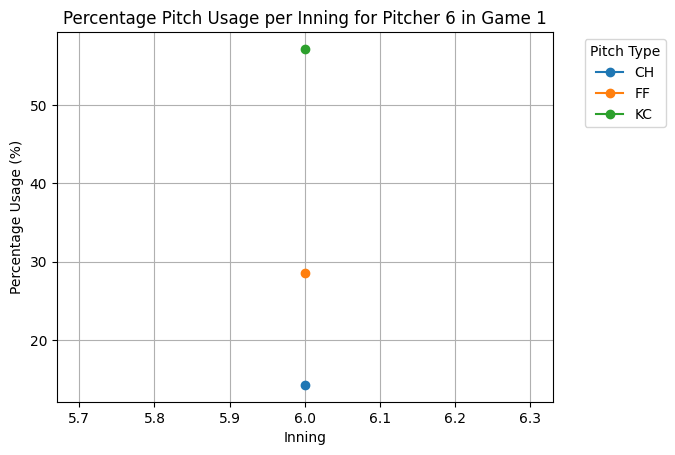

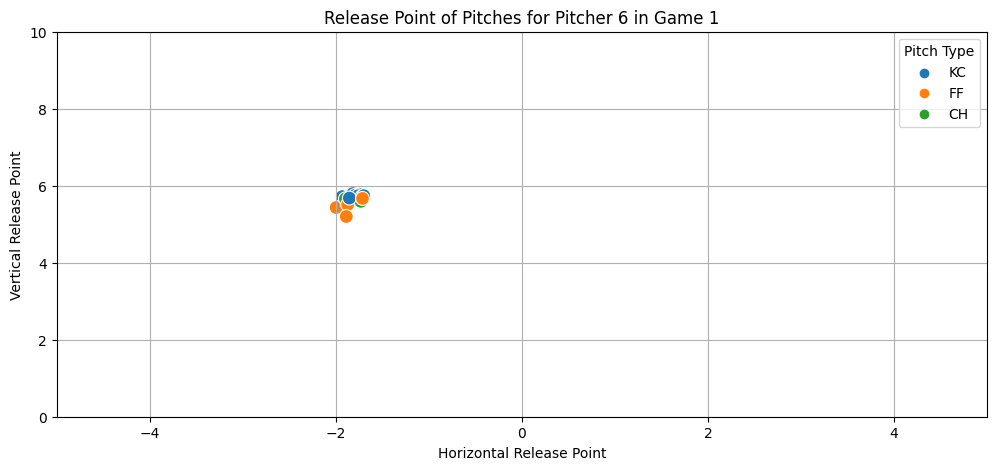

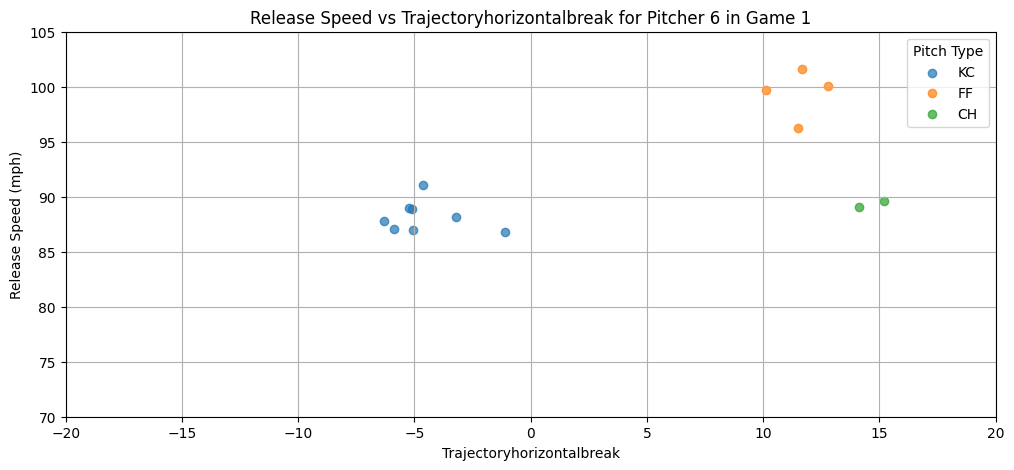

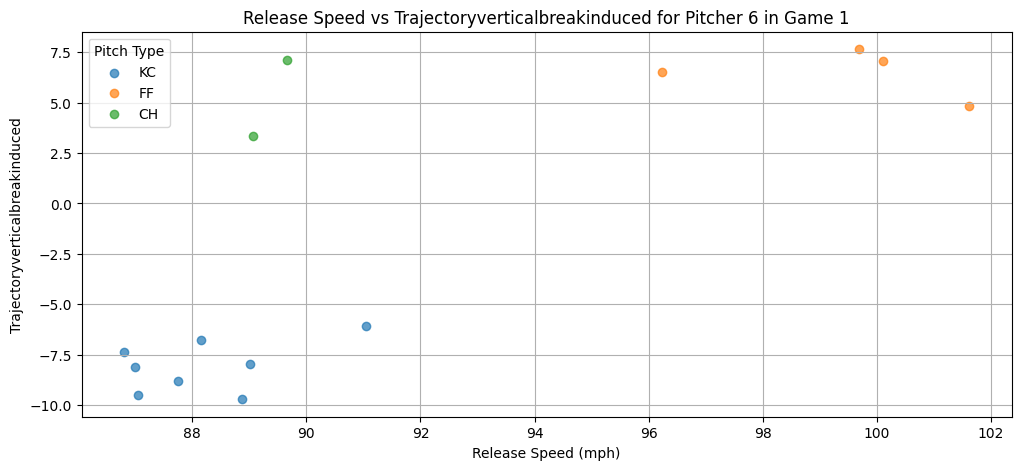

<Figure size 1200x500 with 0 Axes>

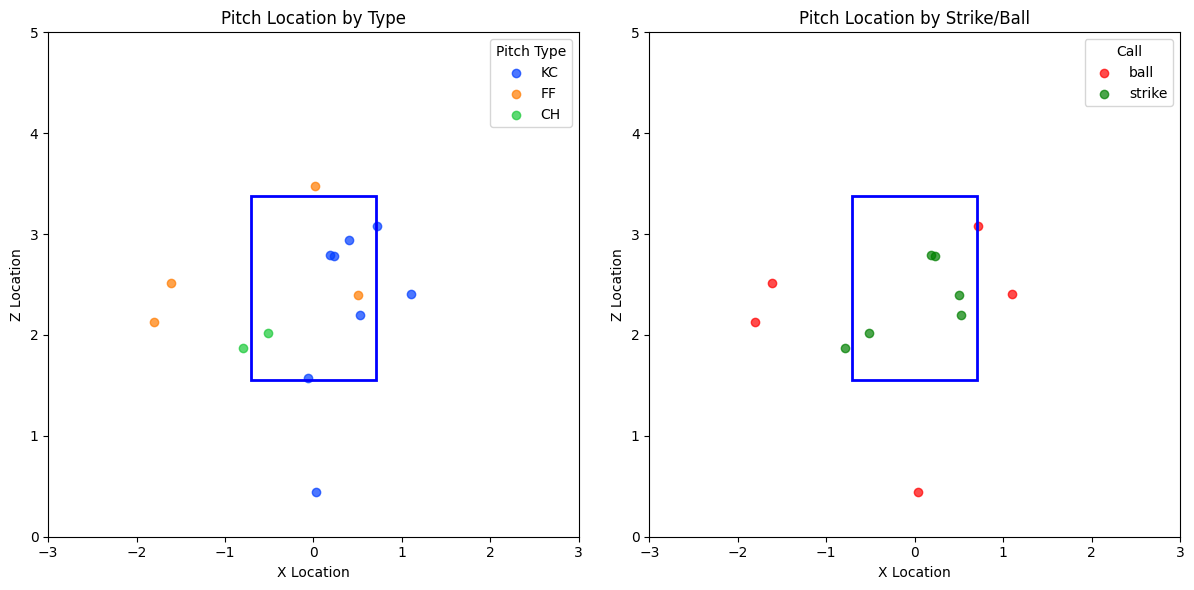

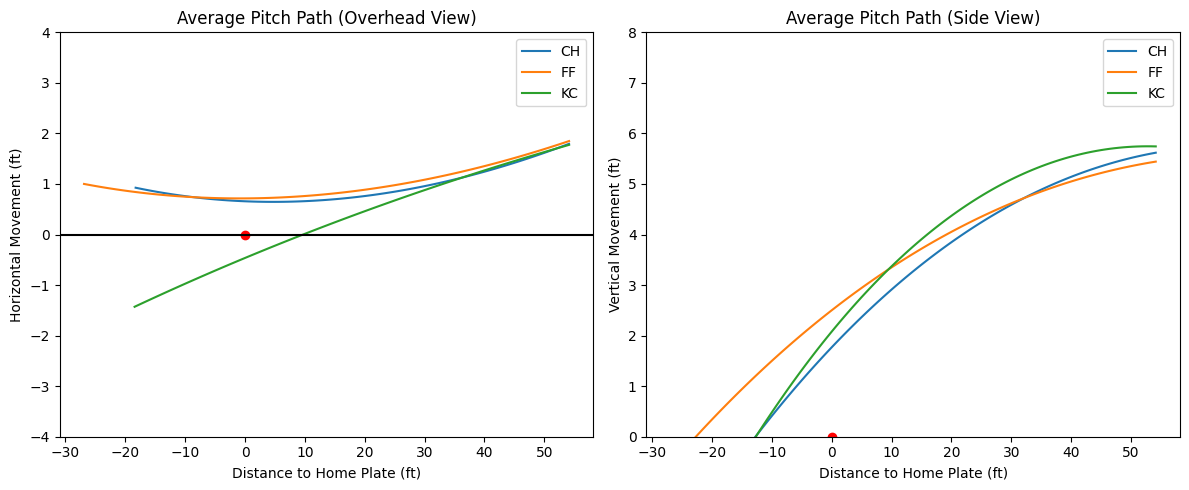

<Figure size 1200x500 with 0 Axes>

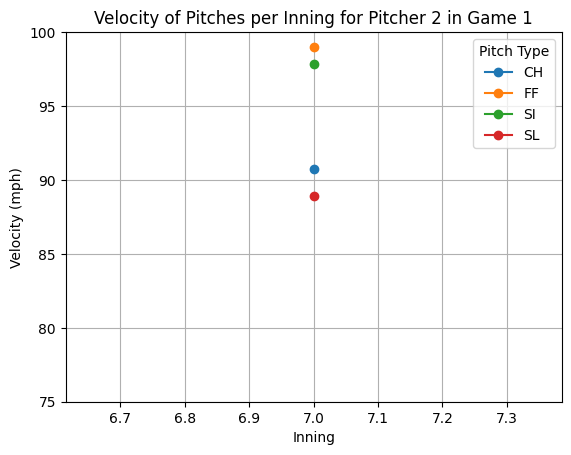

<Figure size 1200x500 with 0 Axes>

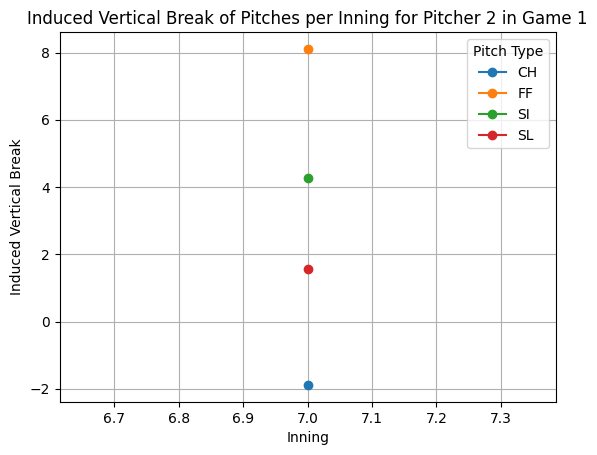

<Figure size 1200x500 with 0 Axes>

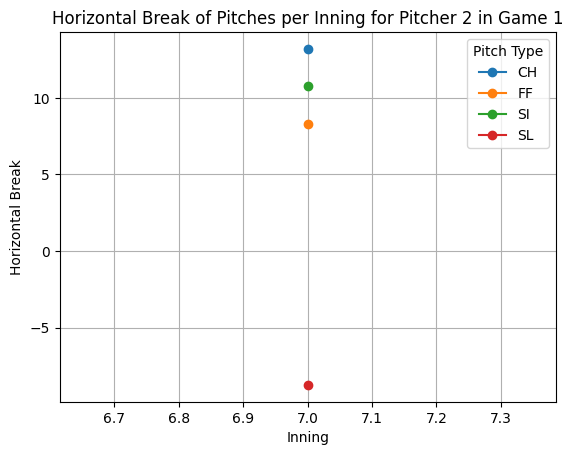

<Figure size 1200x500 with 0 Axes>

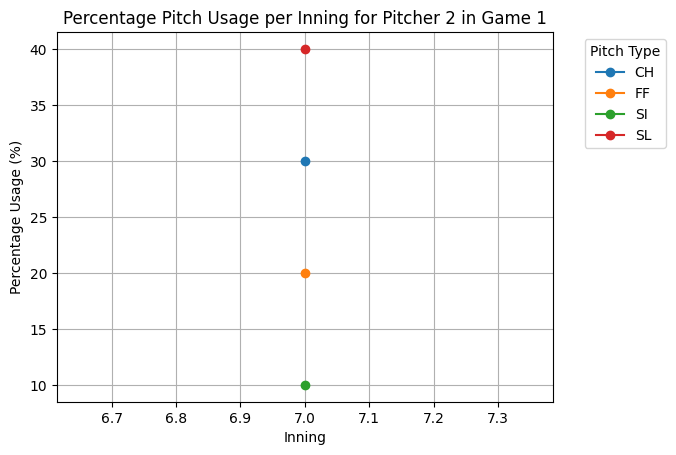

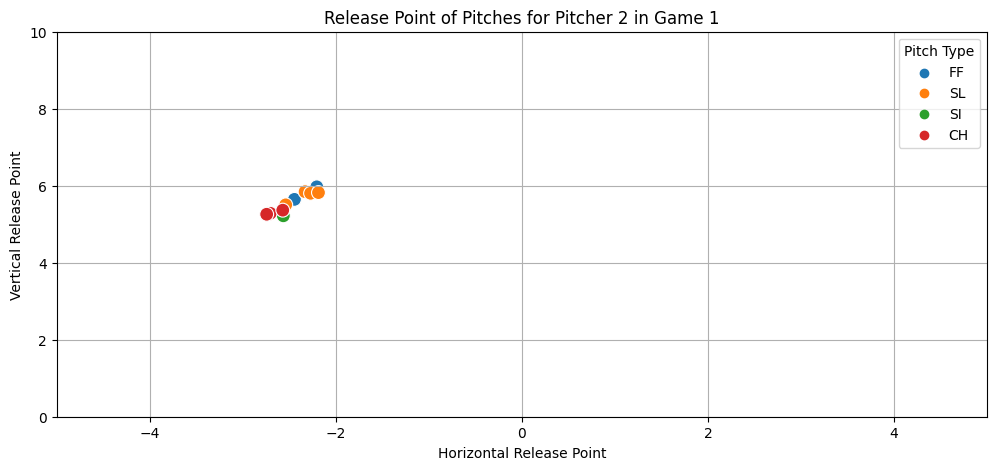

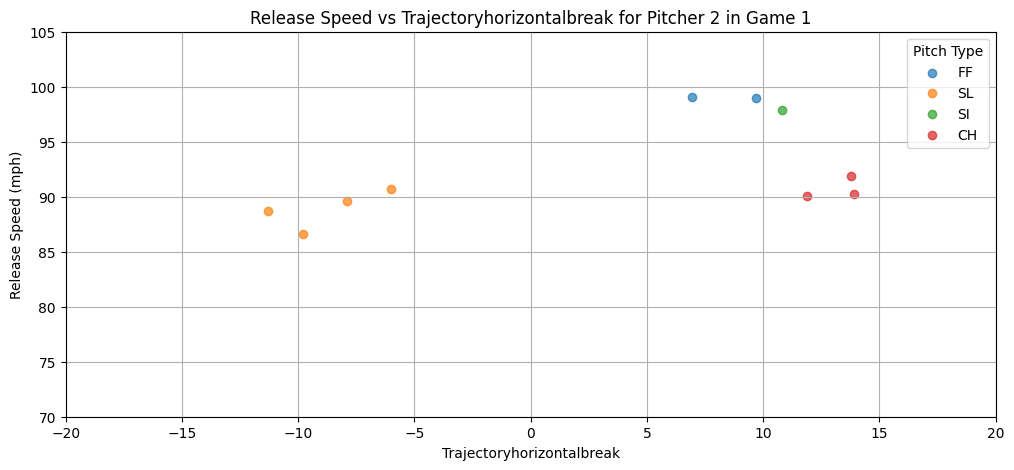

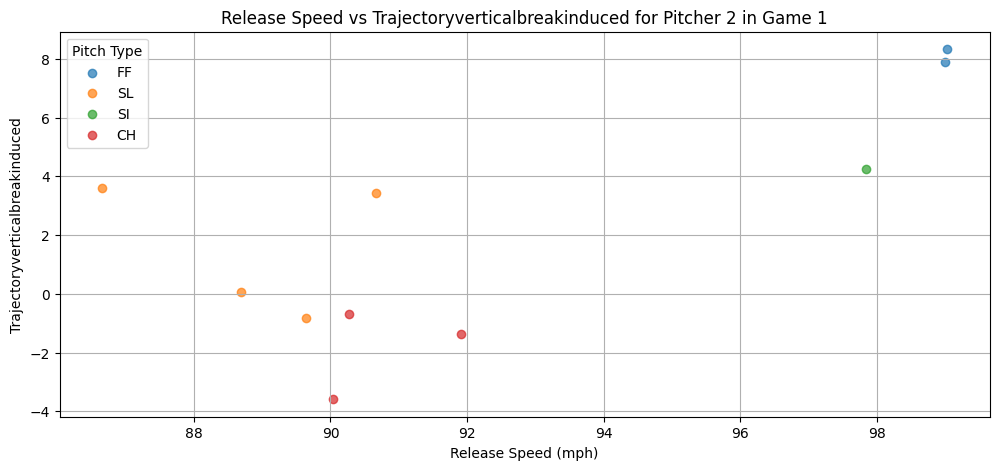

<Figure size 1200x500 with 0 Axes>

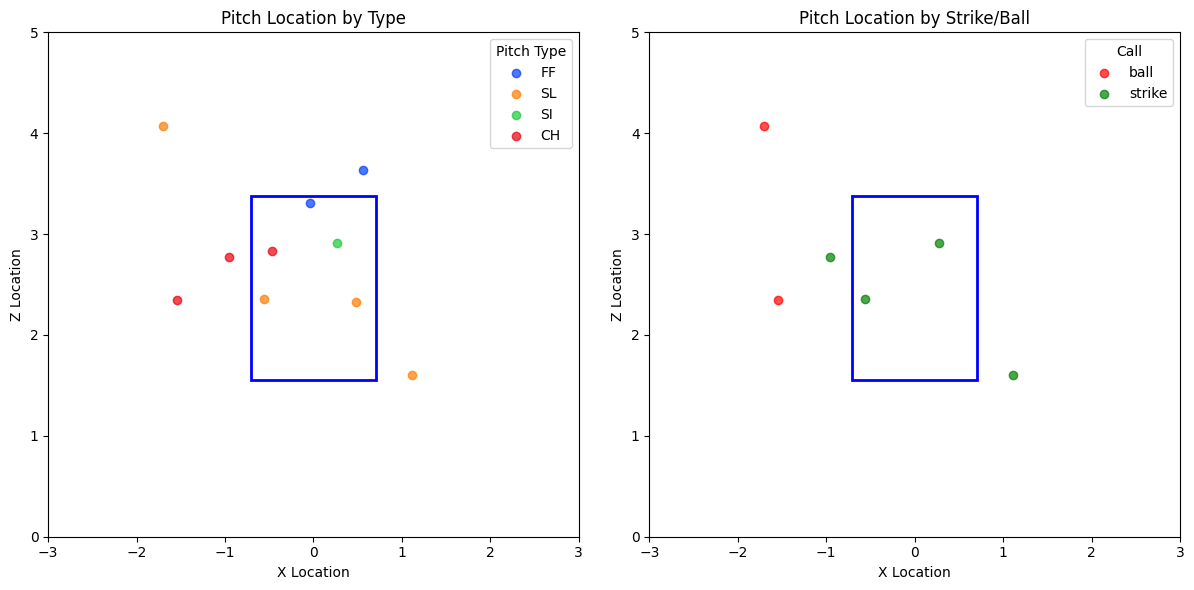

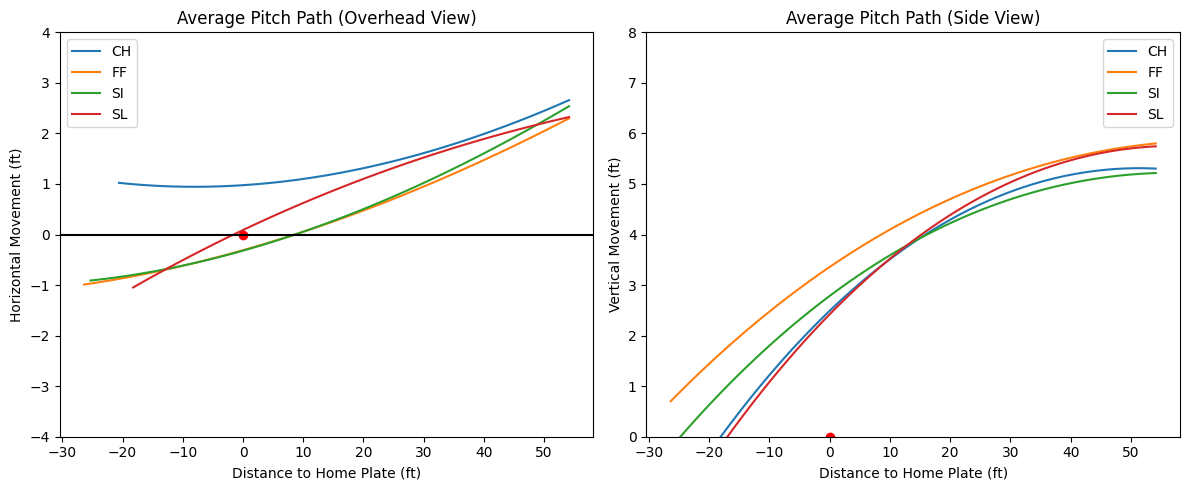

<Figure size 1200x500 with 0 Axes>

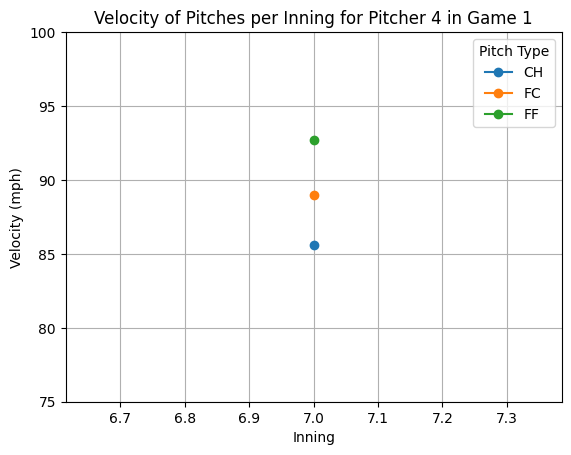

<Figure size 1200x500 with 0 Axes>

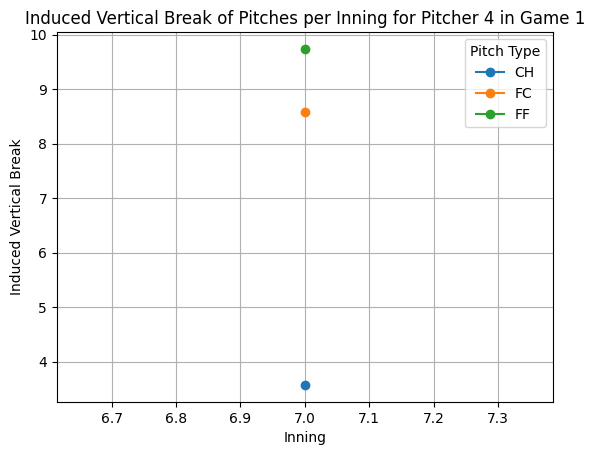

<Figure size 1200x500 with 0 Axes>

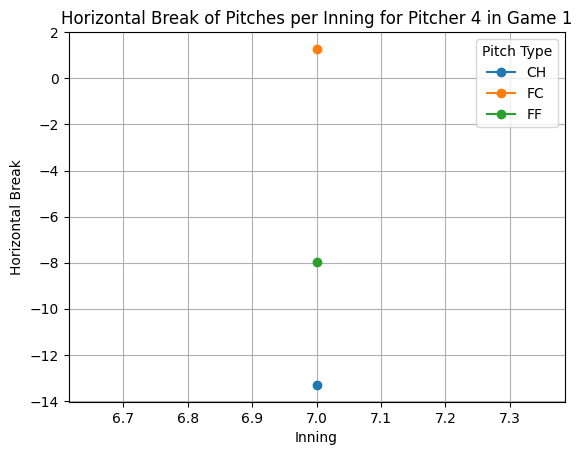

<Figure size 1200x500 with 0 Axes>

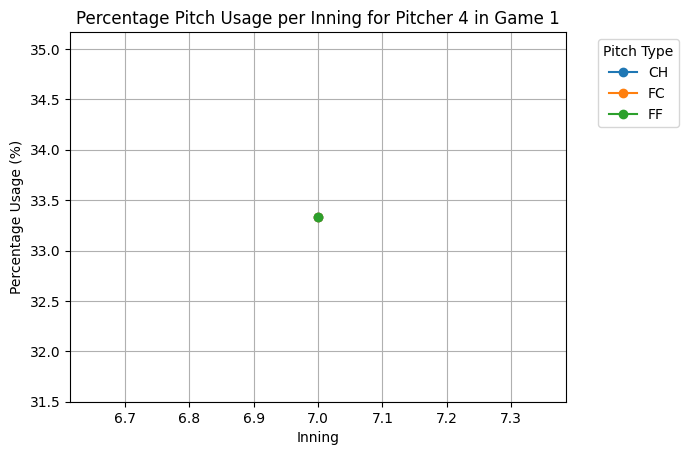

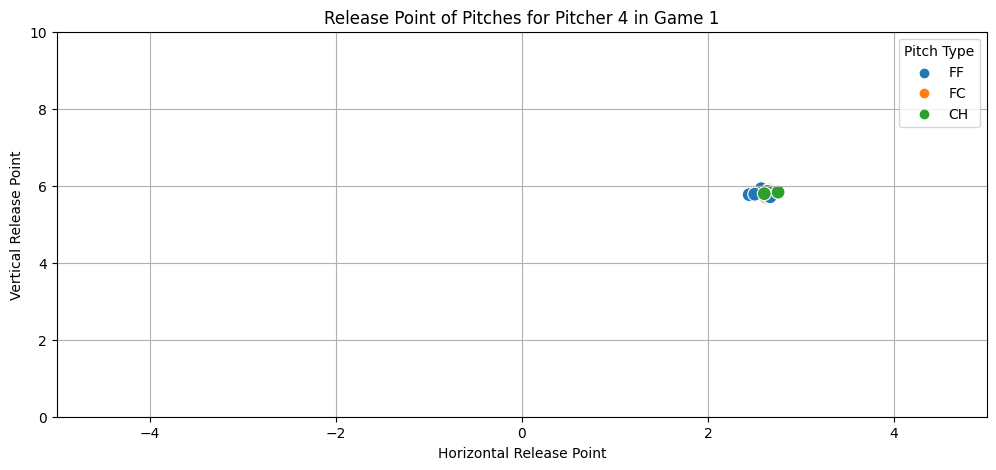

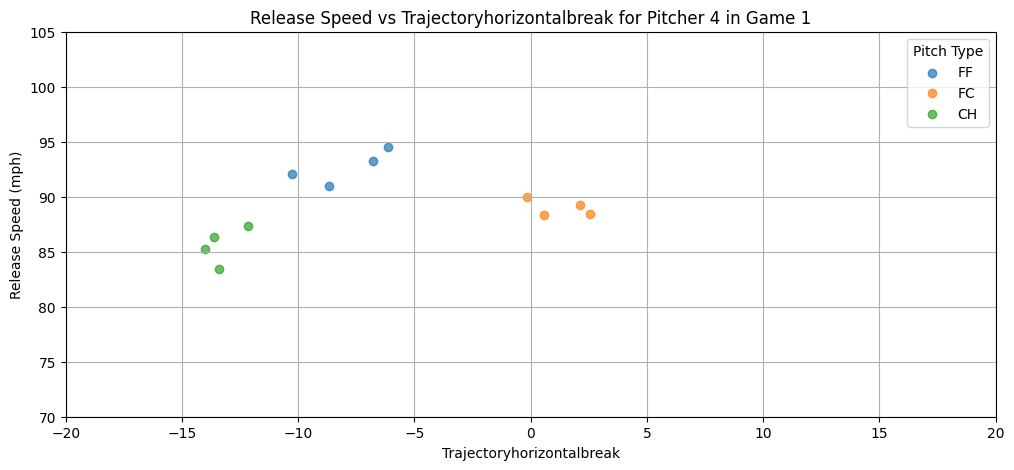

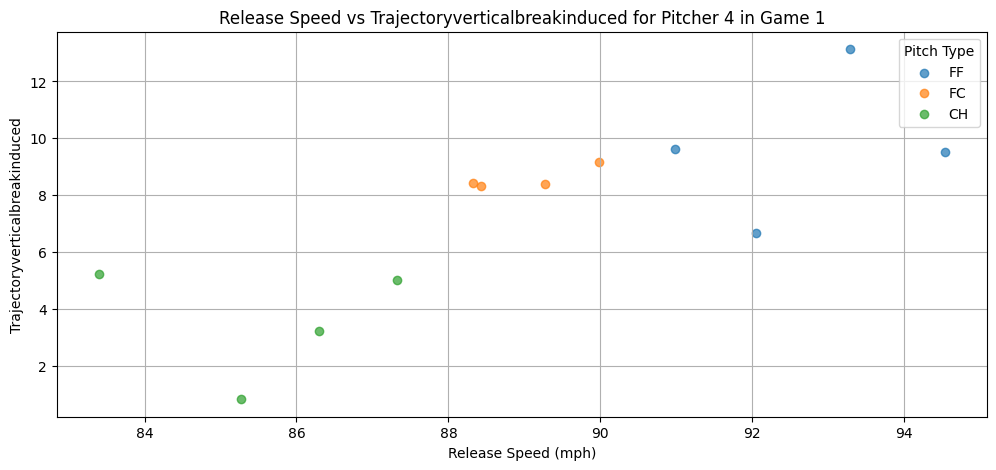

<Figure size 1200x500 with 0 Axes>

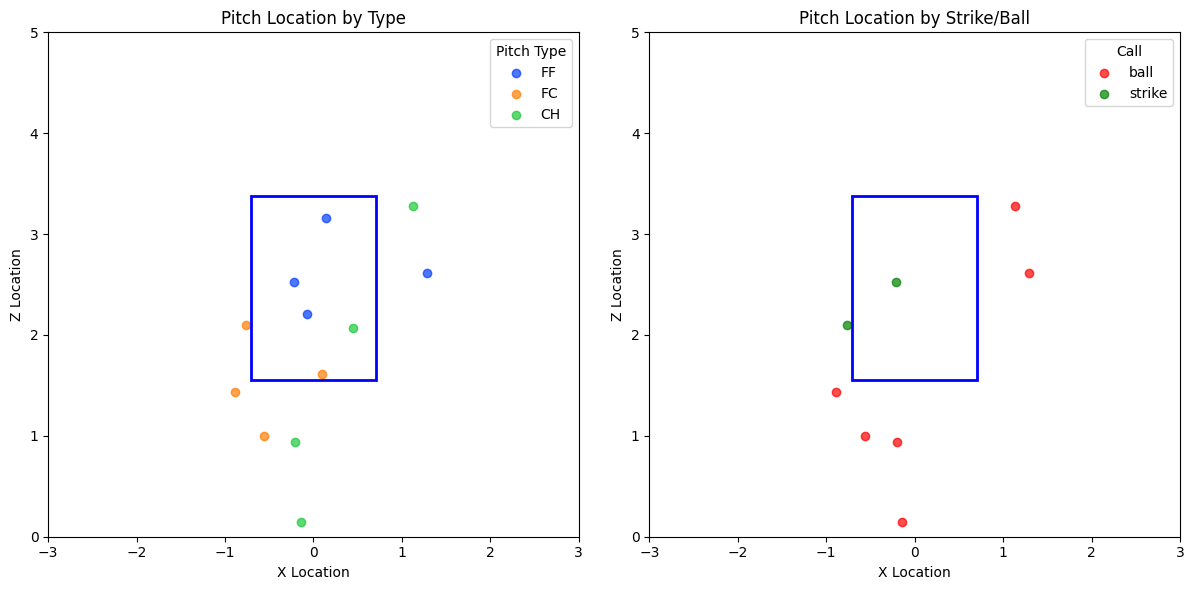

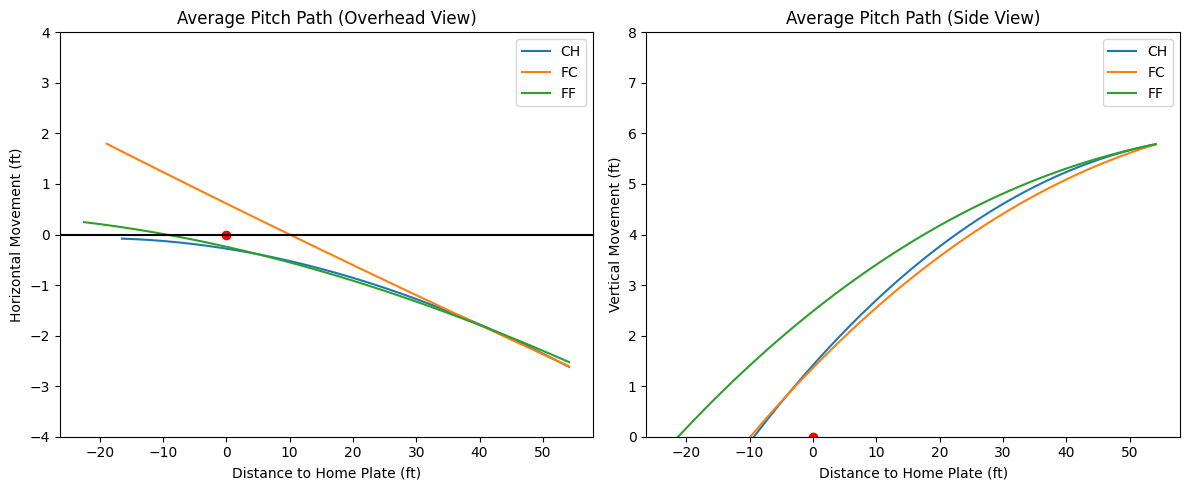

<Figure size 1200x500 with 0 Axes>

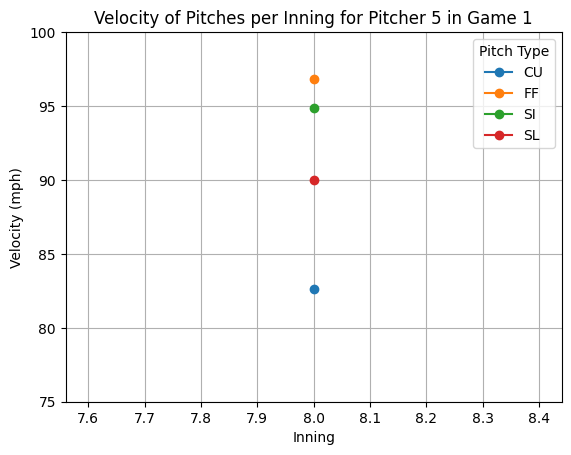

<Figure size 1200x500 with 0 Axes>

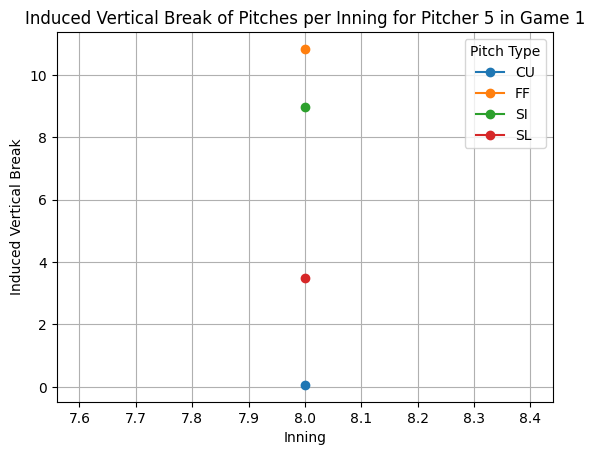

<Figure size 1200x500 with 0 Axes>

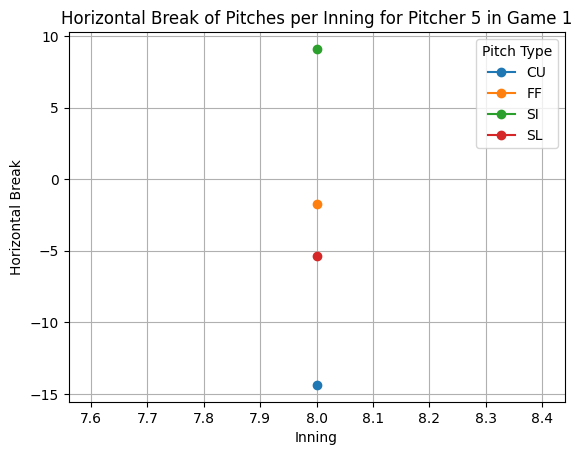

<Figure size 1200x500 with 0 Axes>

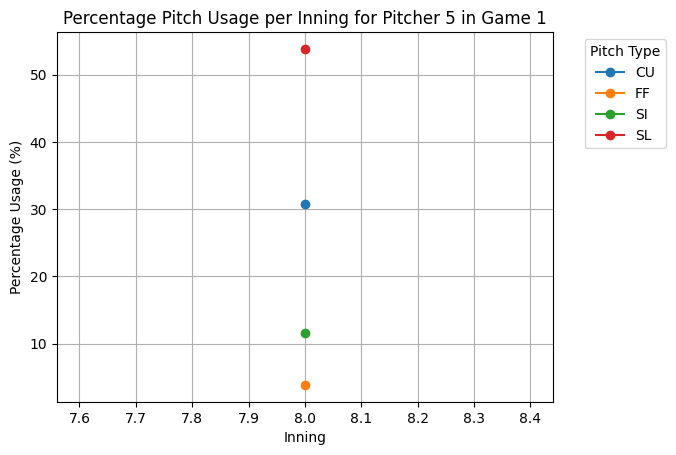

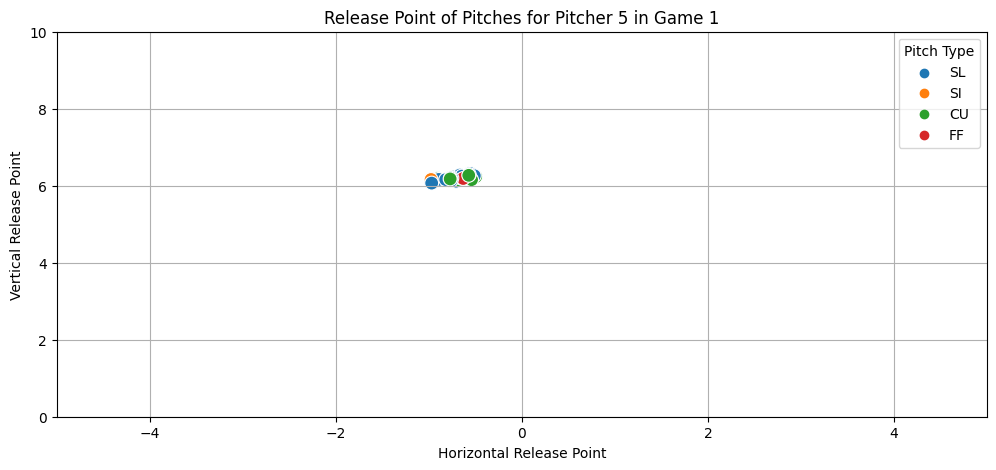

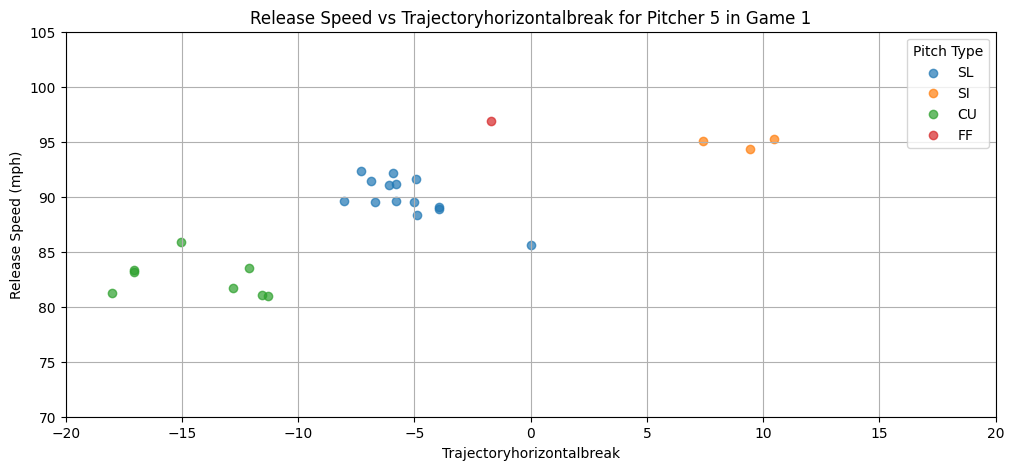

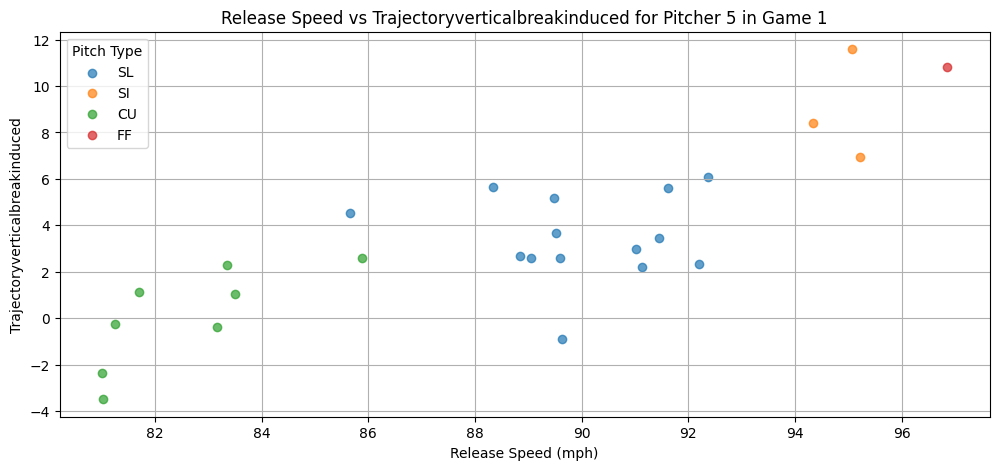

<Figure size 1200x500 with 0 Axes>

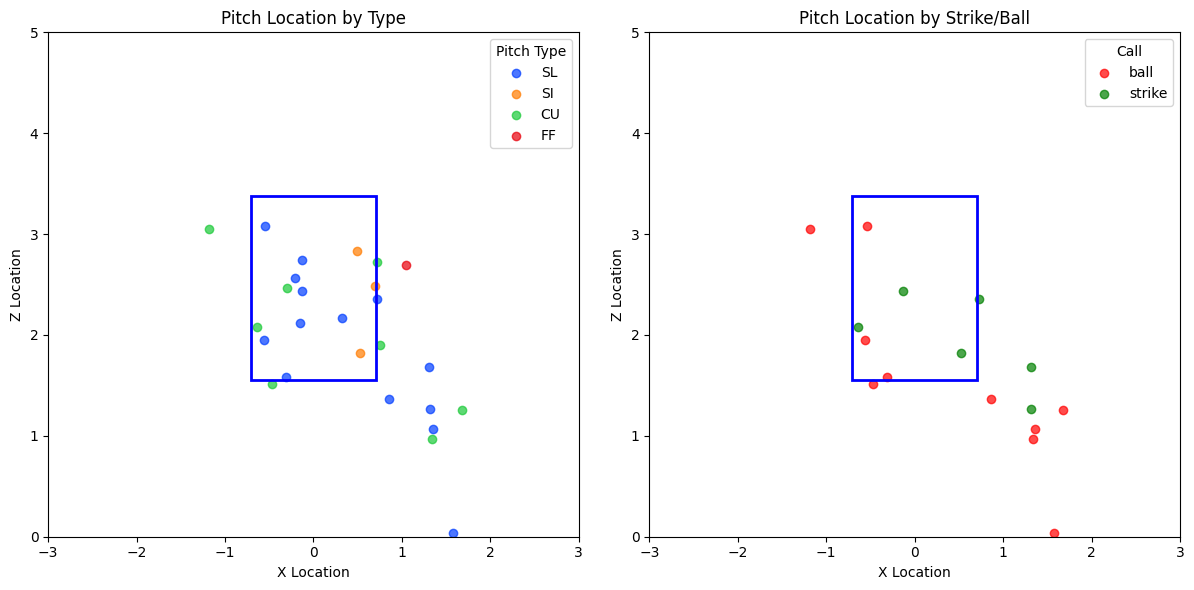

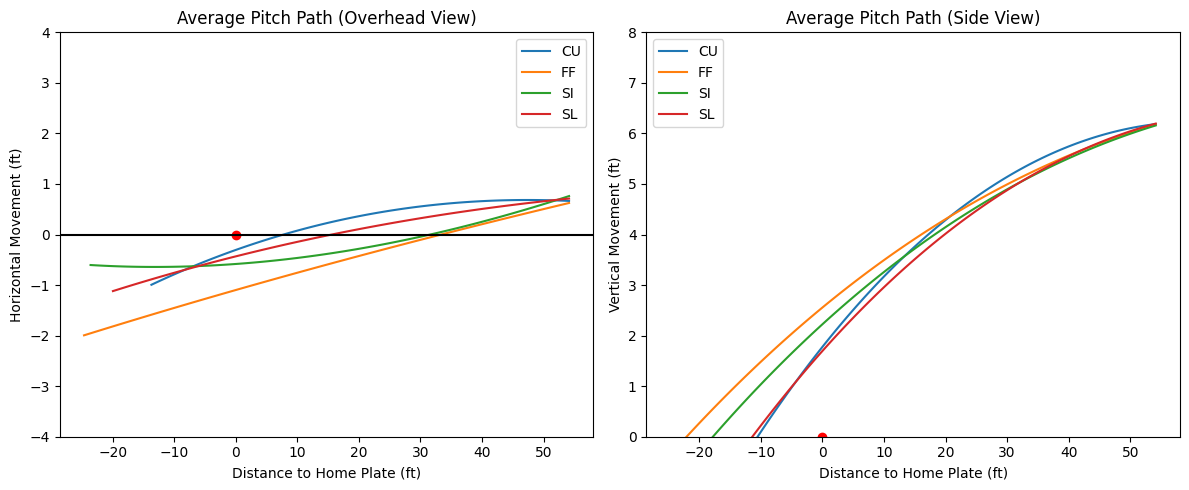

<Figure size 1200x500 with 0 Axes>

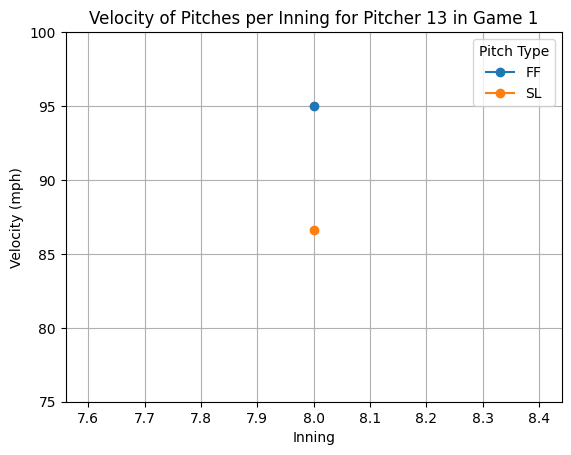

<Figure size 1200x500 with 0 Axes>

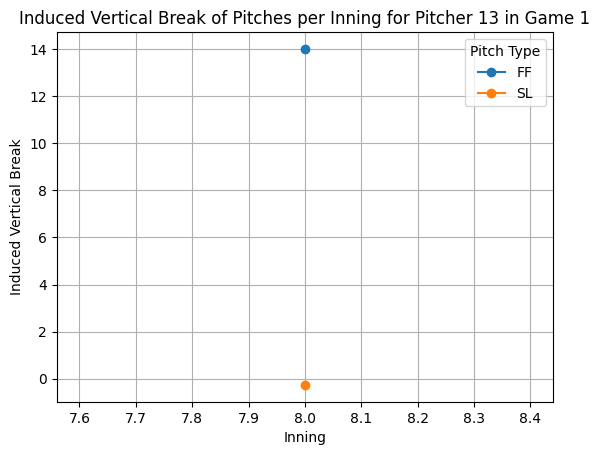

<Figure size 1200x500 with 0 Axes>

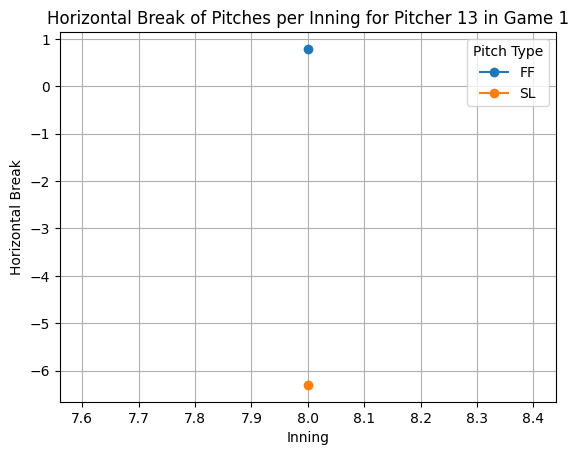

<Figure size 1200x500 with 0 Axes>

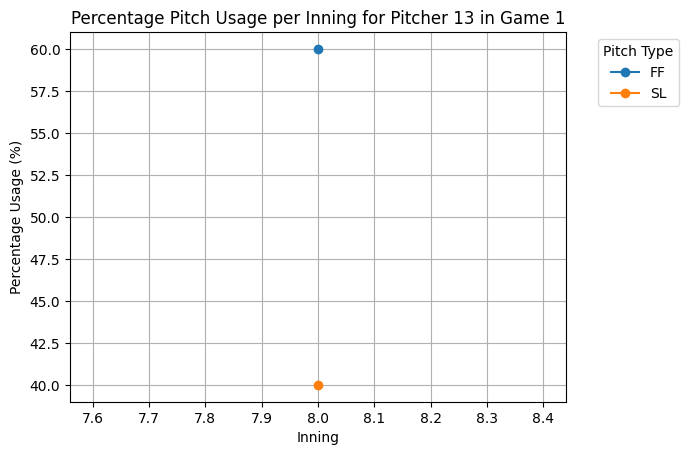

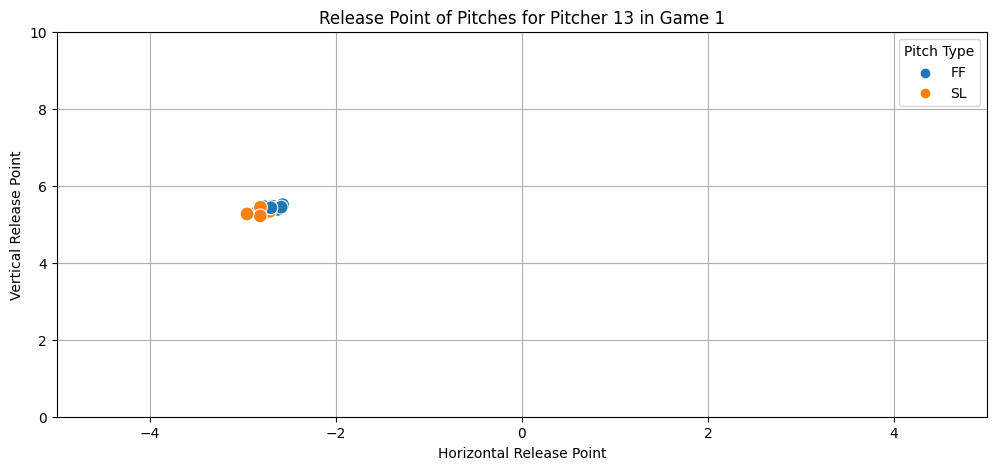

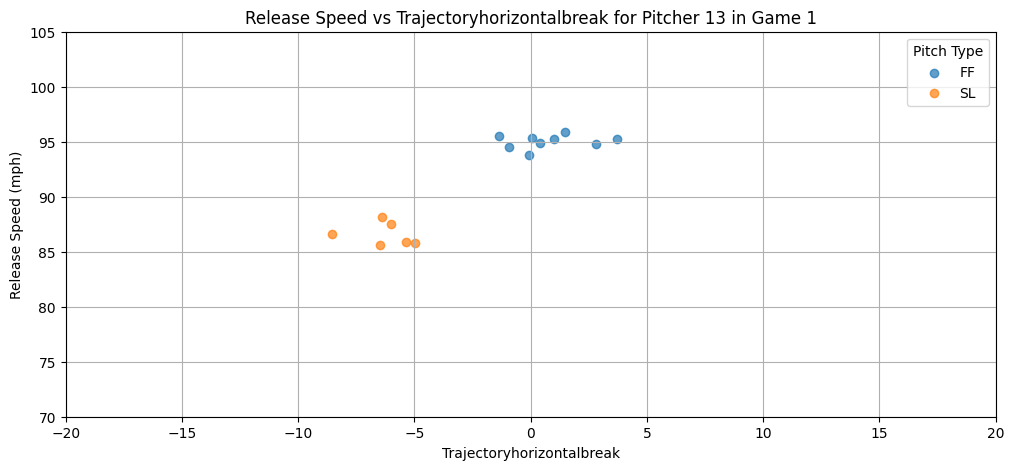

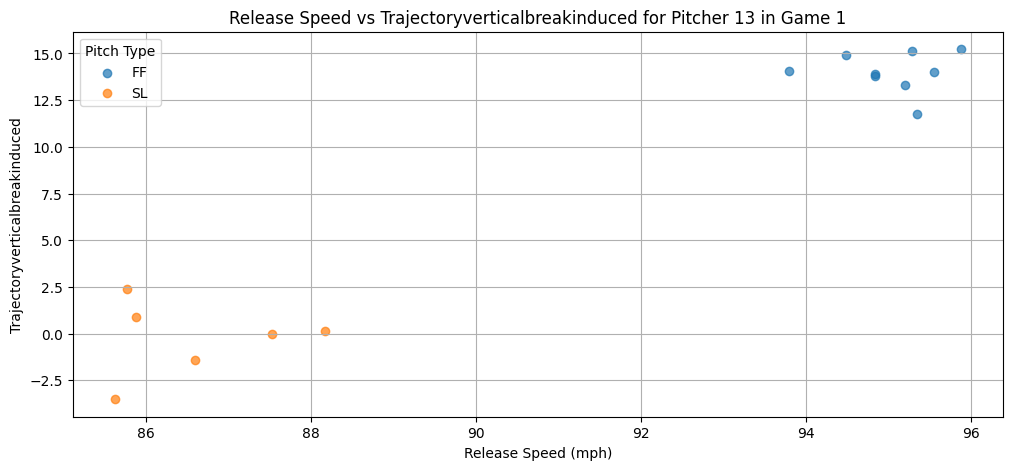

<Figure size 1200x500 with 0 Axes>

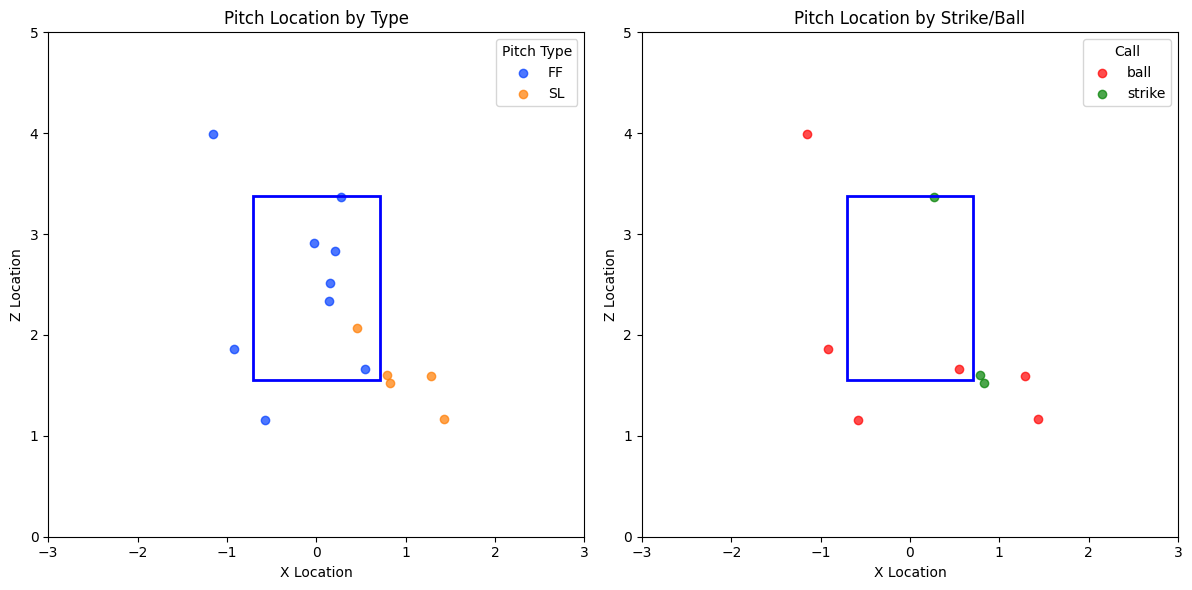

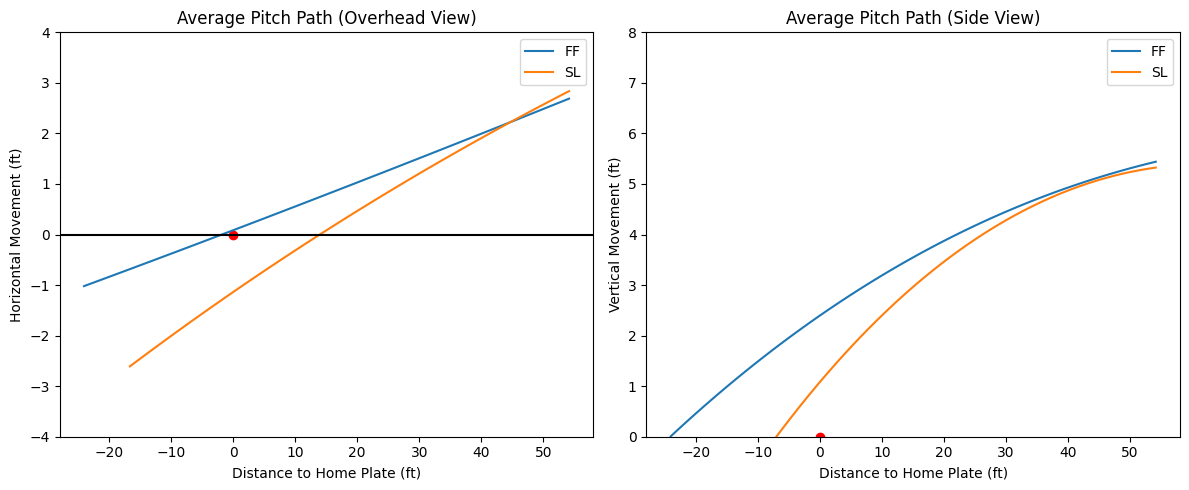

<Figure size 1200x500 with 0 Axes>

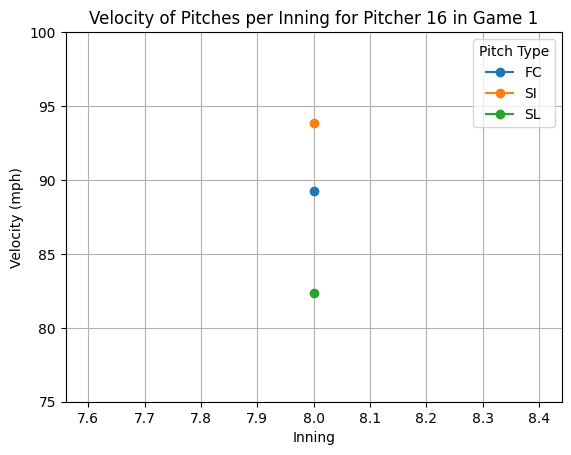

<Figure size 1200x500 with 0 Axes>

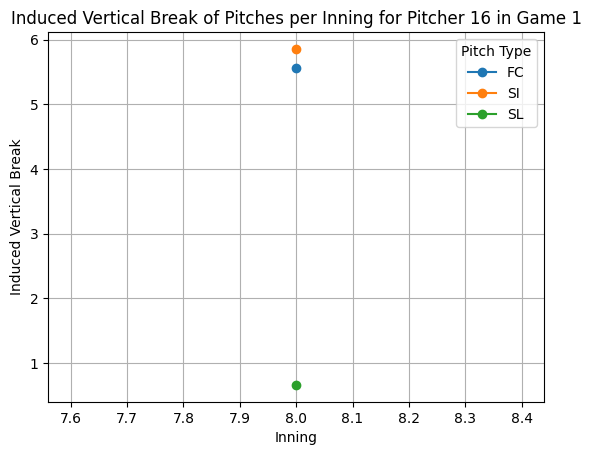

<Figure size 1200x500 with 0 Axes>

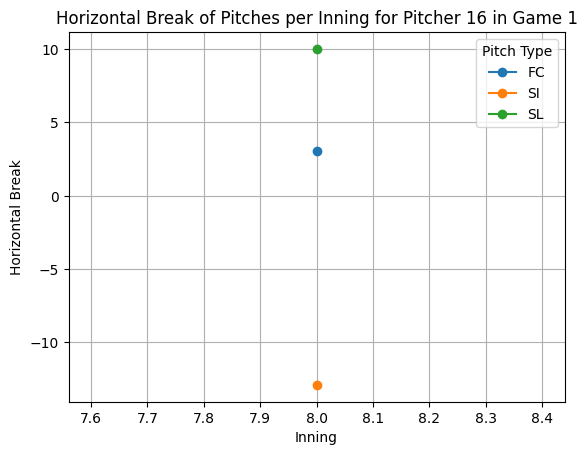

<Figure size 1200x500 with 0 Axes>

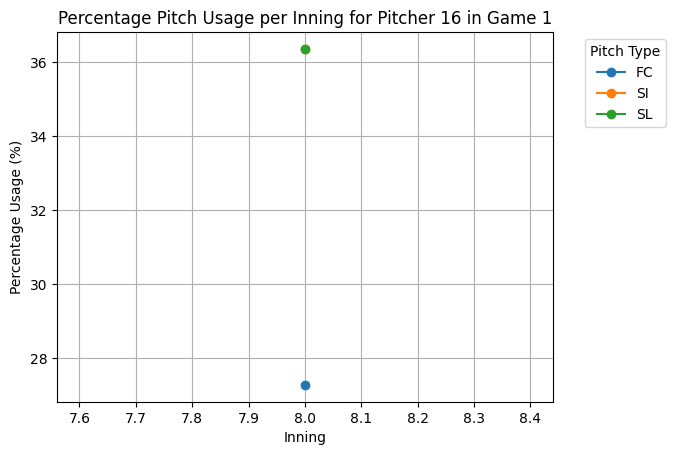

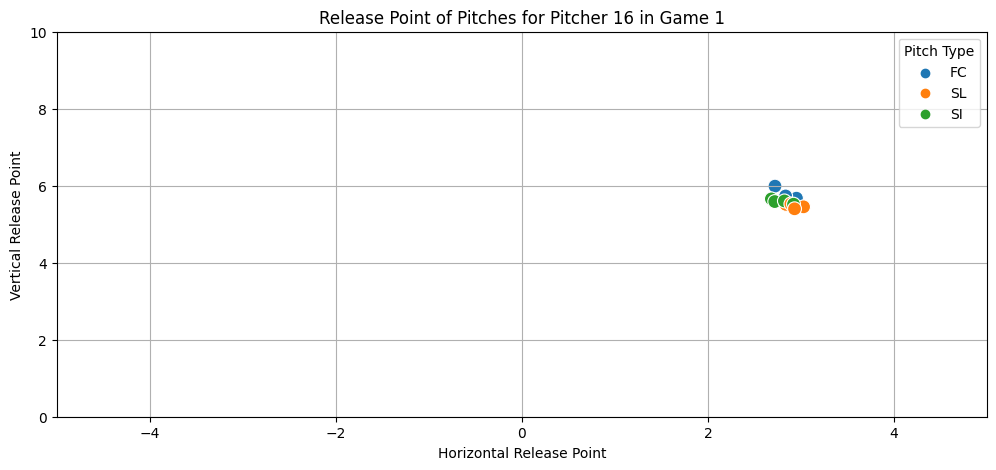

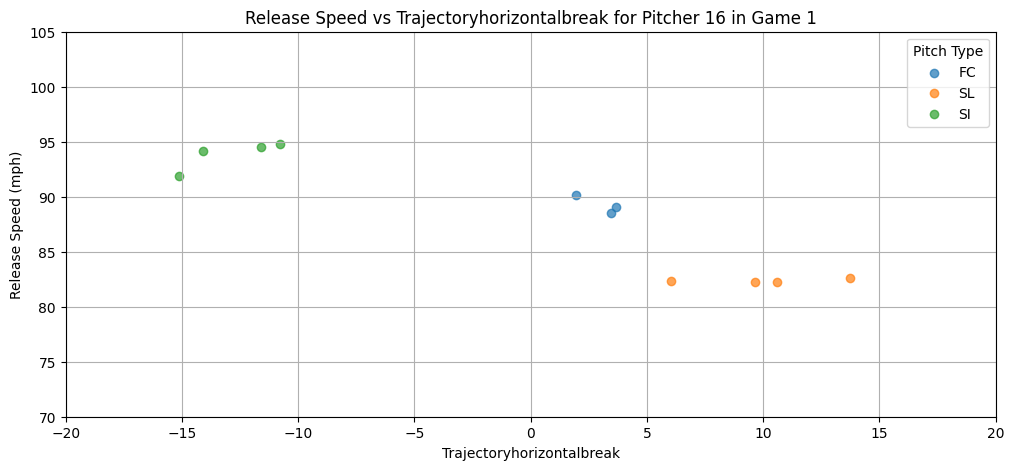

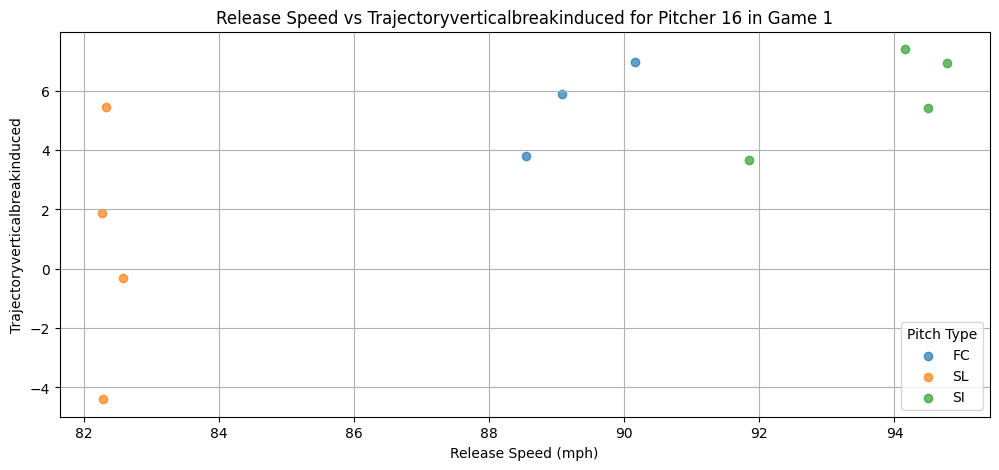

<Figure size 1200x500 with 0 Axes>

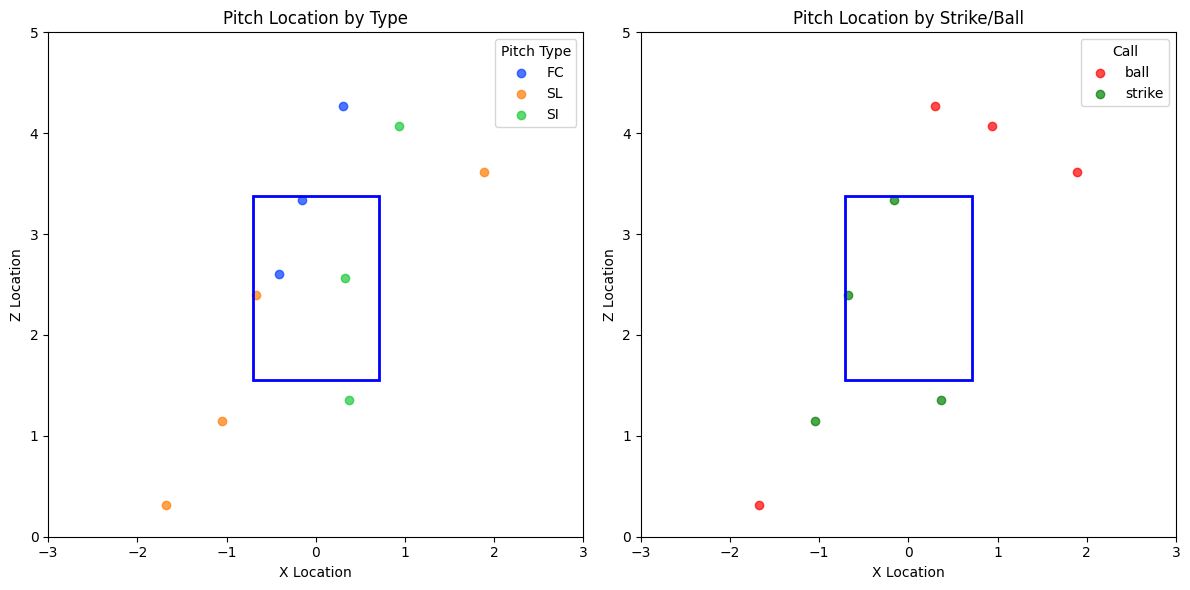

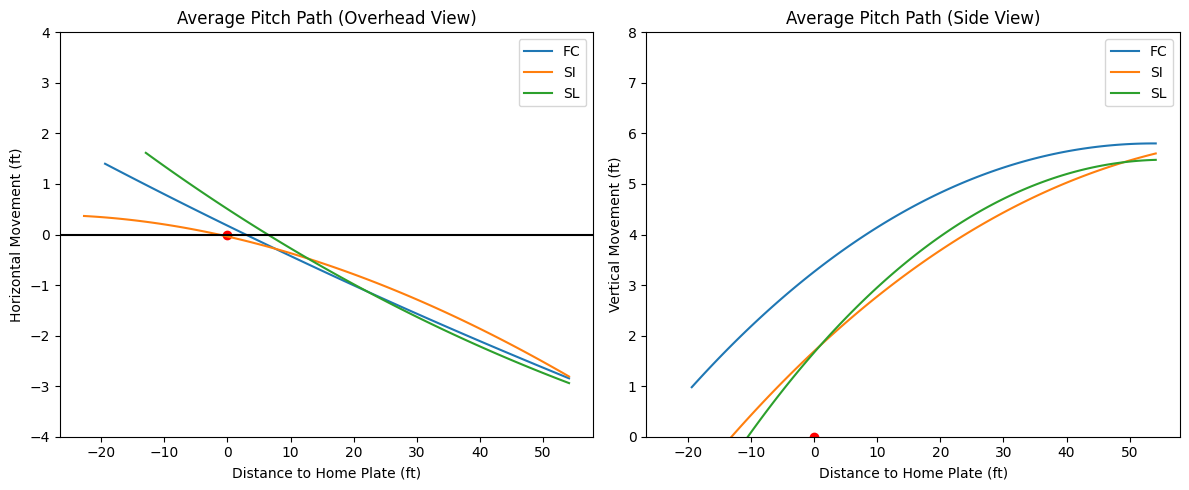

<Figure size 1200x500 with 0 Axes>

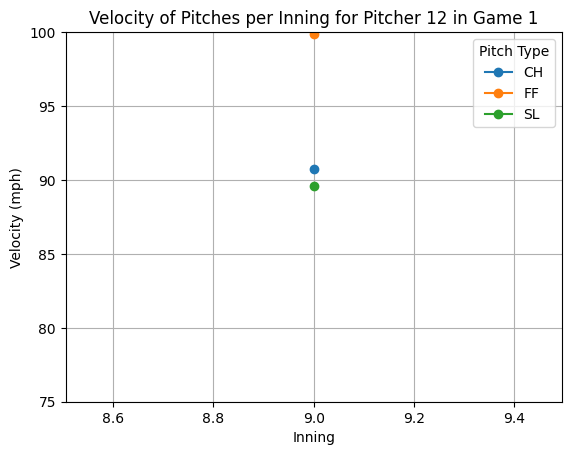

<Figure size 1200x500 with 0 Axes>

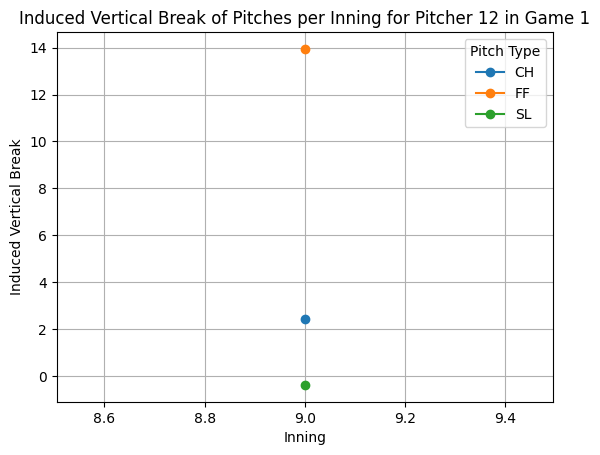

<Figure size 1200x500 with 0 Axes>

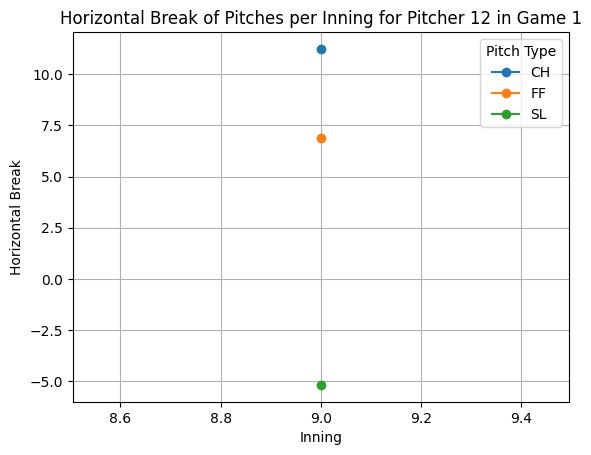

<Figure size 1200x500 with 0 Axes>

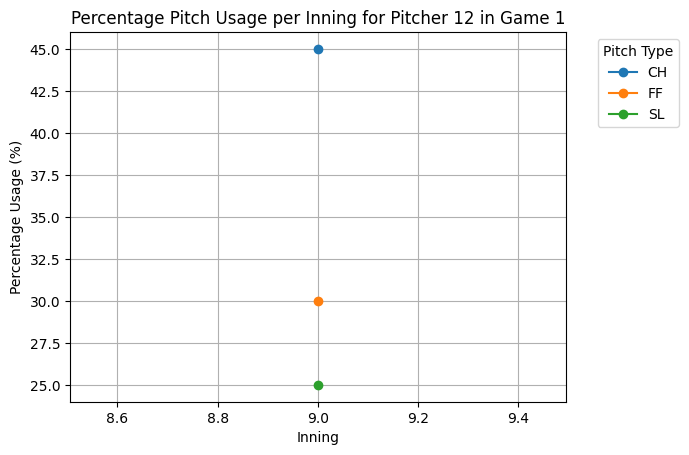

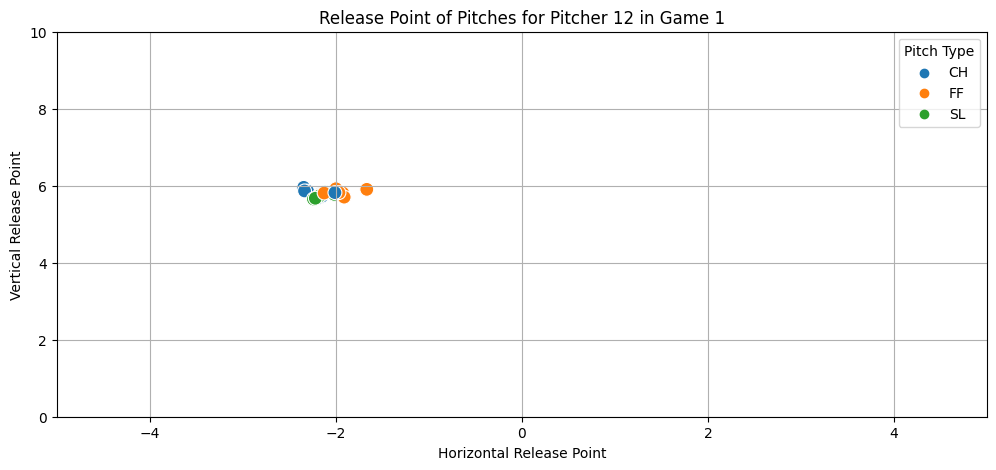

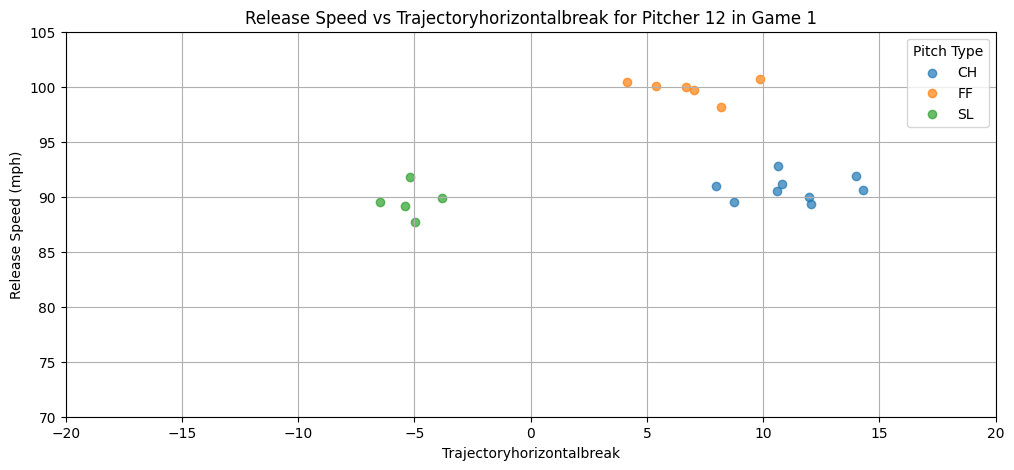

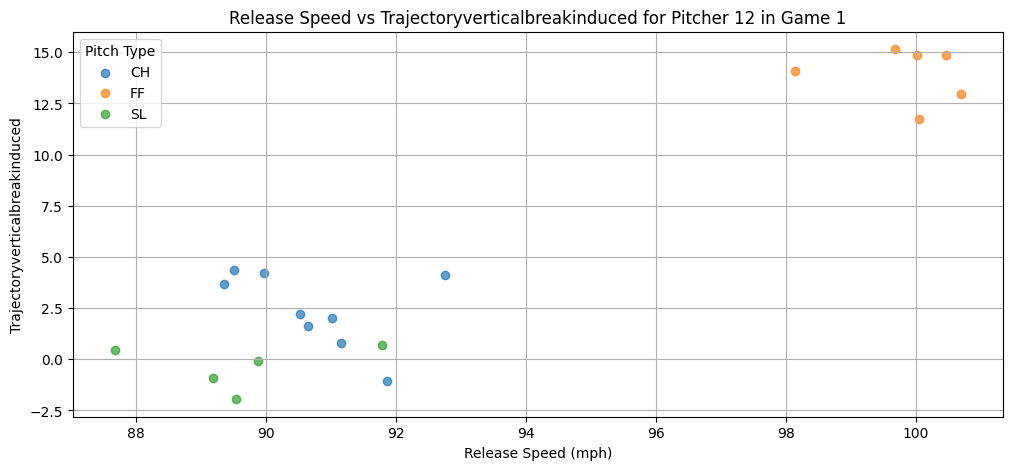

<Figure size 1200x500 with 0 Axes>

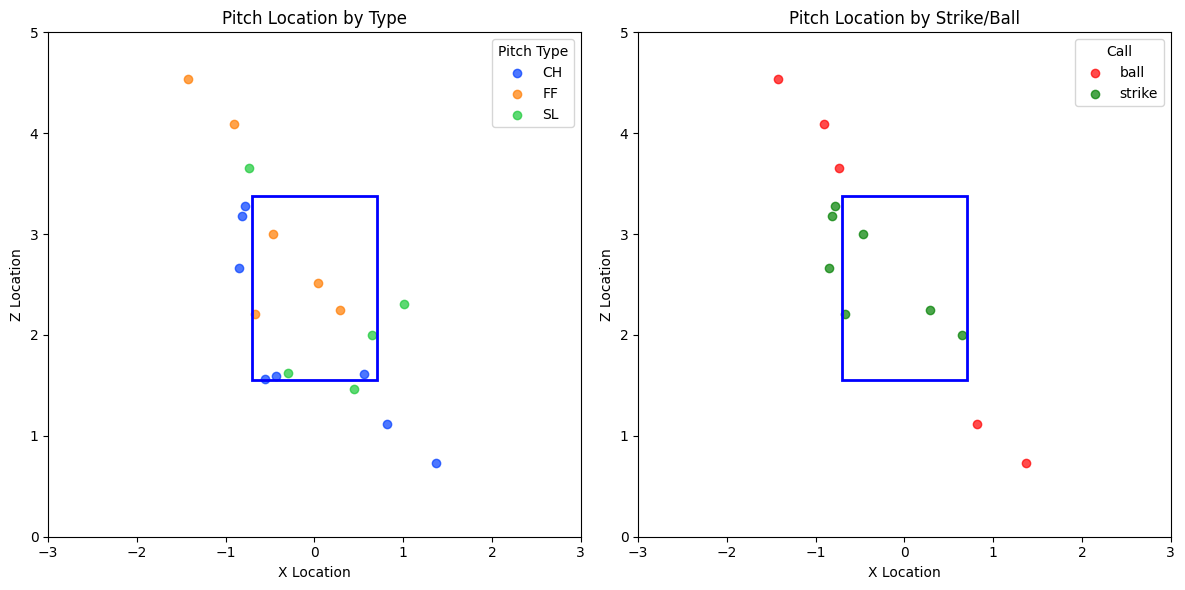

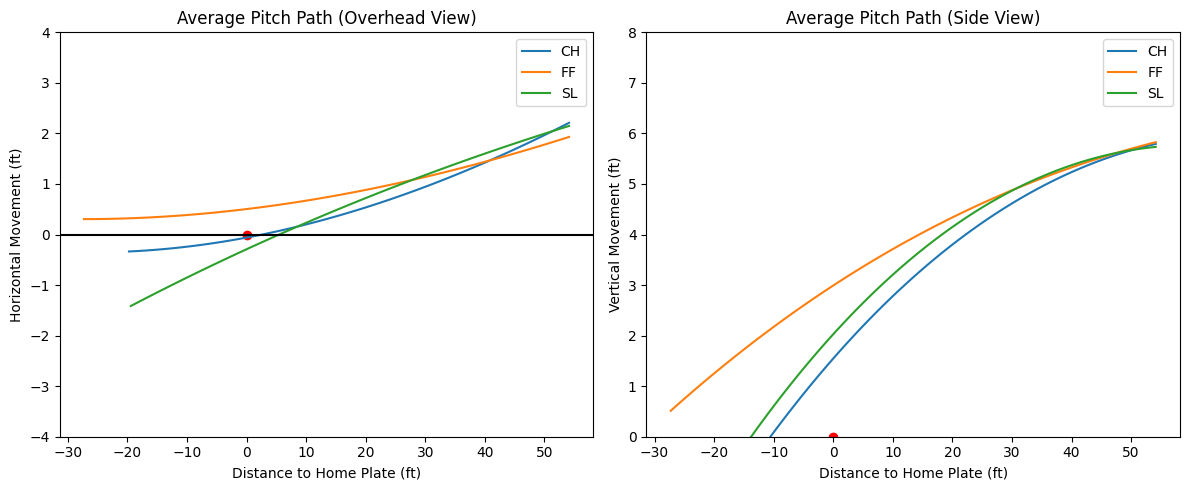

<Figure size 1200x500 with 0 Axes>

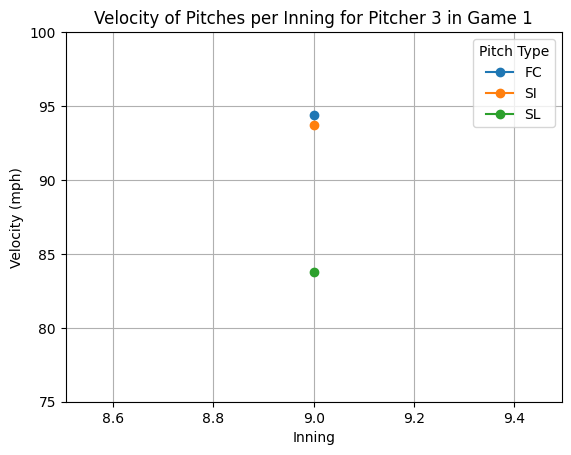

<Figure size 1200x500 with 0 Axes>

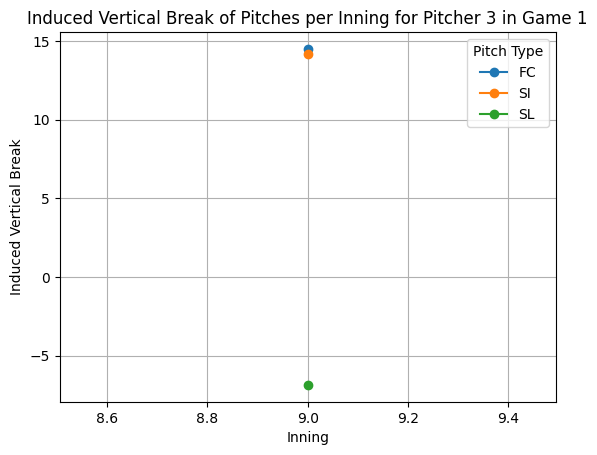

<Figure size 1200x500 with 0 Axes>

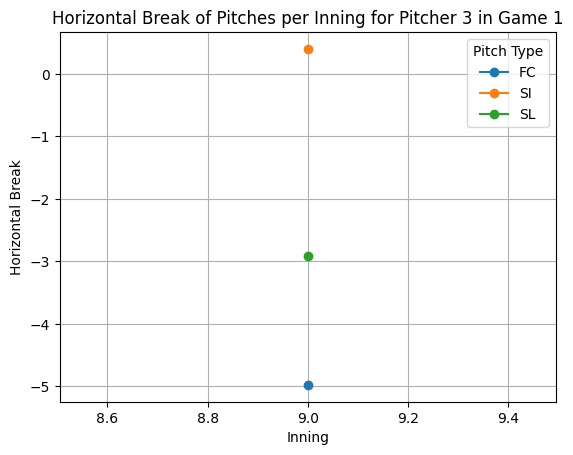

<Figure size 1200x500 with 0 Axes>

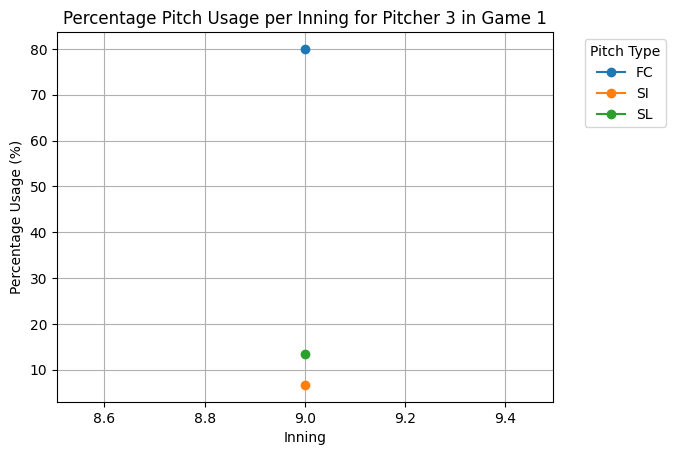

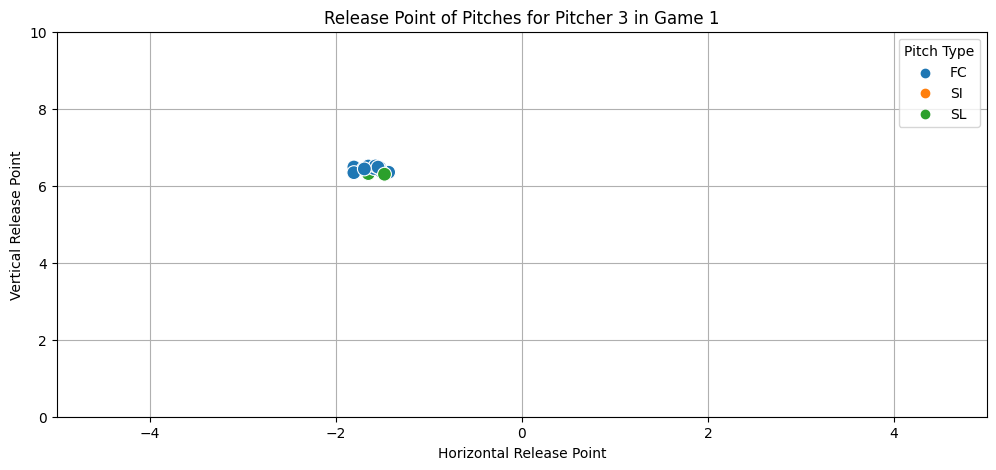

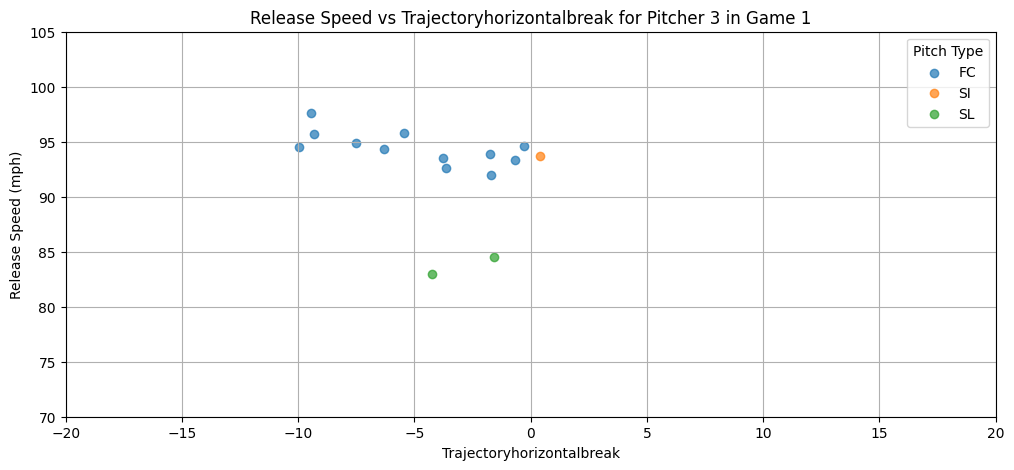

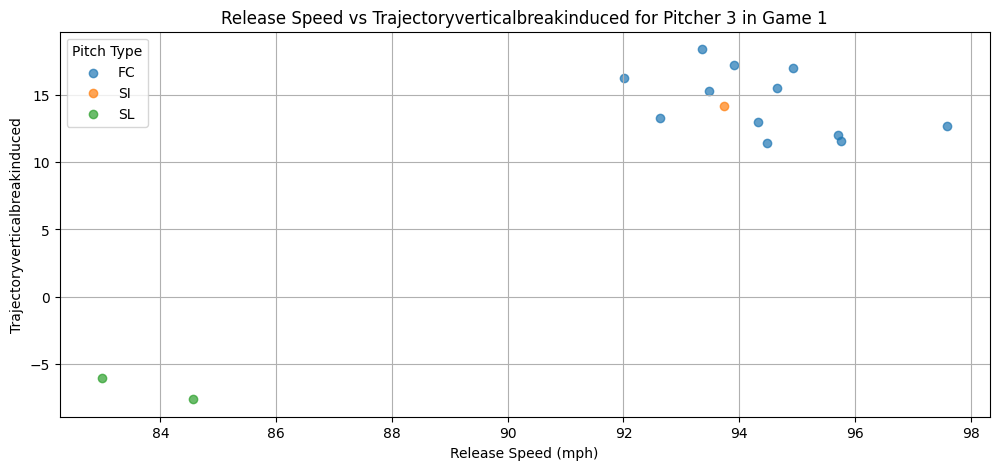

<Figure size 1200x500 with 0 Axes>

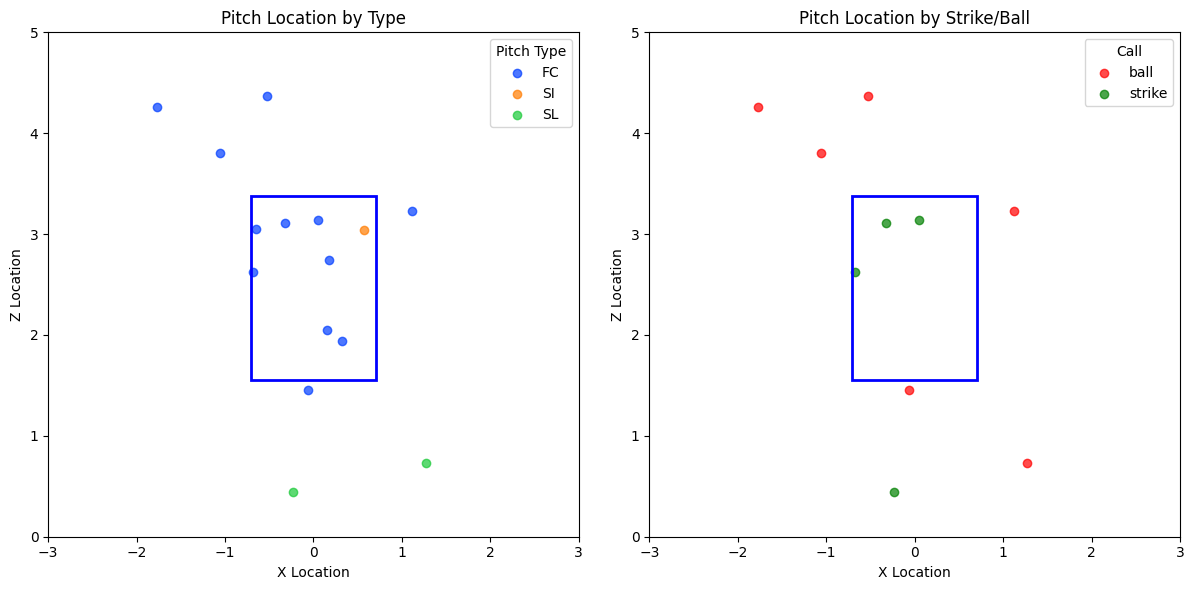

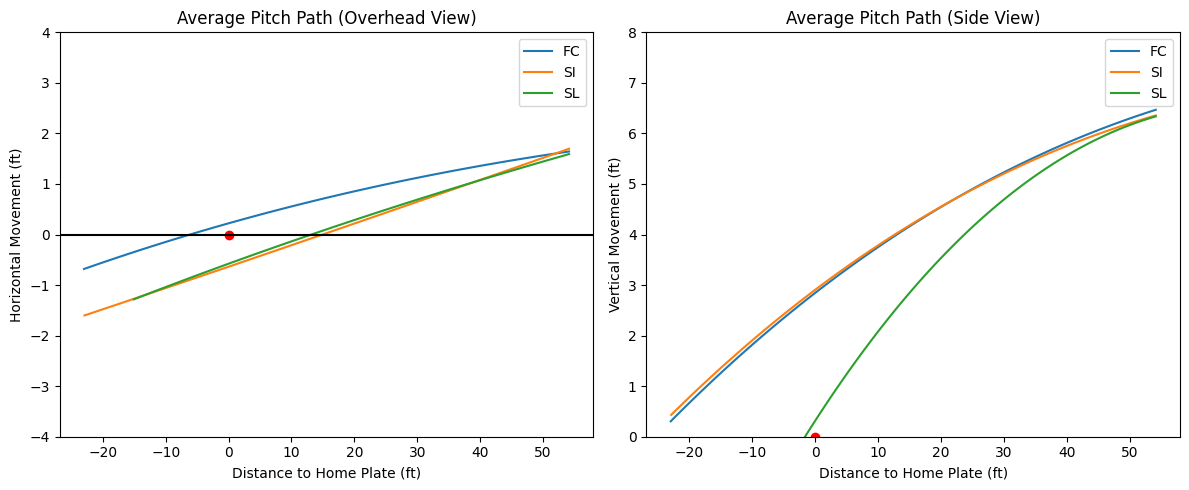

<Figure size 1200x500 with 0 Axes>

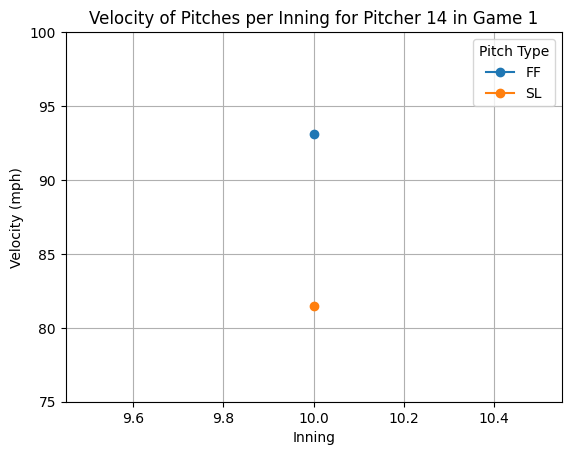

<Figure size 1200x500 with 0 Axes>

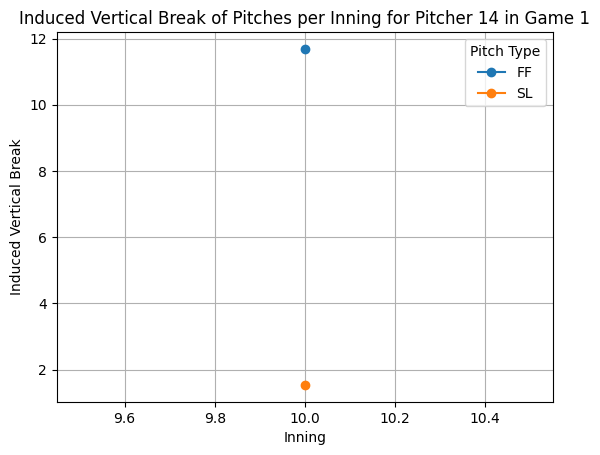

<Figure size 1200x500 with 0 Axes>

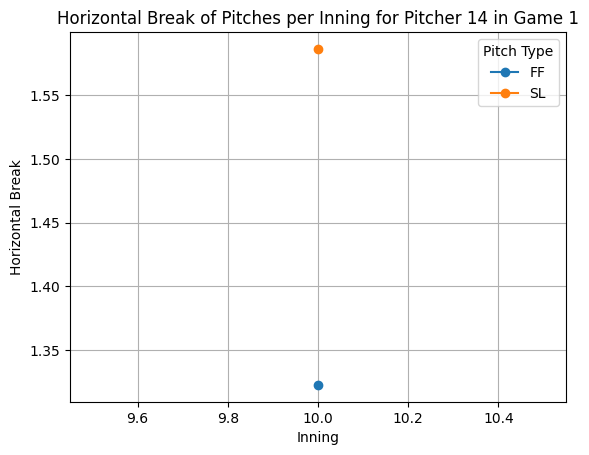

<Figure size 1200x500 with 0 Axes>

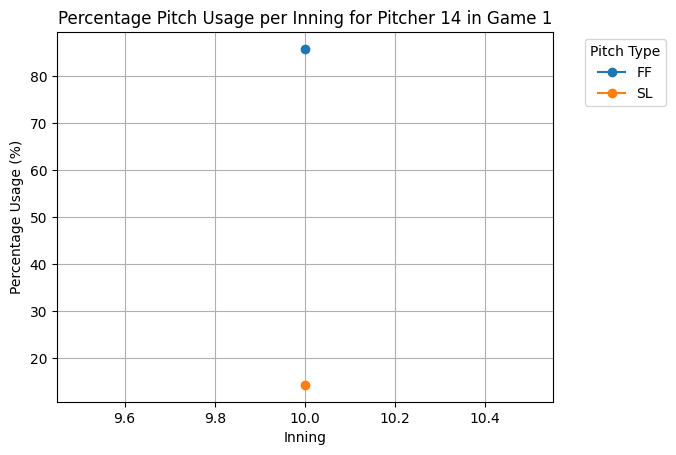

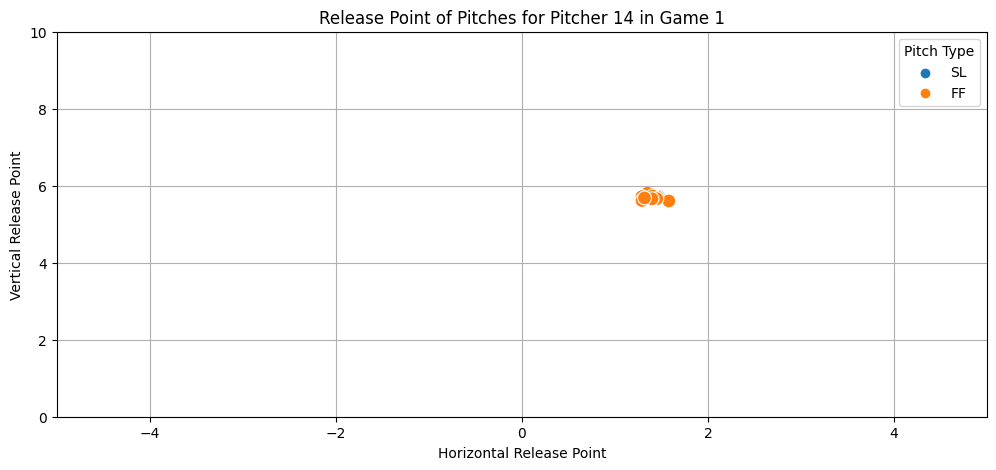

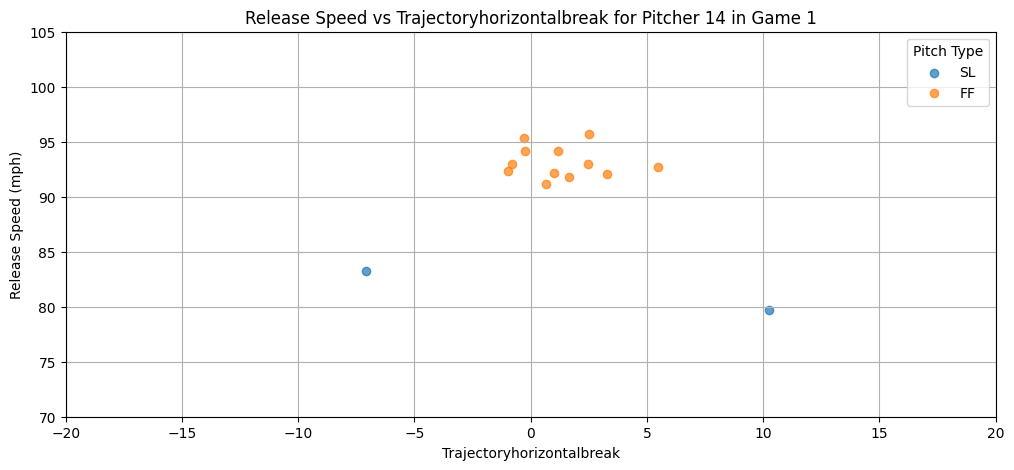

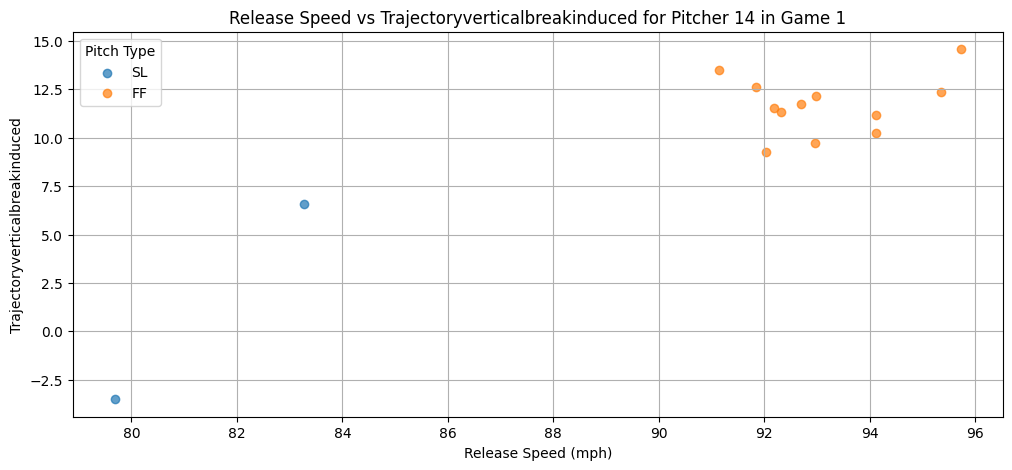

<Figure size 1200x500 with 0 Axes>

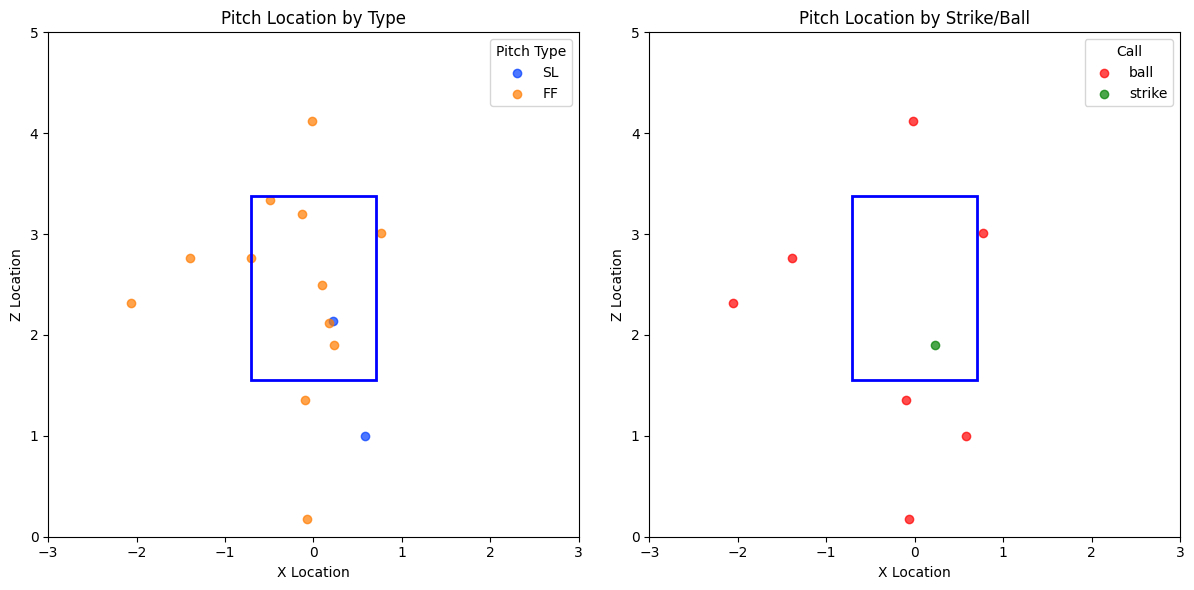

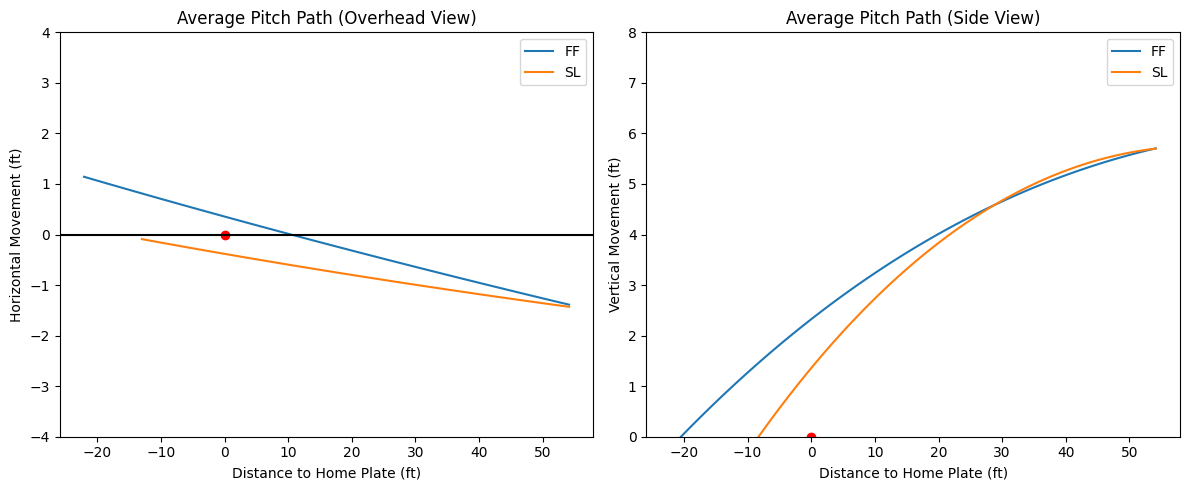

<Figure size 1200x500 with 0 Axes>

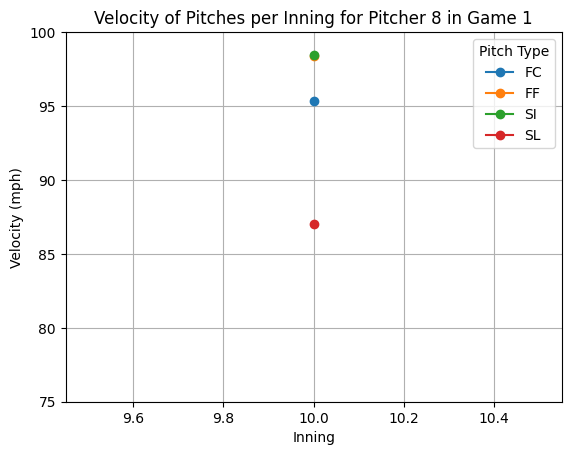

<Figure size 1200x500 with 0 Axes>

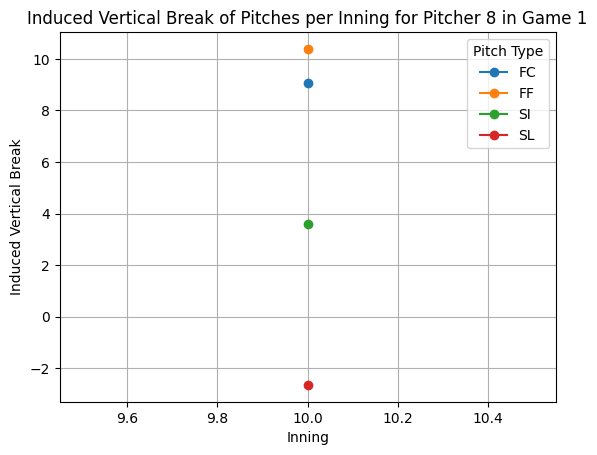

<Figure size 1200x500 with 0 Axes>

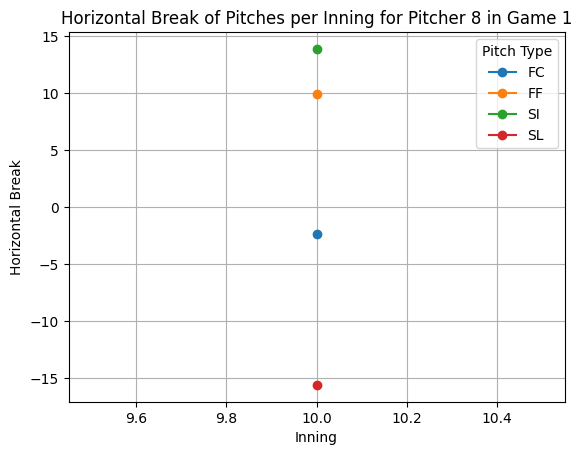

<Figure size 1200x500 with 0 Axes>

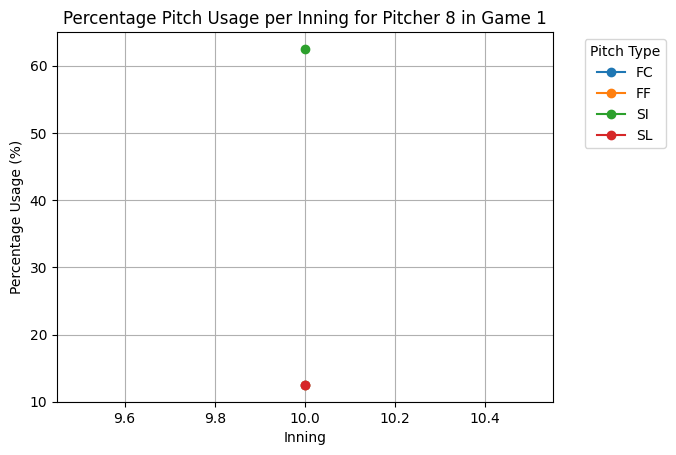

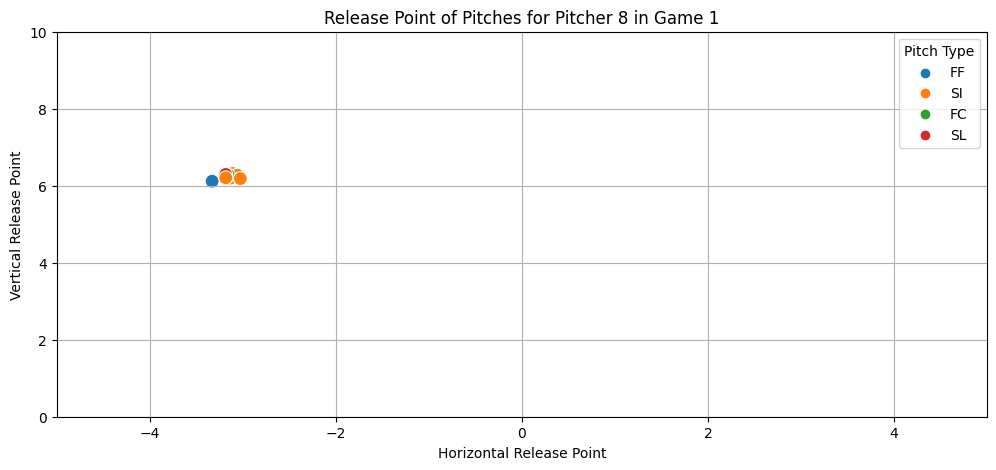

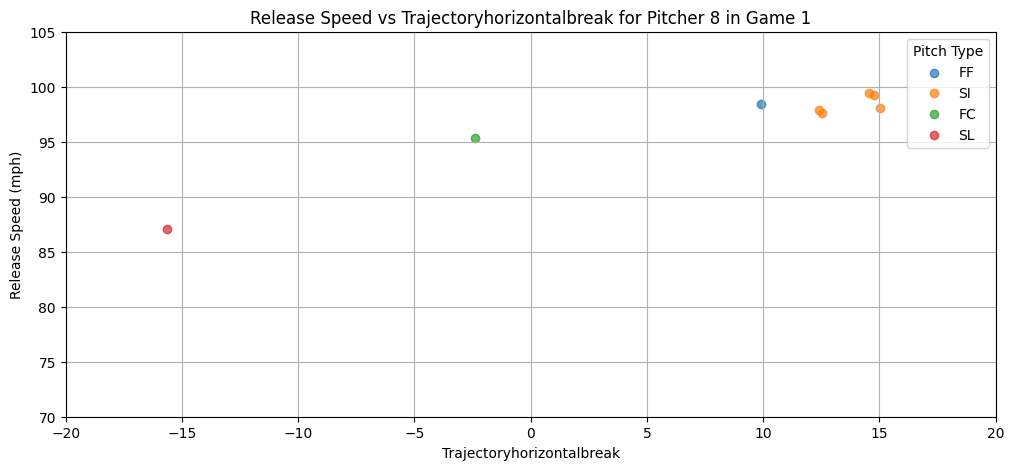

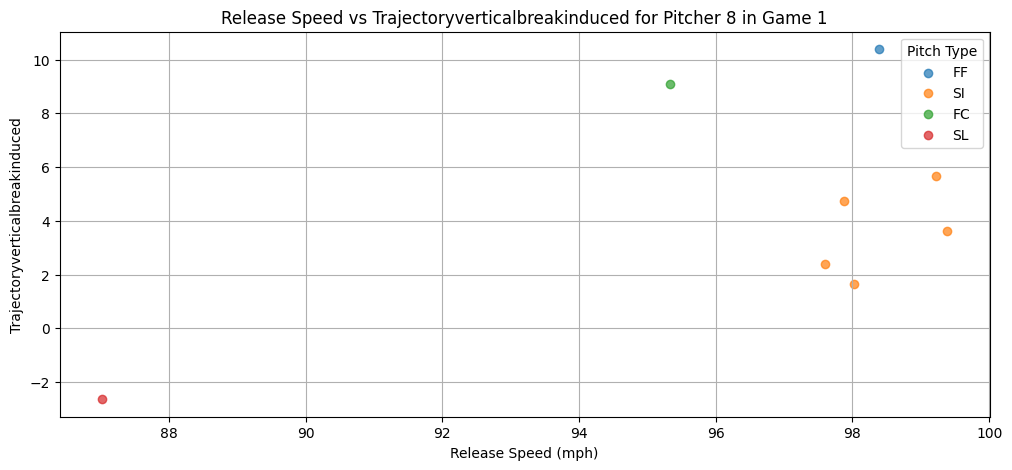

<Figure size 1200x500 with 0 Axes>

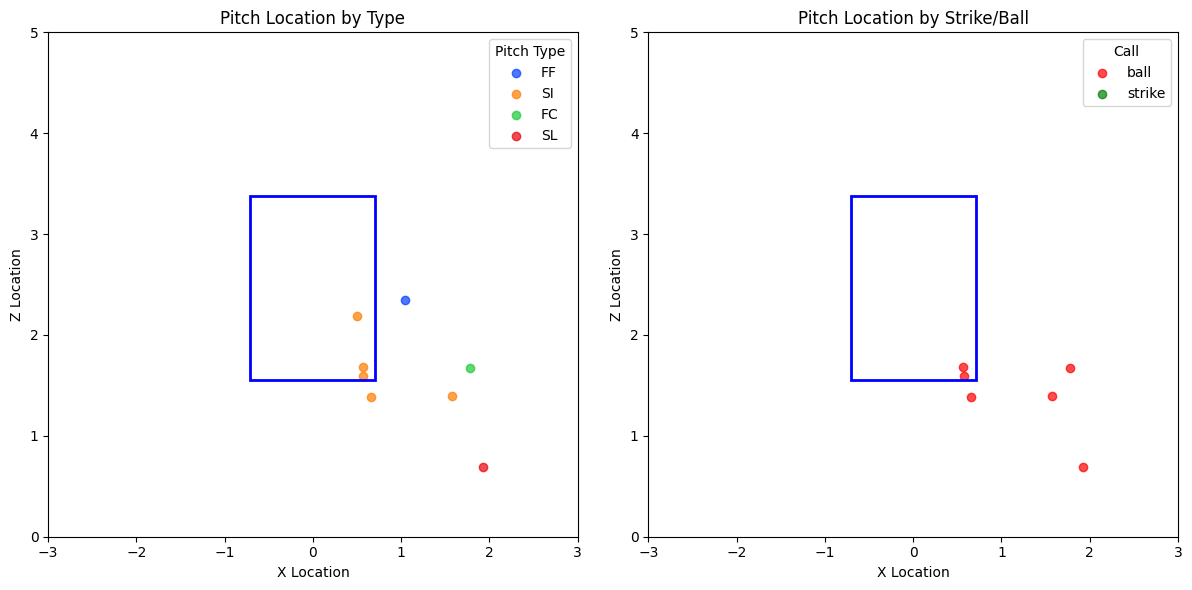

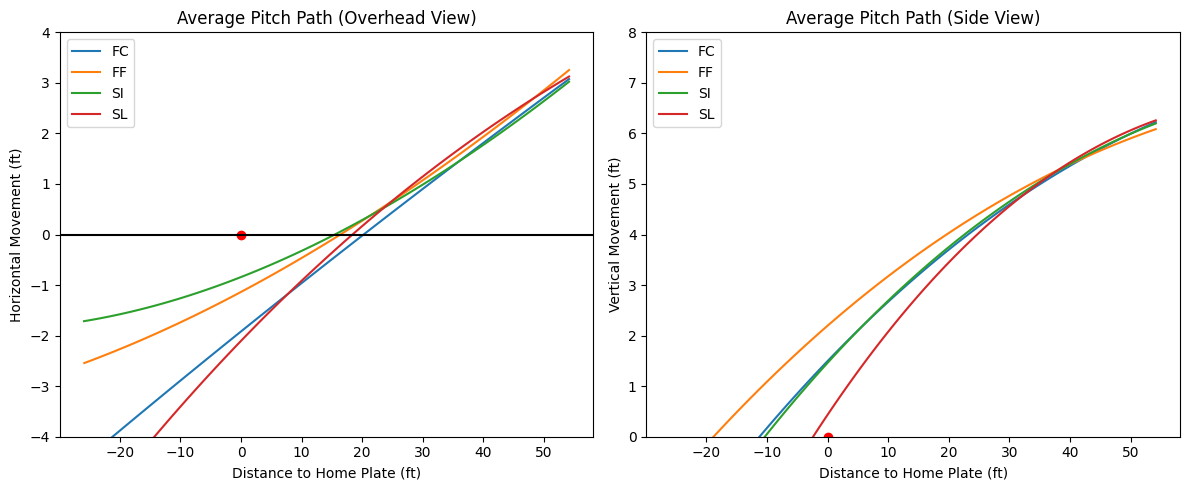

<Figure size 1200x500 with 0 Axes>

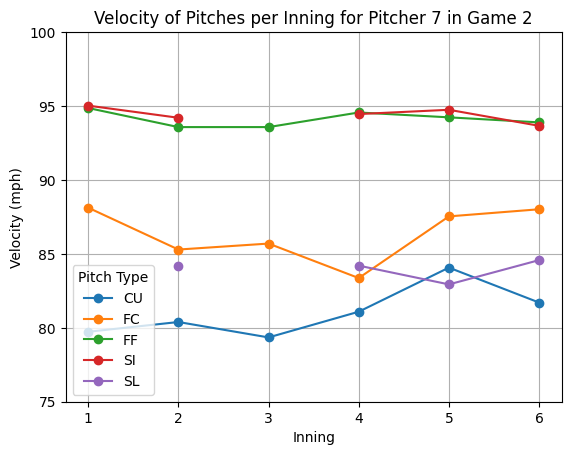

<Figure size 1200x500 with 0 Axes>

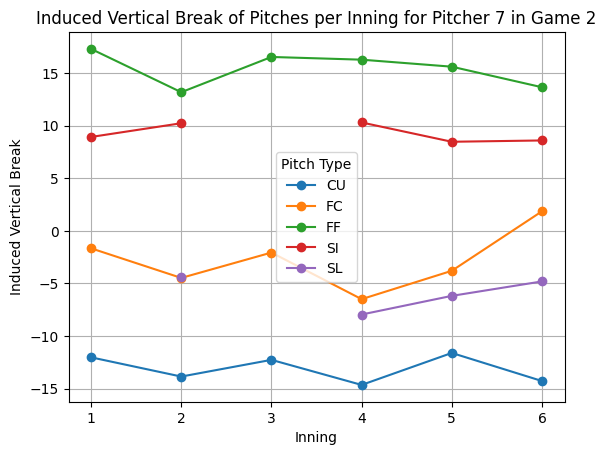

<Figure size 1200x500 with 0 Axes>

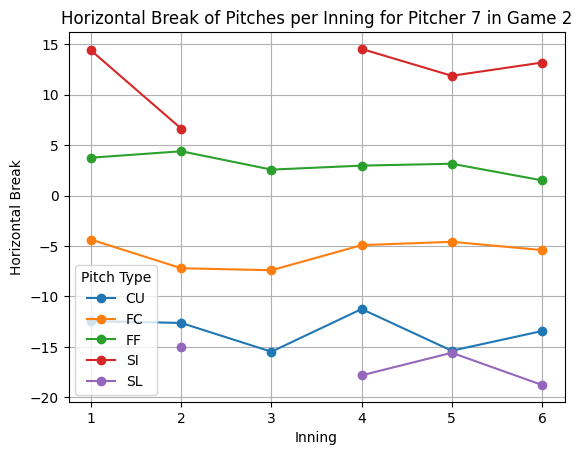

<Figure size 1200x500 with 0 Axes>

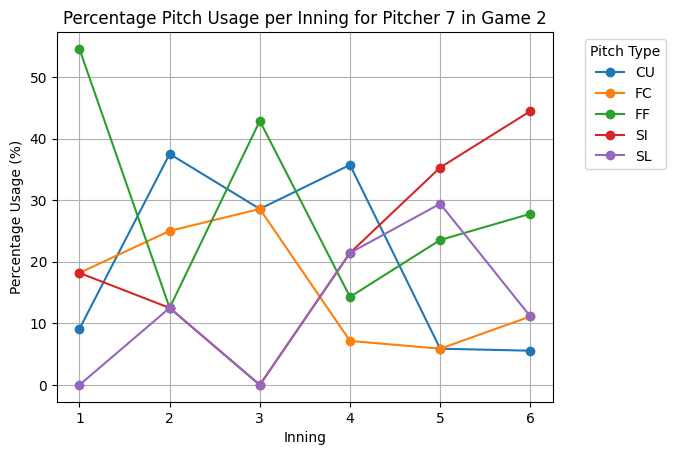

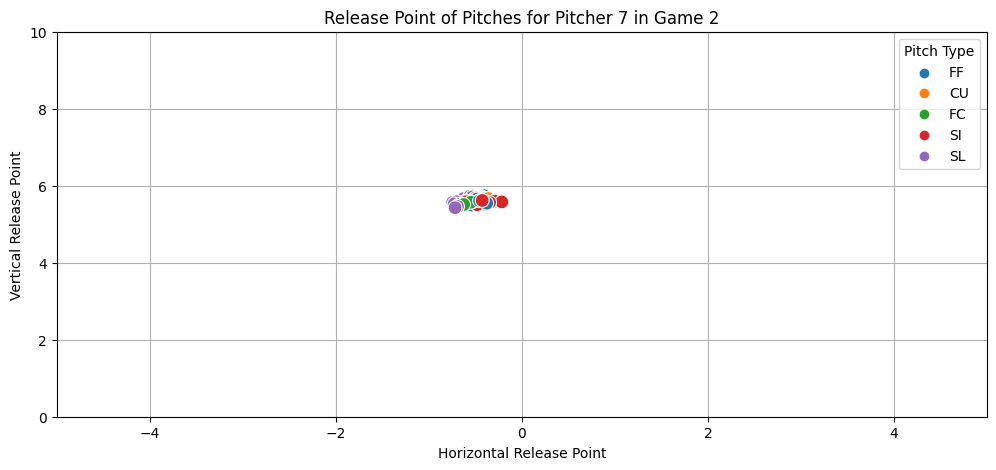

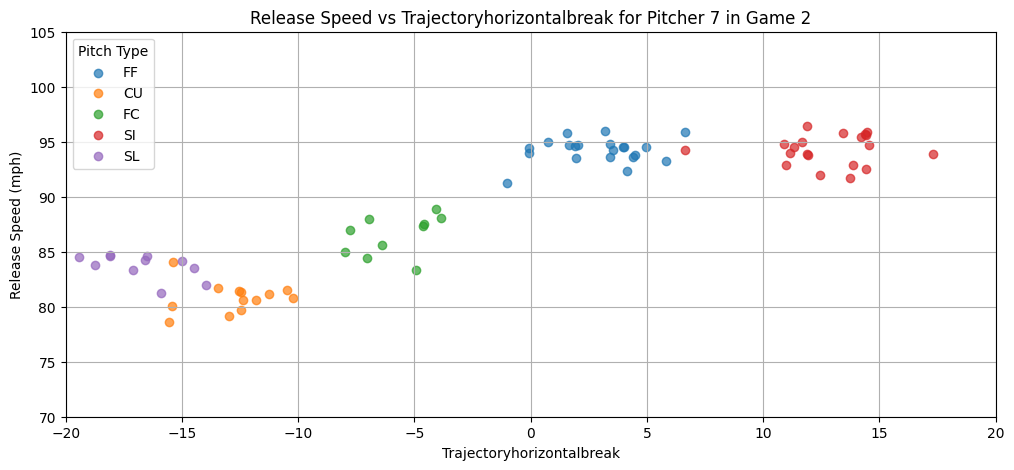

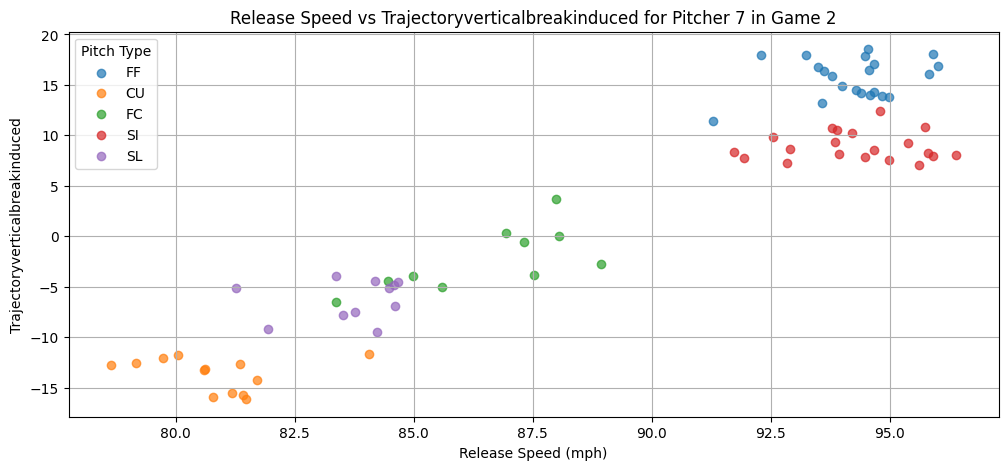

<Figure size 1200x500 with 0 Axes>

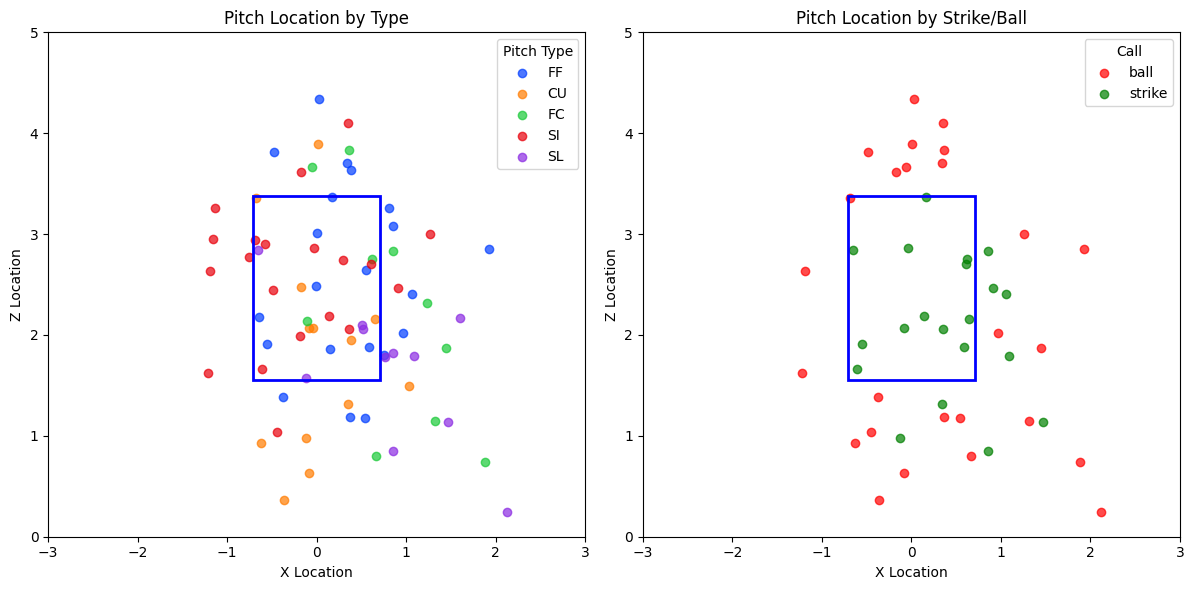

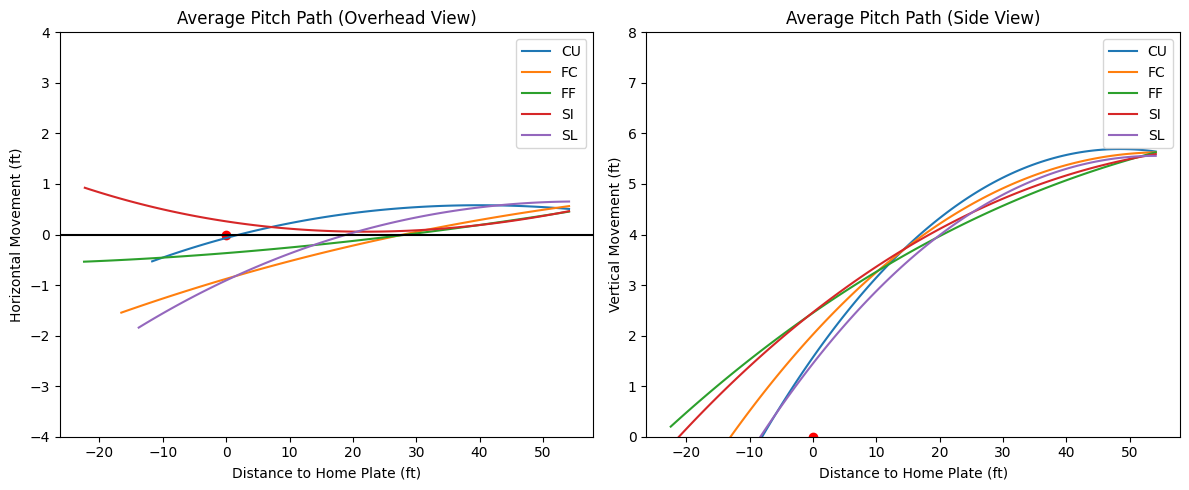

<Figure size 1200x500 with 0 Axes>

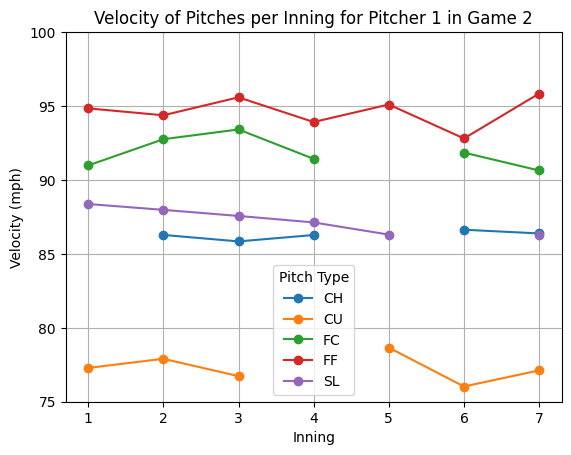

<Figure size 1200x500 with 0 Axes>

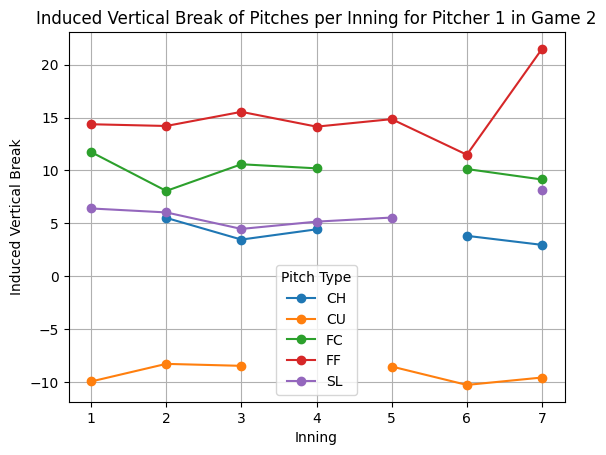

<Figure size 1200x500 with 0 Axes>

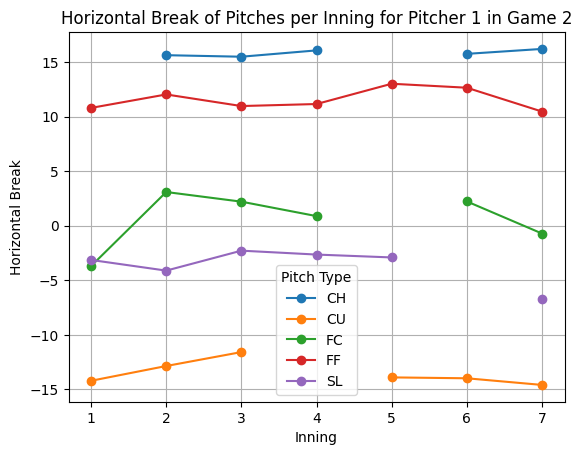

<Figure size 1200x500 with 0 Axes>

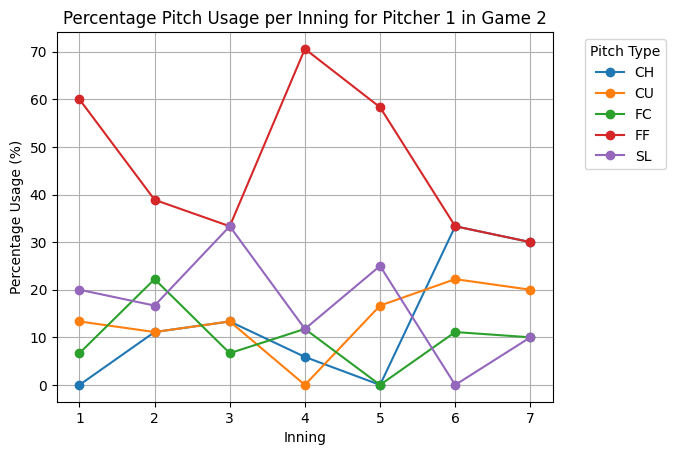

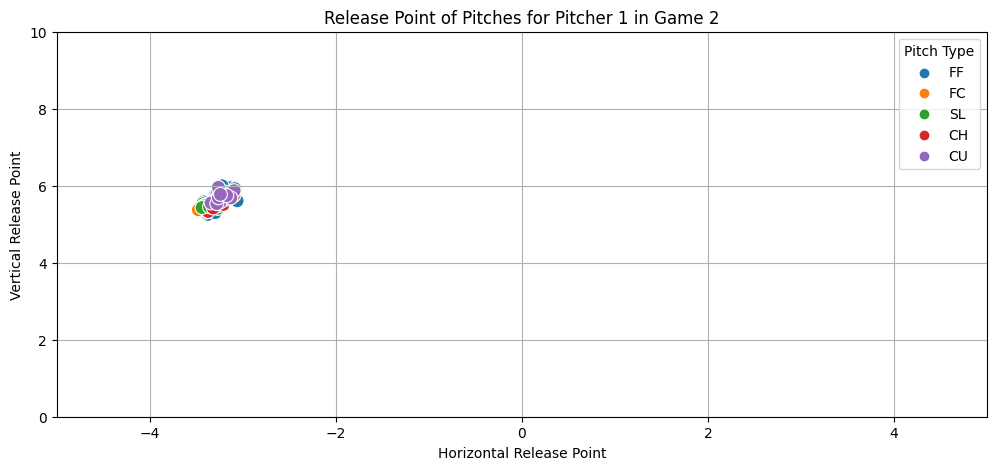

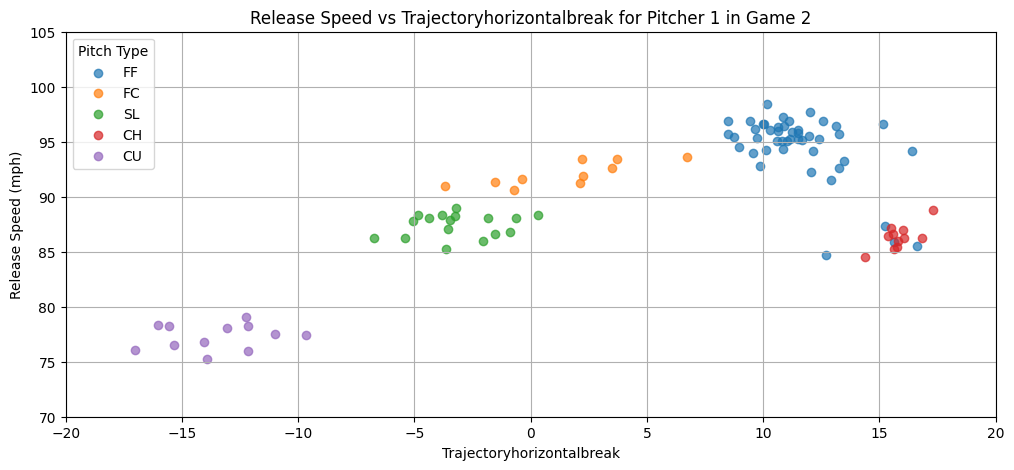

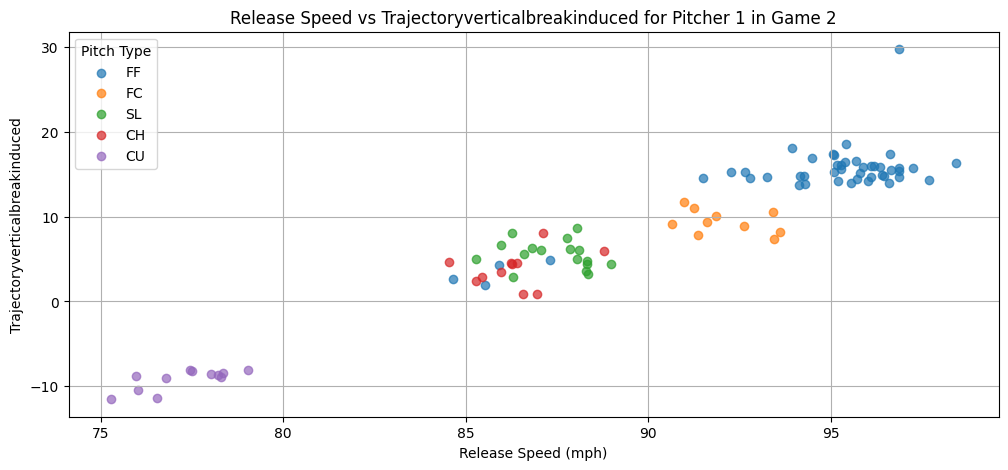

<Figure size 1200x500 with 0 Axes>

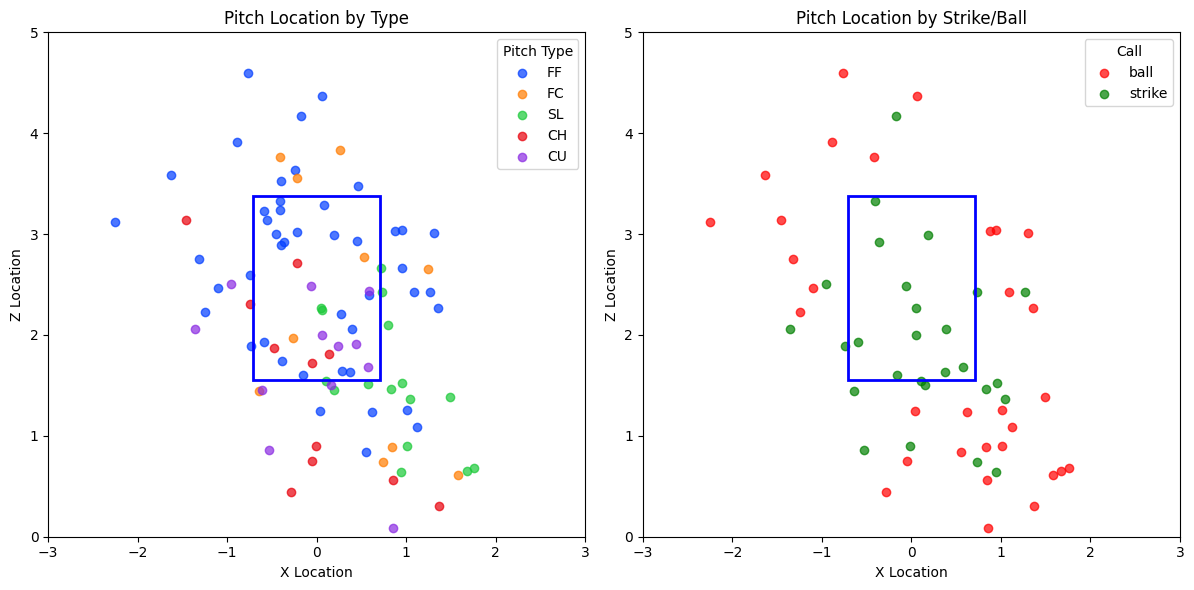

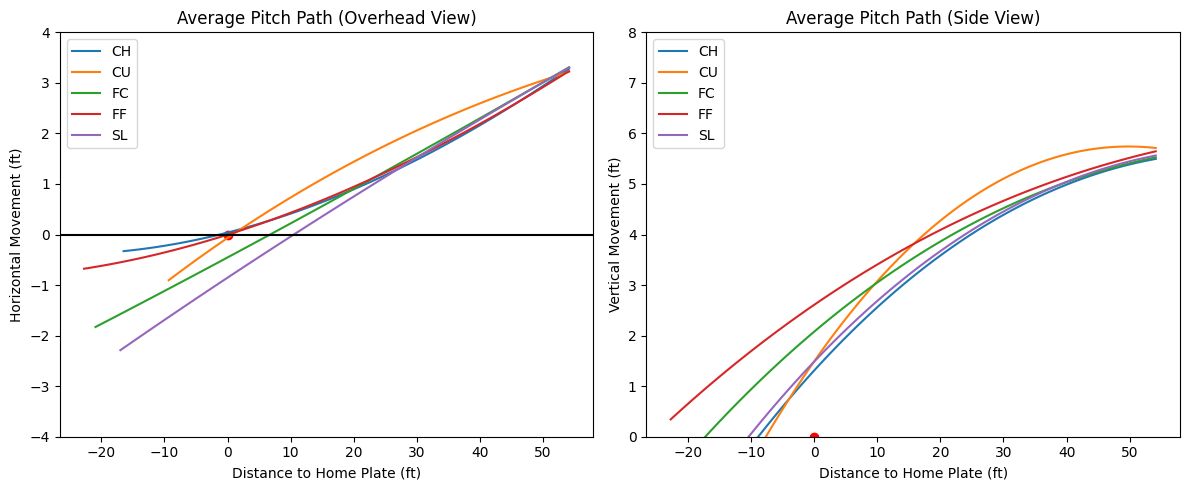

<Figure size 1200x500 with 0 Axes>

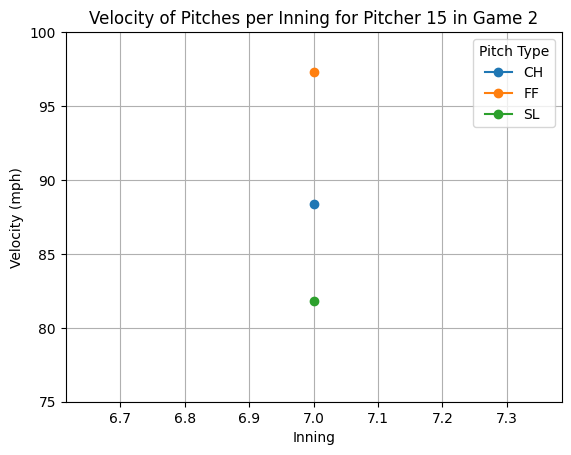

<Figure size 1200x500 with 0 Axes>

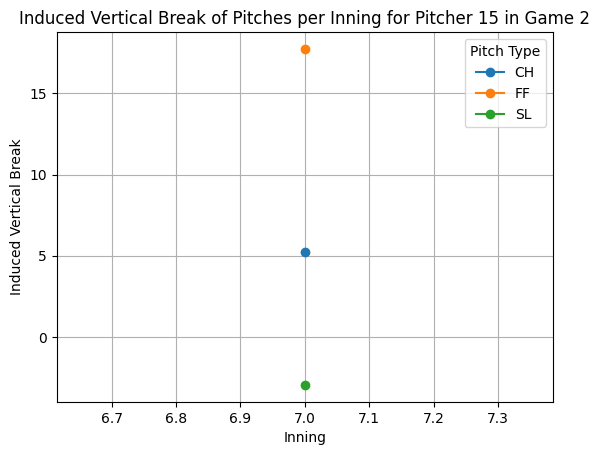

<Figure size 1200x500 with 0 Axes>

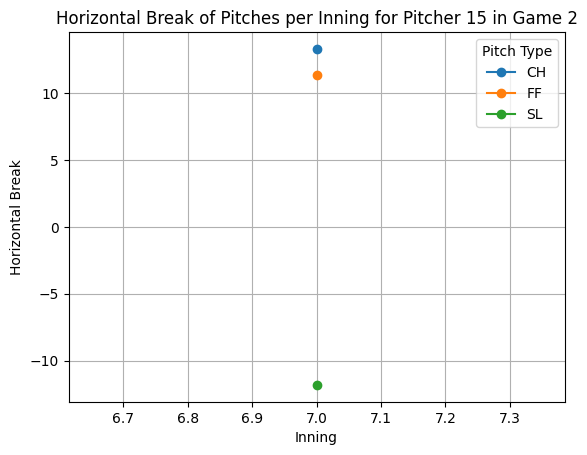

<Figure size 1200x500 with 0 Axes>

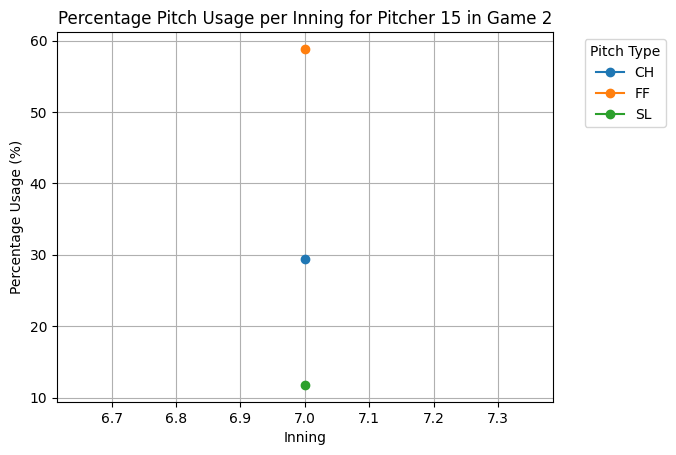

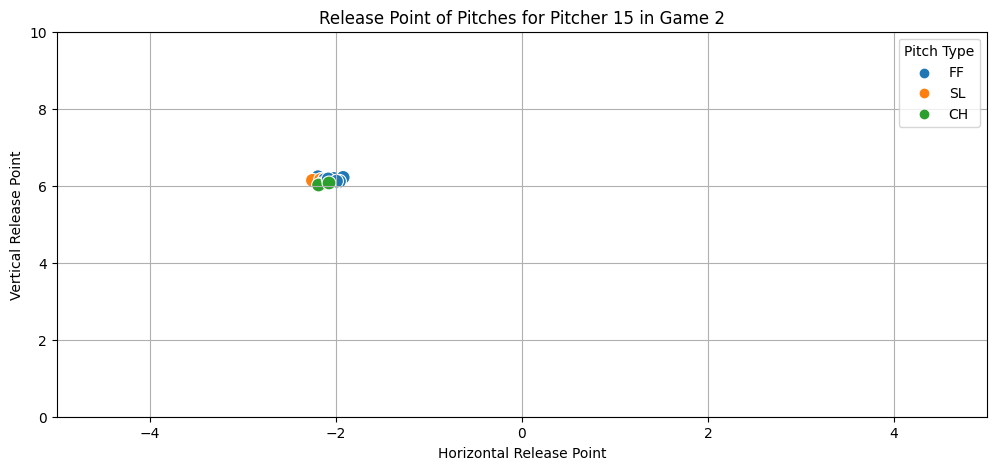

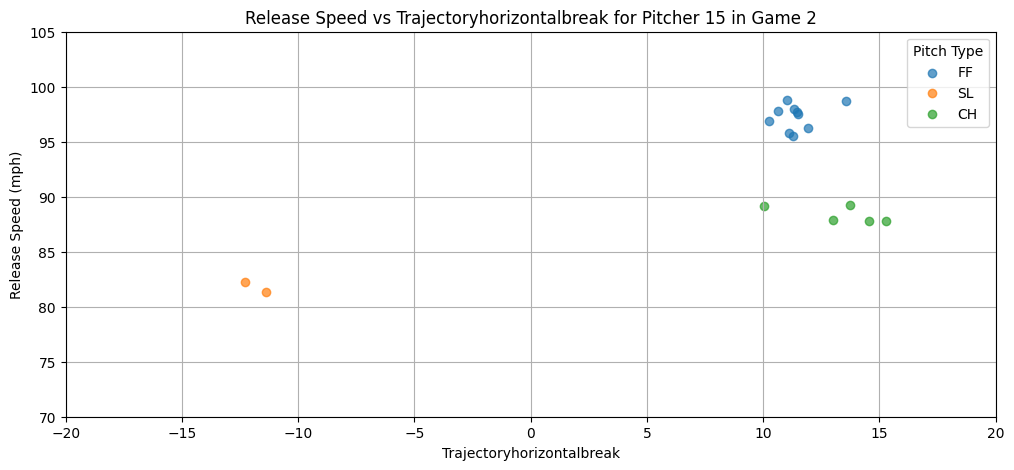

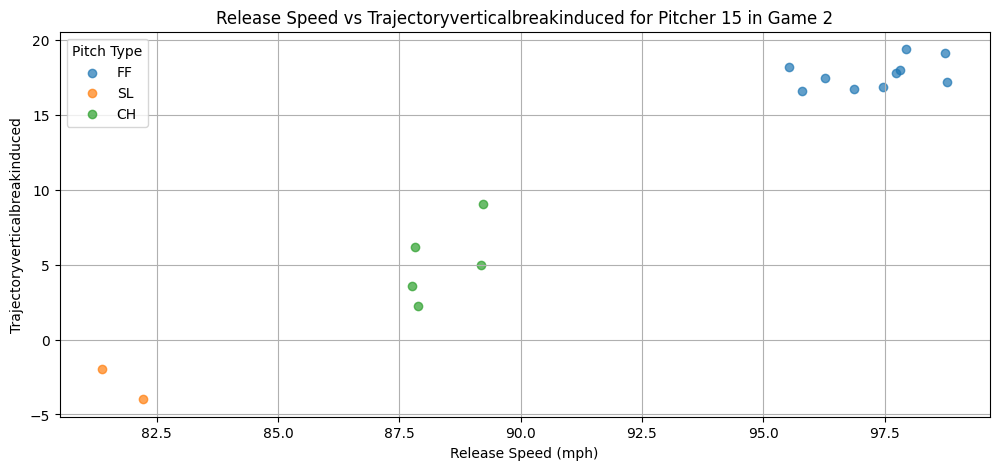

<Figure size 1200x500 with 0 Axes>

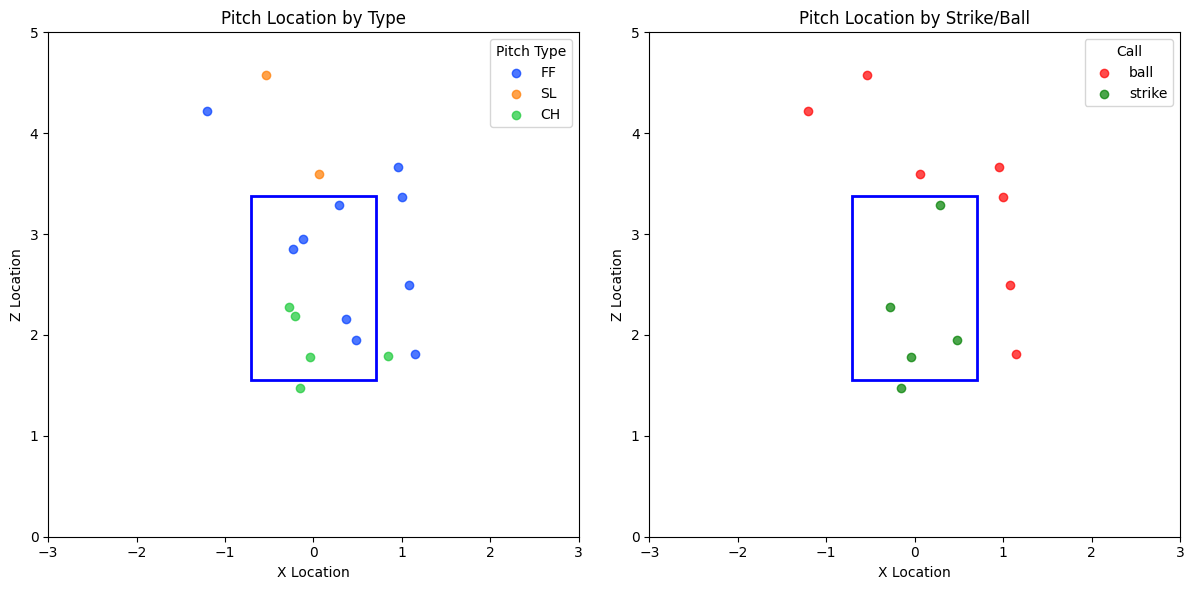

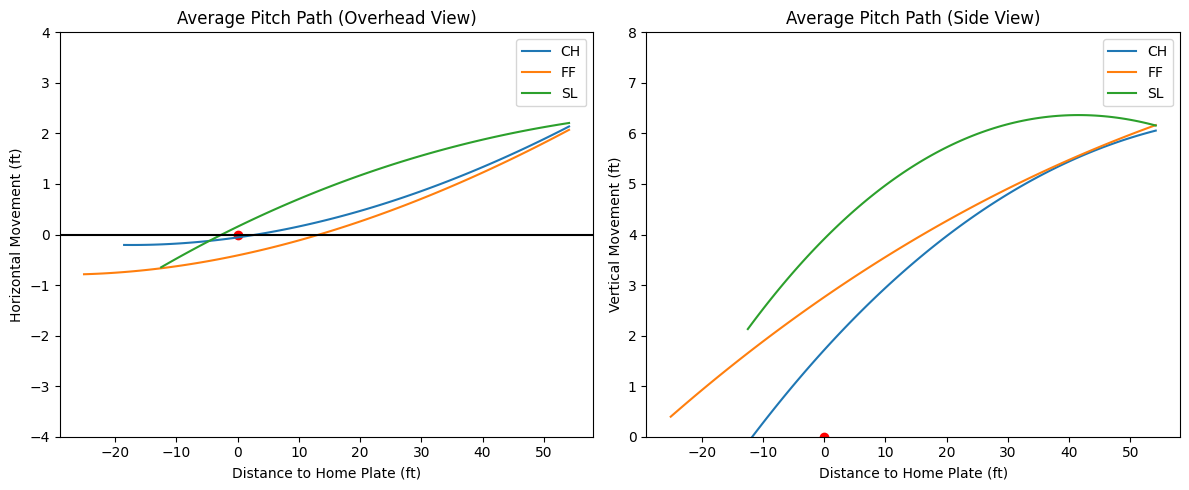

<Figure size 1200x500 with 0 Axes>

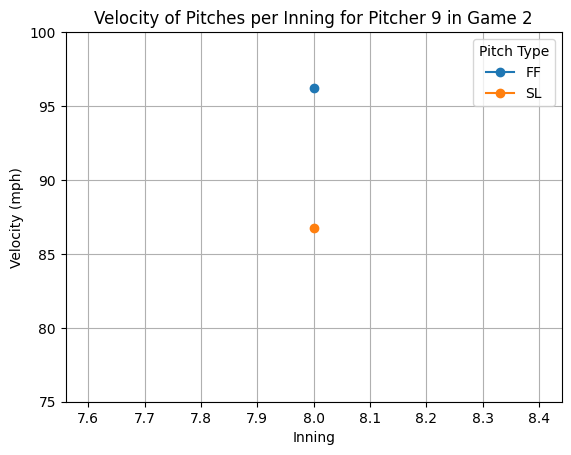

<Figure size 1200x500 with 0 Axes>

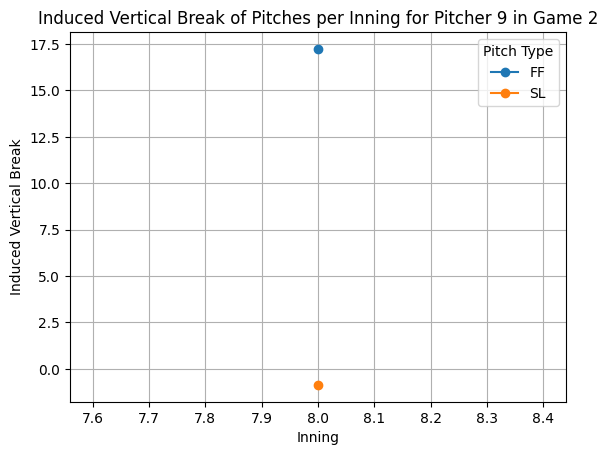

<Figure size 1200x500 with 0 Axes>

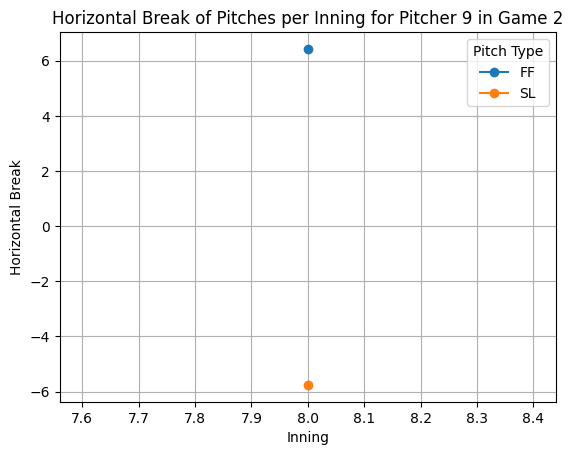

<Figure size 1200x500 with 0 Axes>

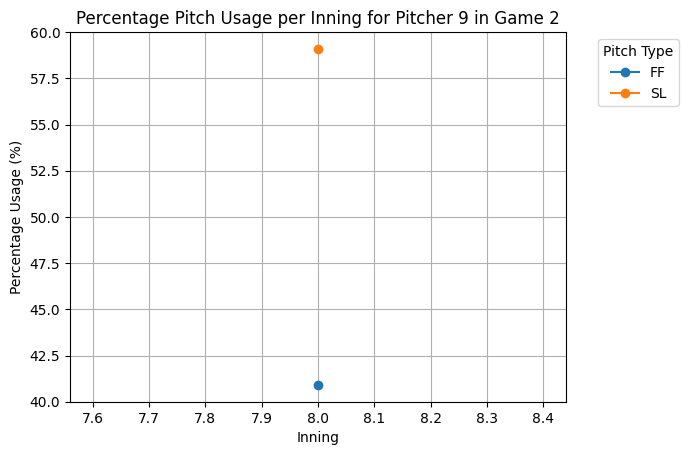

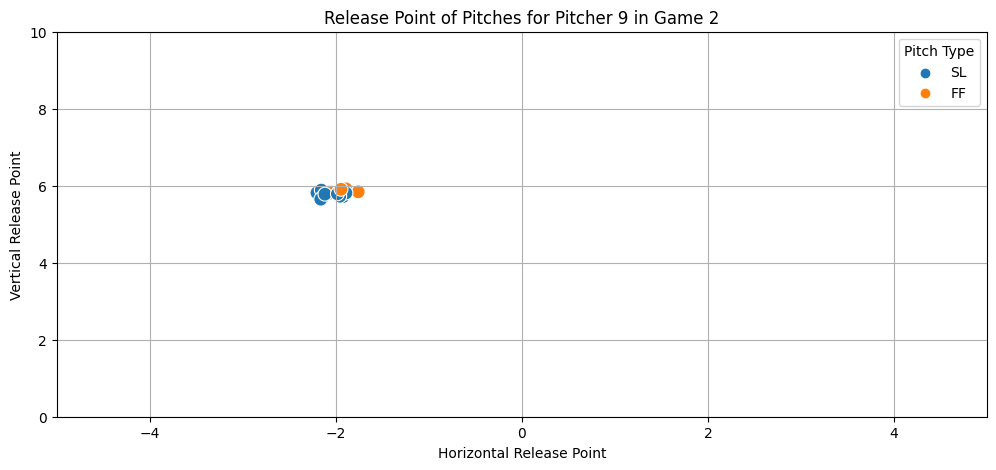

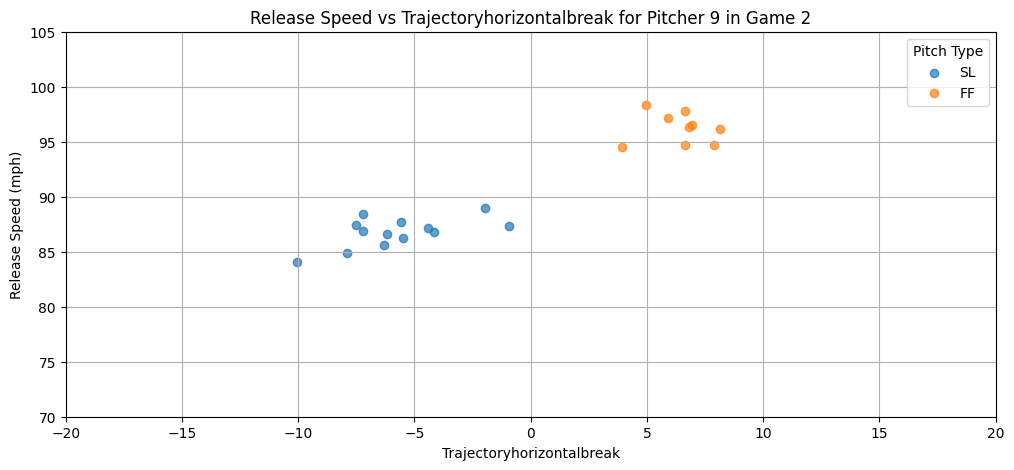

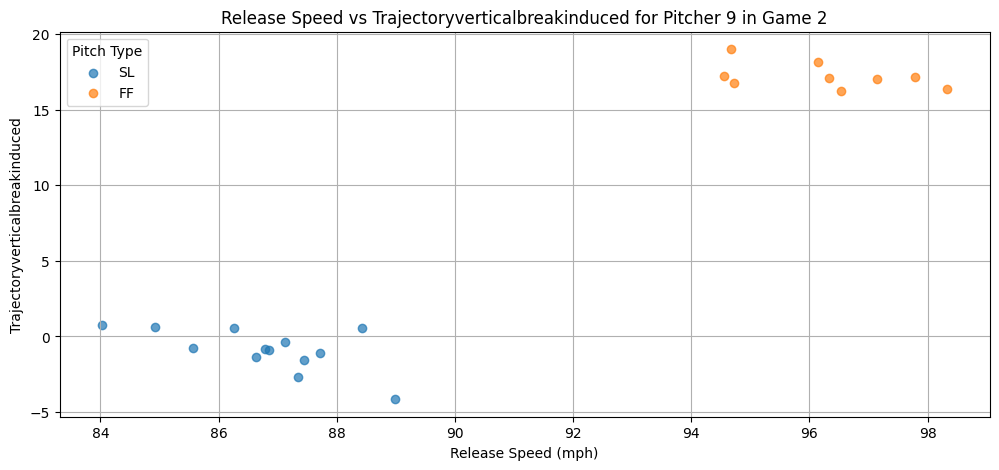

<Figure size 1200x500 with 0 Axes>

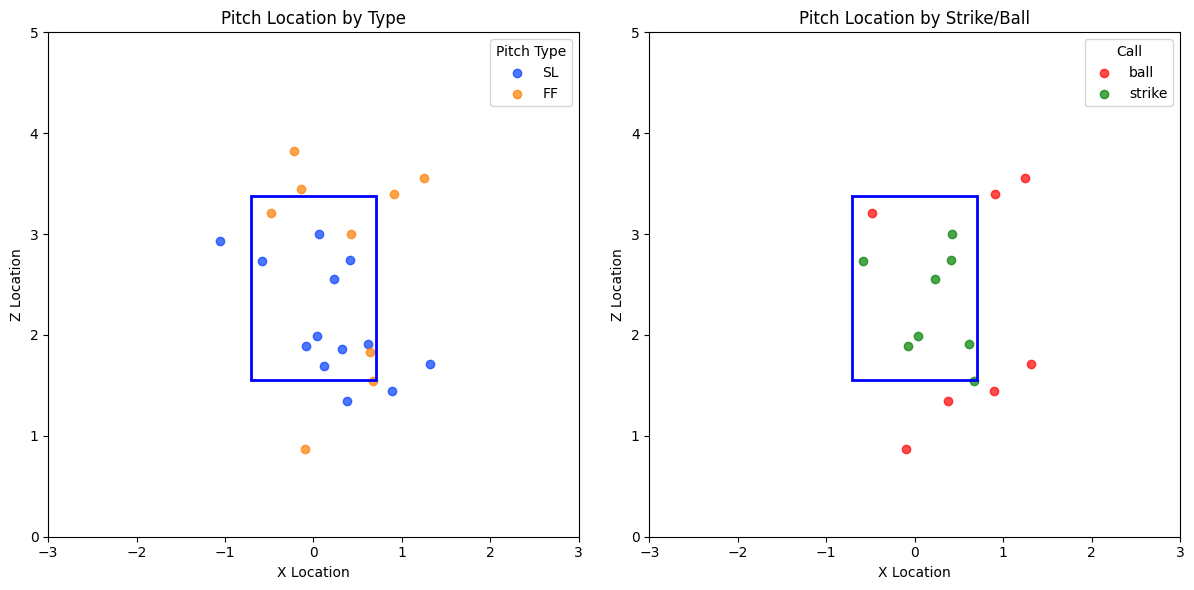

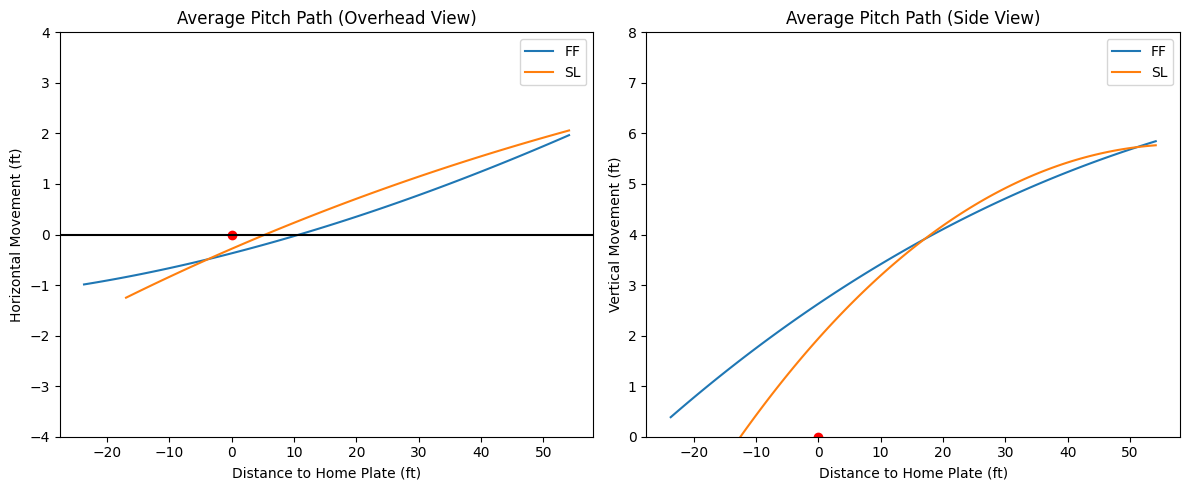

<Figure size 1200x500 with 0 Axes>

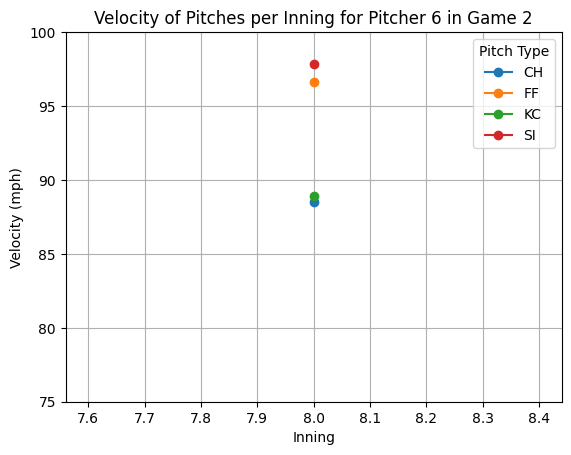

<Figure size 1200x500 with 0 Axes>

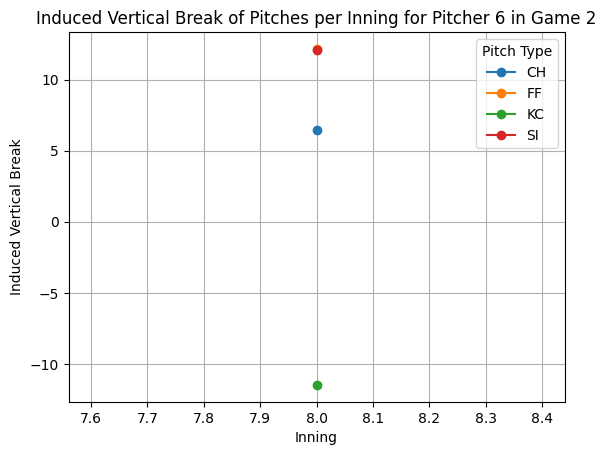

<Figure size 1200x500 with 0 Axes>

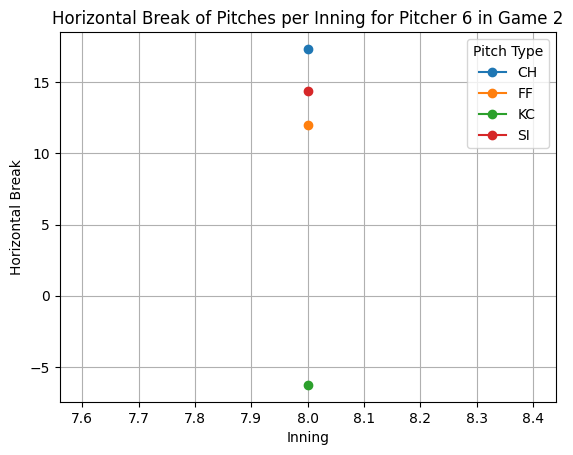

<Figure size 1200x500 with 0 Axes>

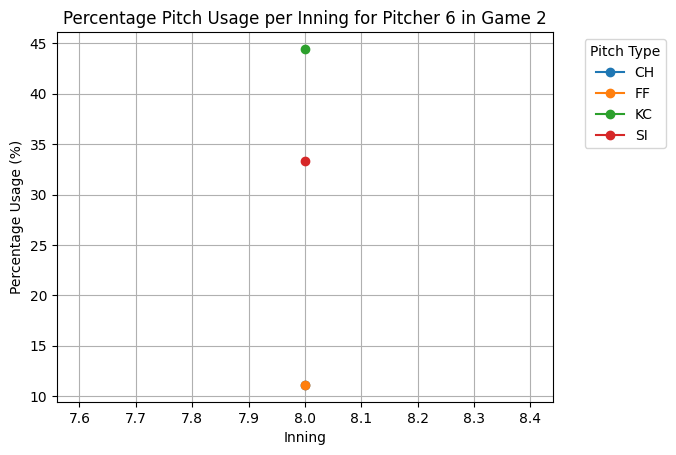

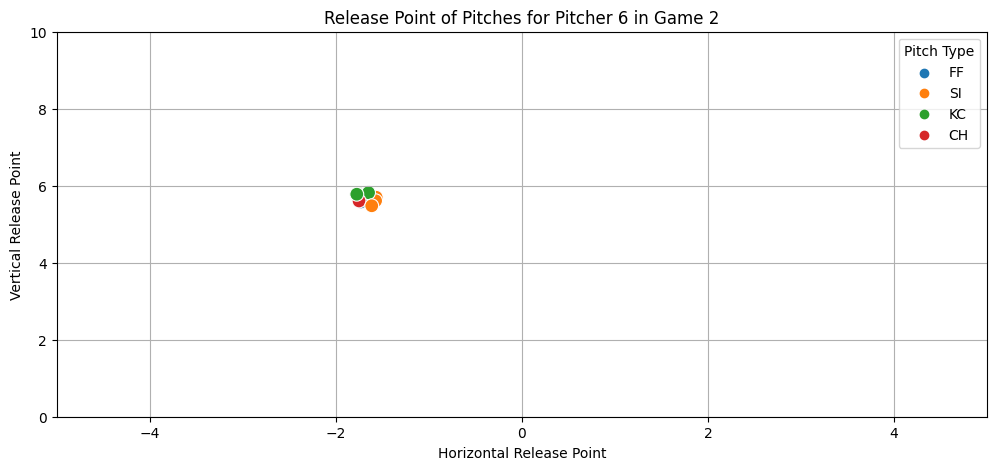

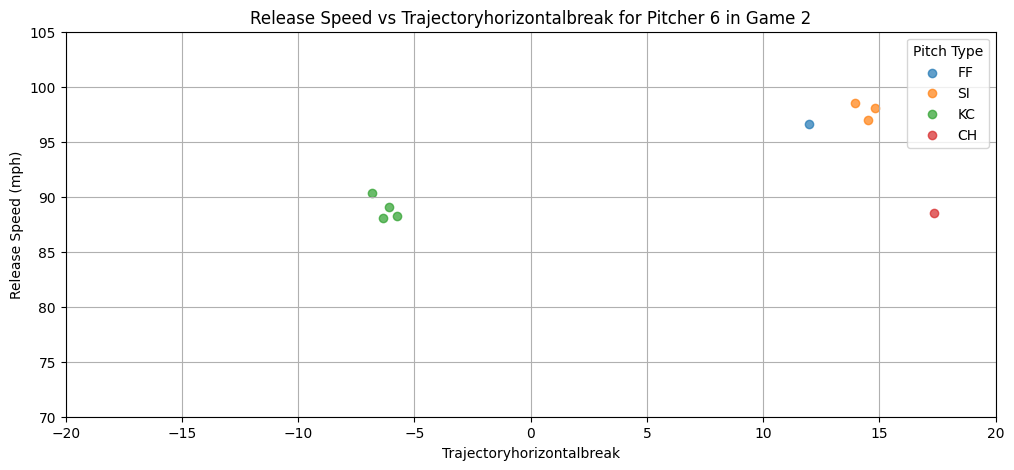

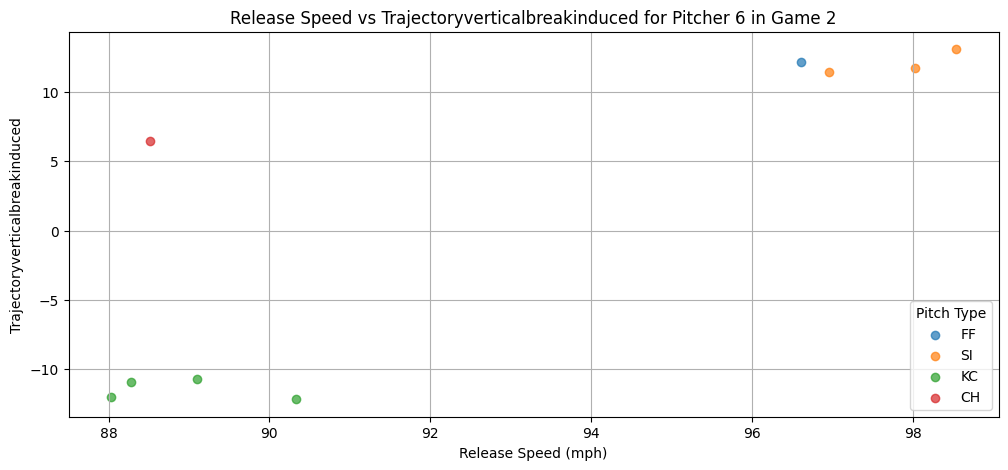

<Figure size 1200x500 with 0 Axes>

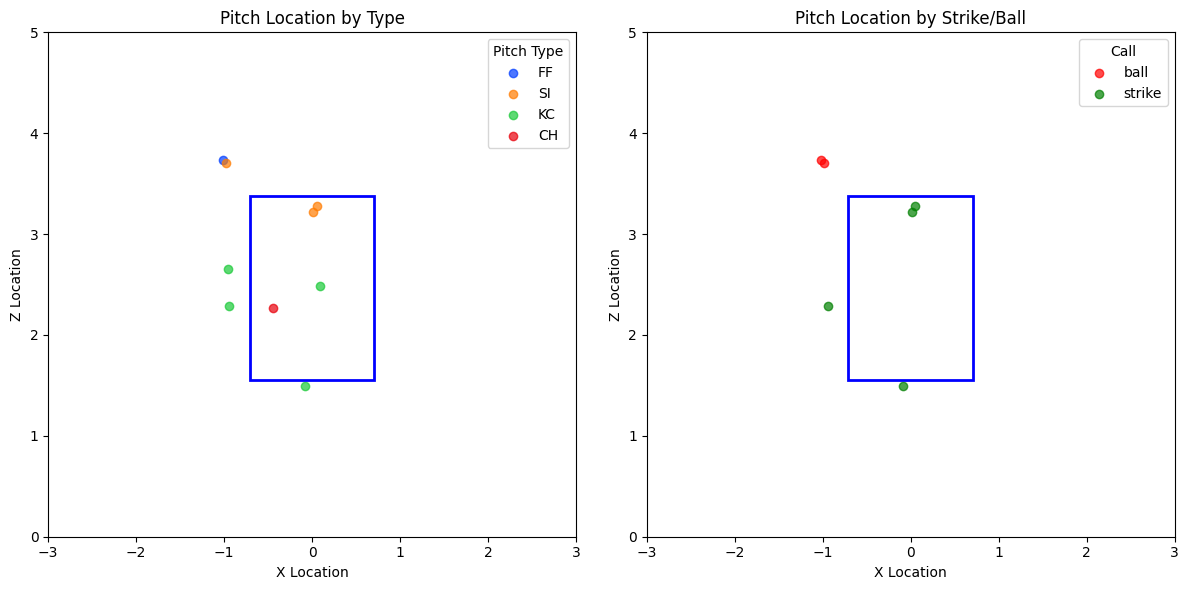

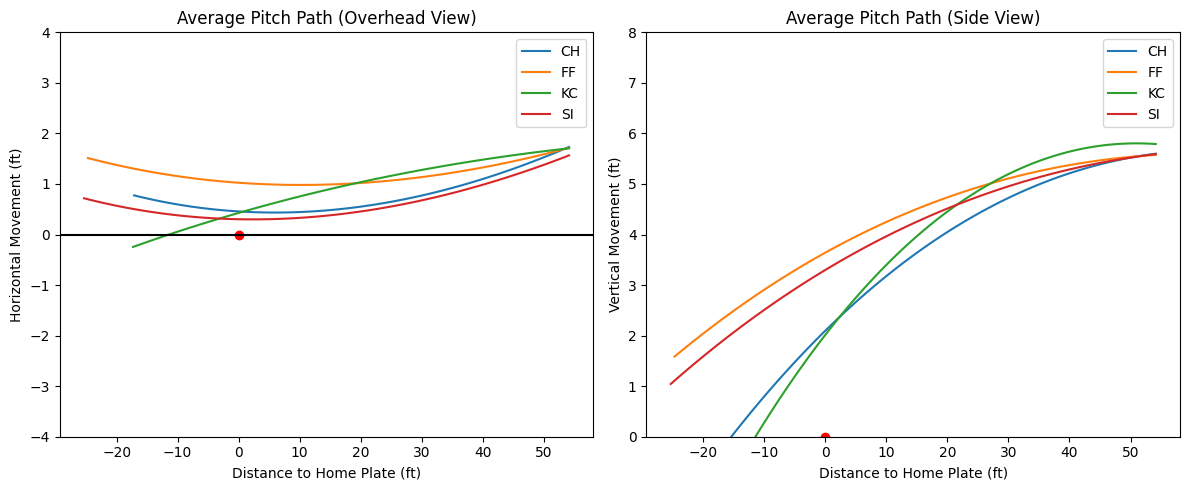

<Figure size 1200x500 with 0 Axes>

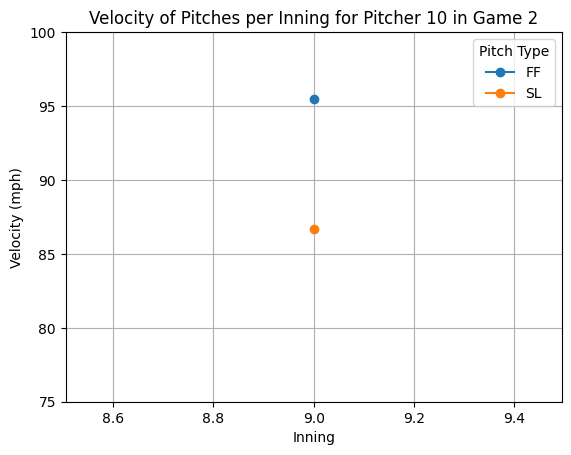

<Figure size 1200x500 with 0 Axes>

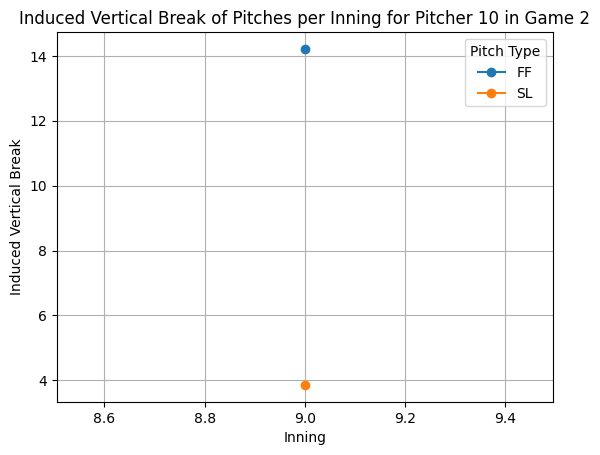

<Figure size 1200x500 with 0 Axes>

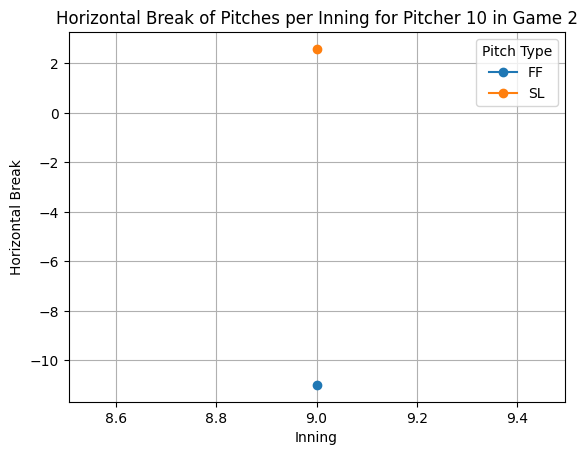

<Figure size 1200x500 with 0 Axes>

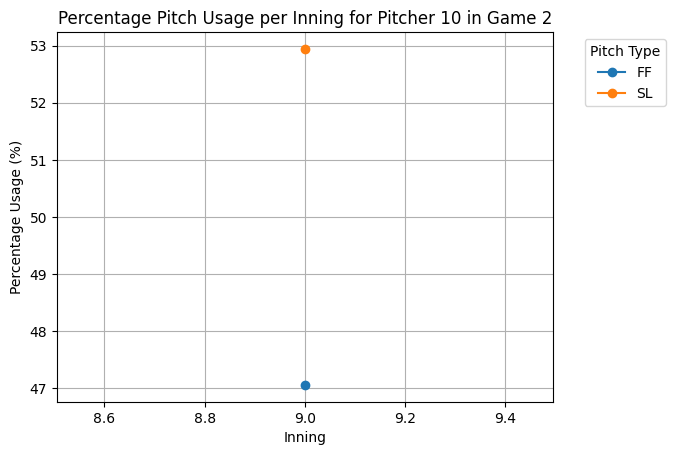

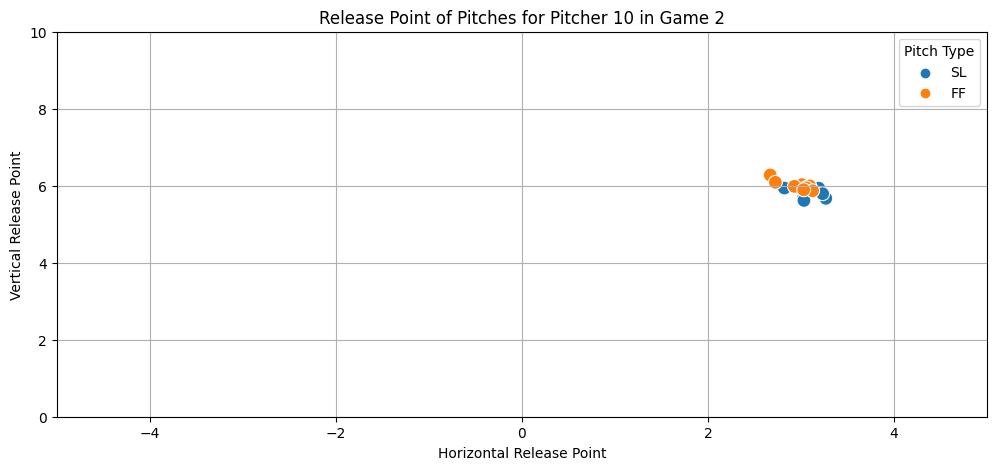

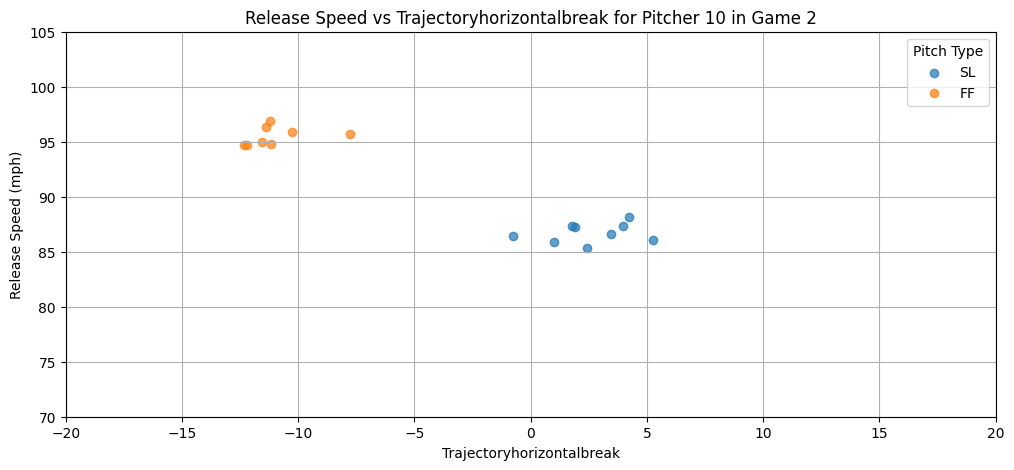

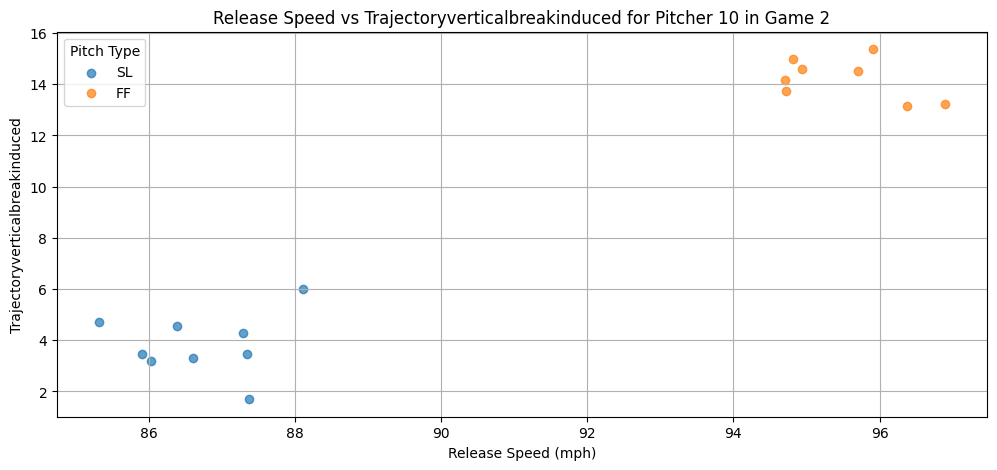

<Figure size 1200x500 with 0 Axes>

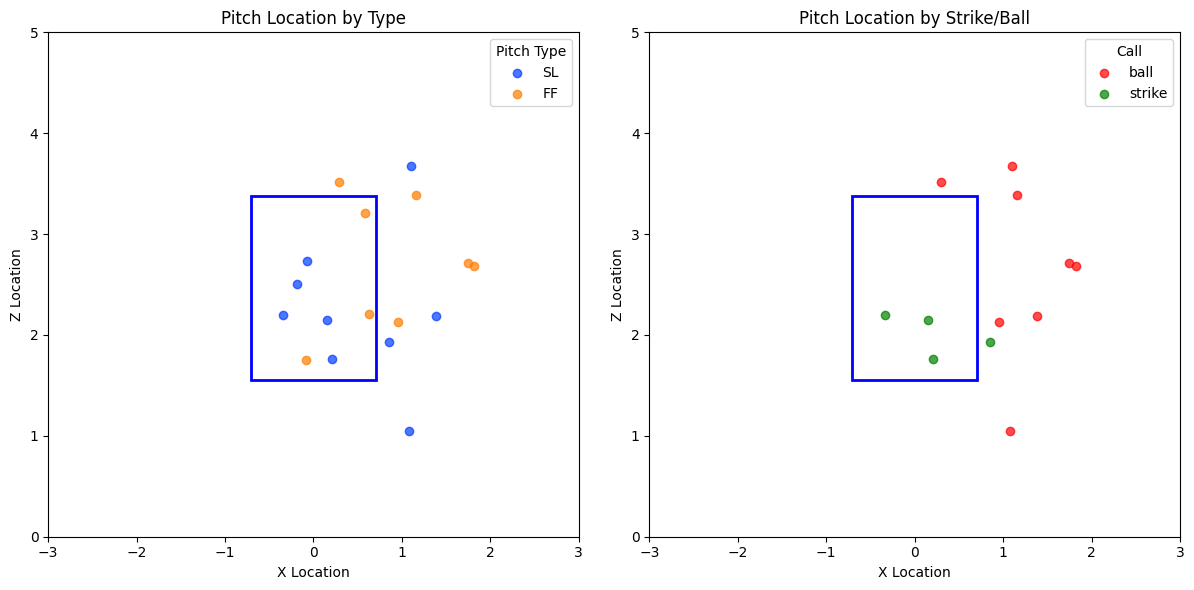

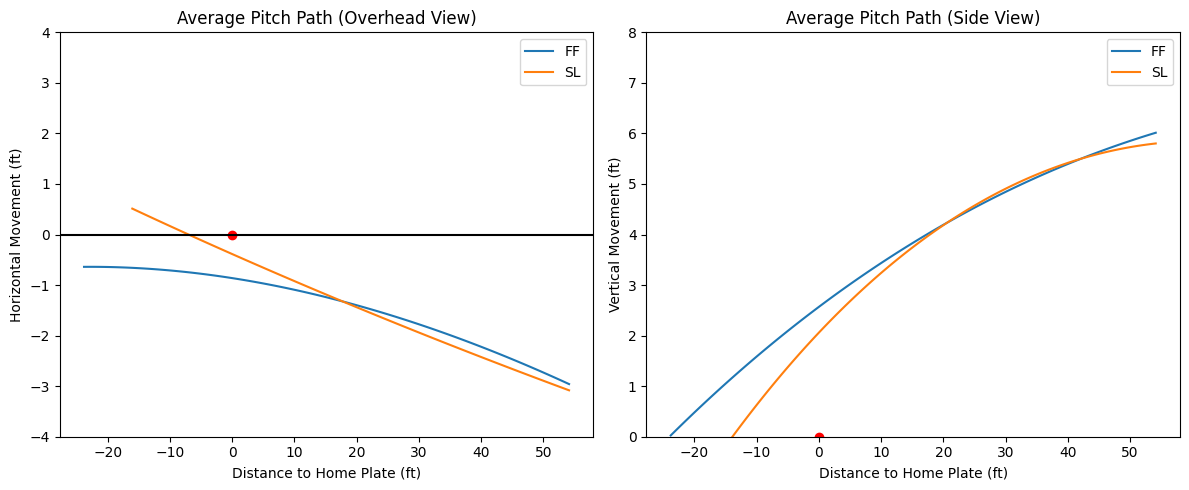

<Figure size 1200x500 with 0 Axes>

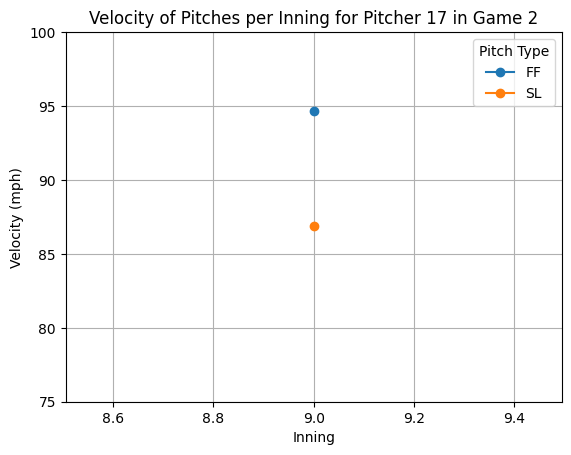

<Figure size 1200x500 with 0 Axes>

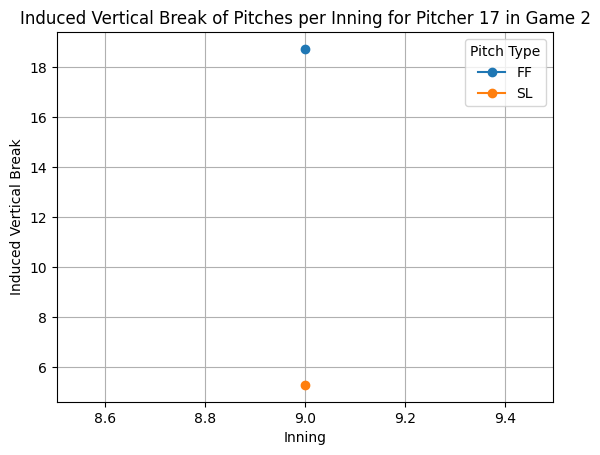

<Figure size 1200x500 with 0 Axes>

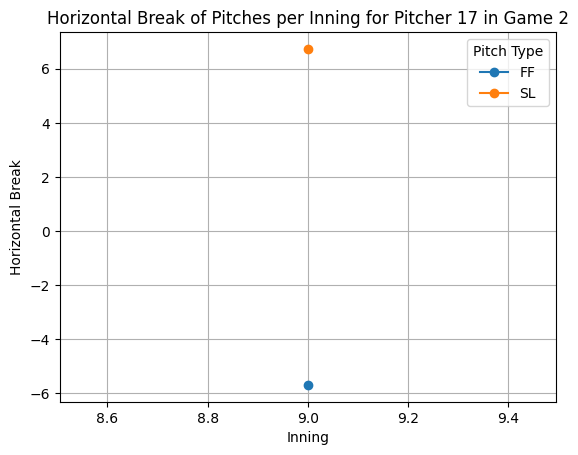

<Figure size 1200x500 with 0 Axes>

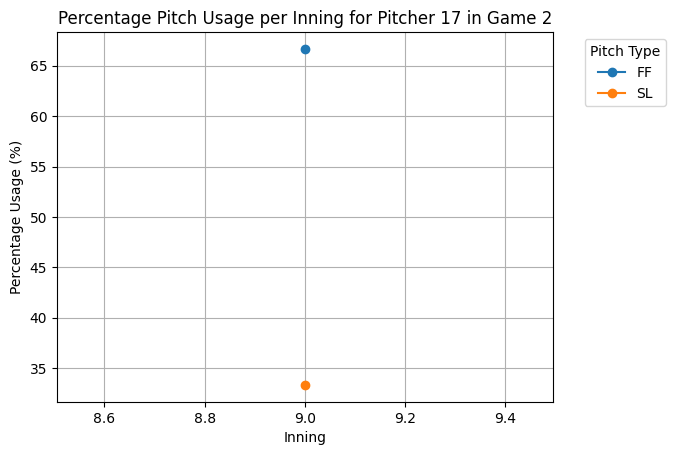

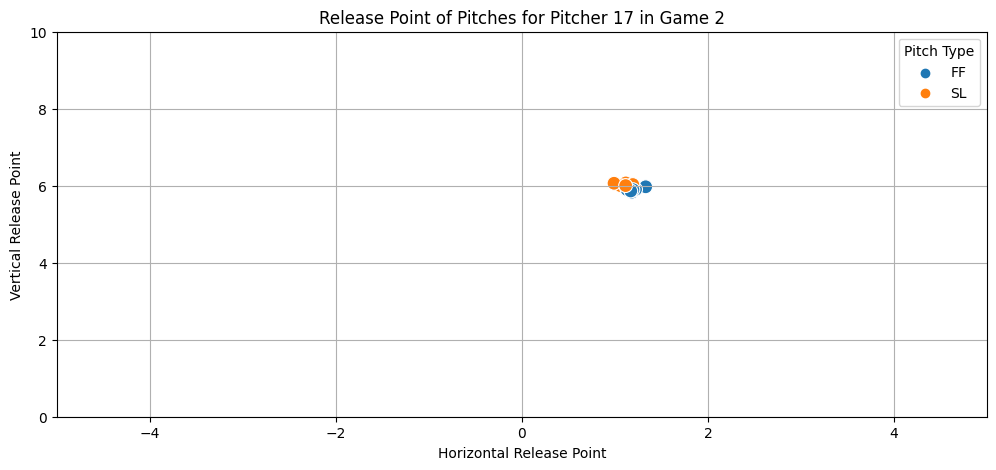

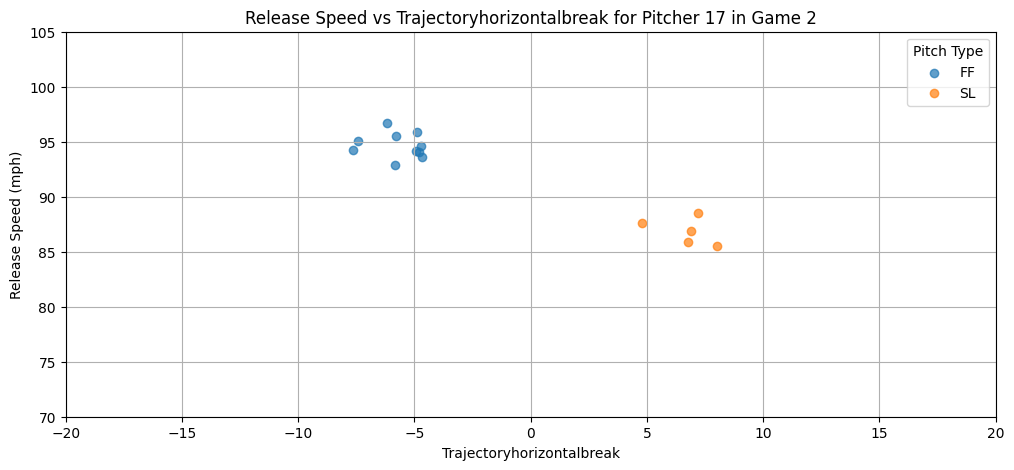

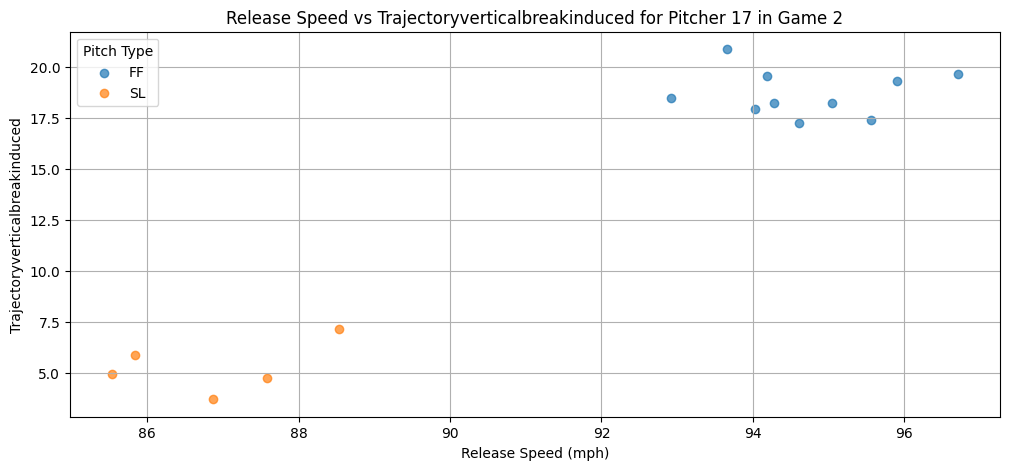

<Figure size 1200x500 with 0 Axes>

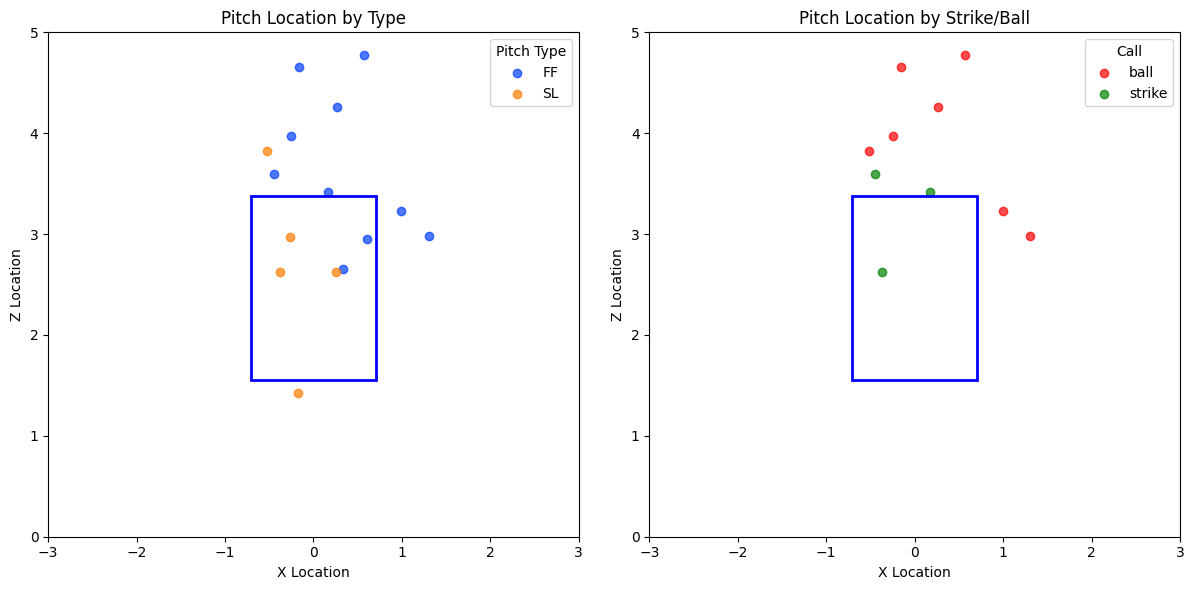

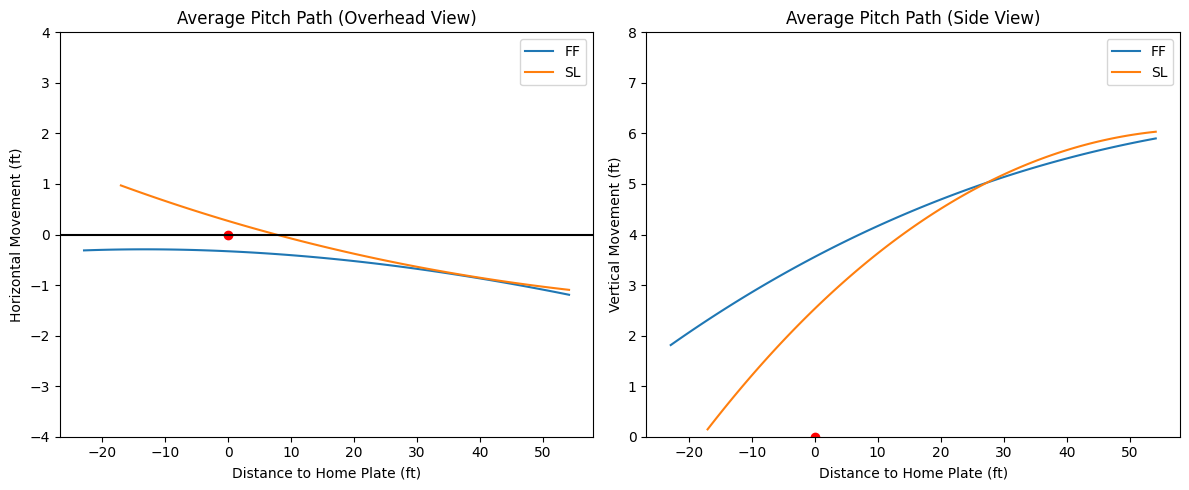

<Figure size 1200x500 with 0 Axes>

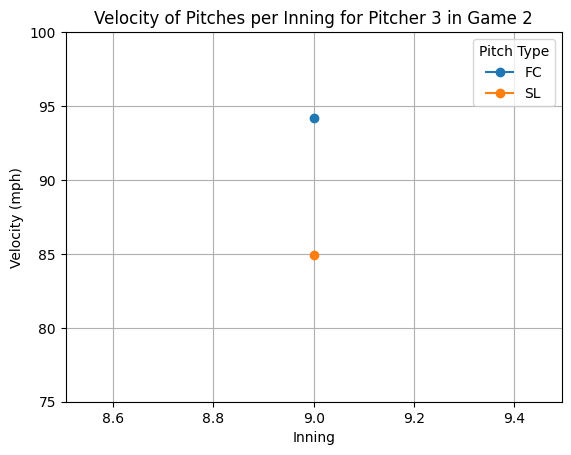

<Figure size 1200x500 with 0 Axes>

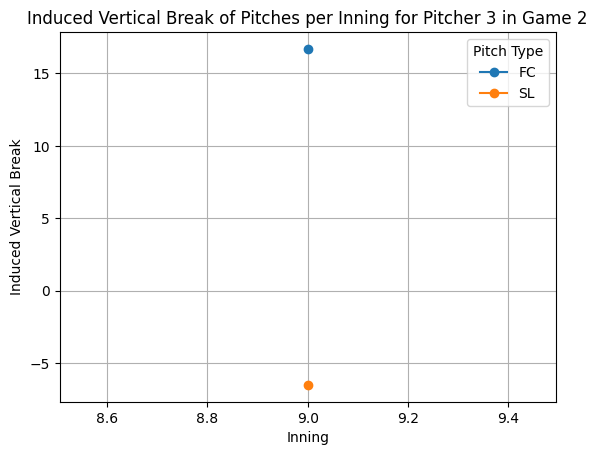

<Figure size 1200x500 with 0 Axes>

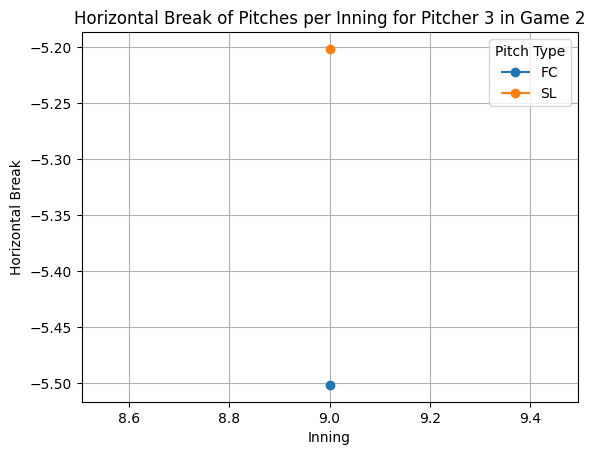

<Figure size 1200x500 with 0 Axes>

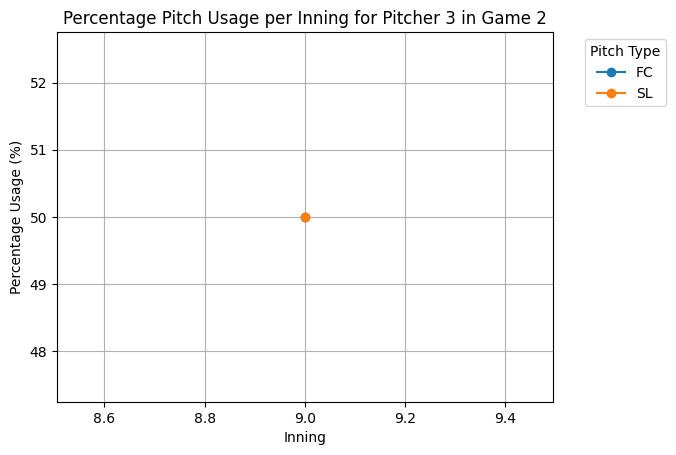

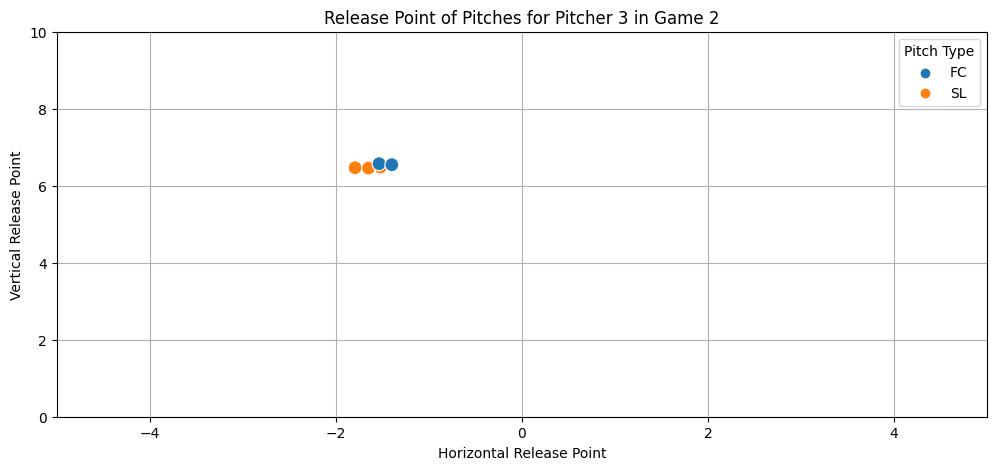

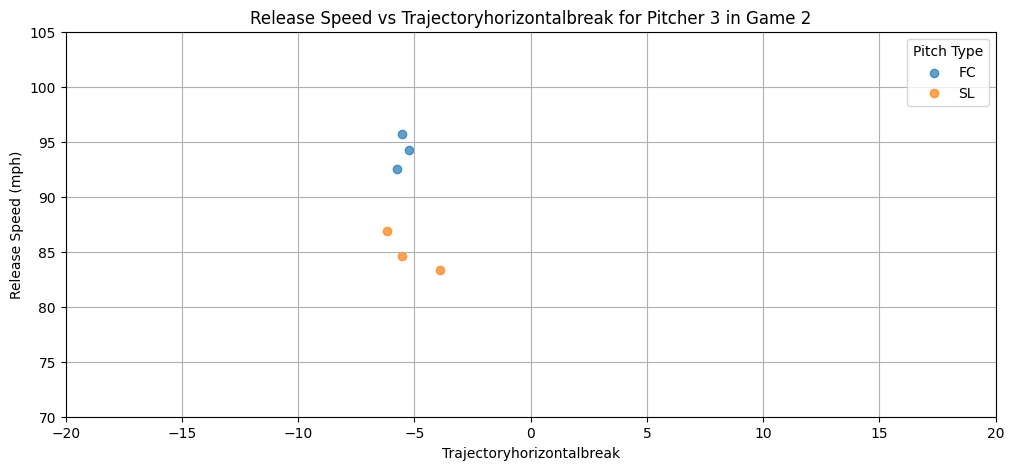

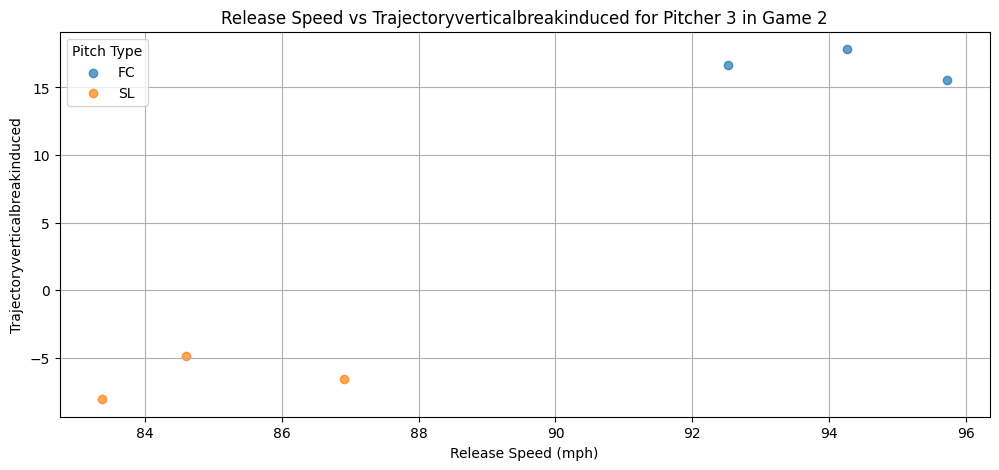

<Figure size 1200x500 with 0 Axes>

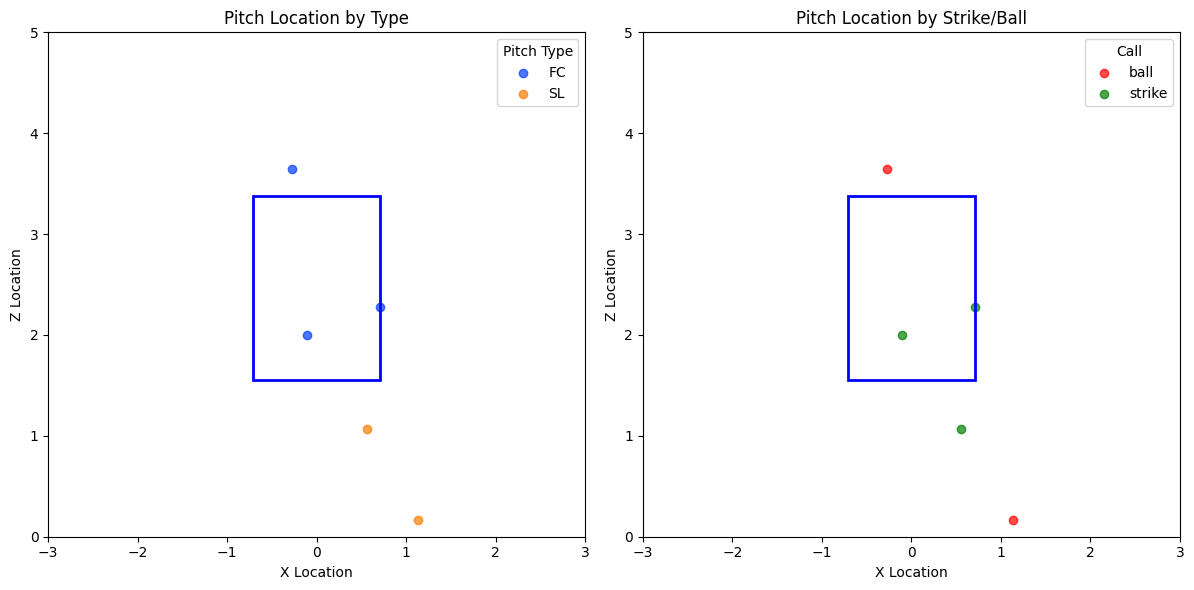

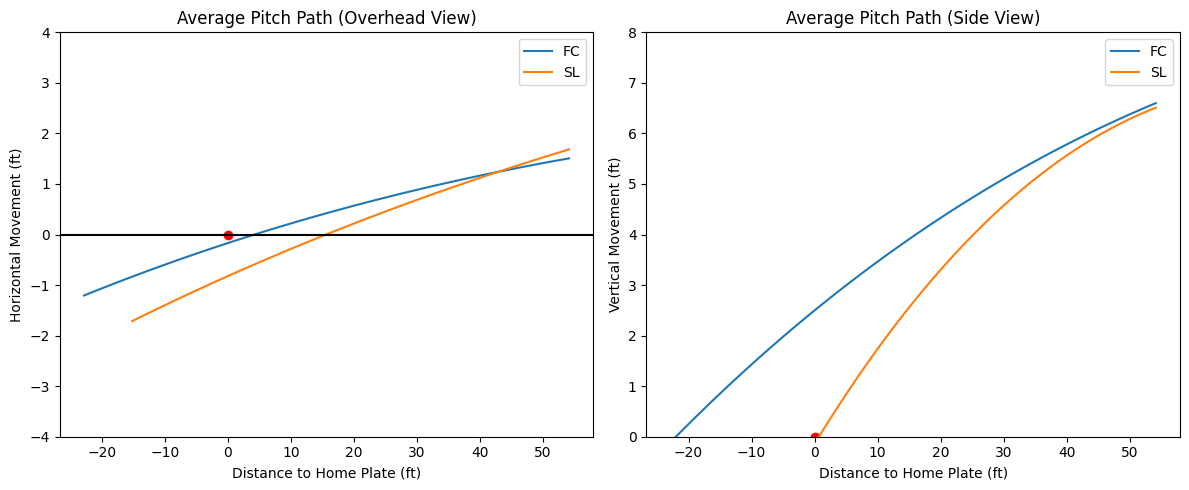

In [13]:
game_1 = data[data['GamePk']==1].reset_index(drop=True)
game_2 = data[data['GamePk']==2].reset_index(drop=True)

# game 1
for p in game_1['PitcherId'].unique():
    p_report = GameReport(game_1, 1, p)
    p_report.plot_velocity_per_inning()
    p_report.plot_vertical_movement_per_inning()
    p_report.plot_horizontal_movement_per_inning()
    p_report.plot_pitch_usage_percentage()
    p_report.plot_release_point()
    p_report.plot_speed_vs_horizontal_movement()
    p_report.plot_speed_vs_vertical_movement()
    p_report.plot_strike_zone()
    p_report.plot_pitch_paths()
    
# game 2
for p in game_2['PitcherId'].unique():
    p_report = GameReport(game_2, 2, p)
    p_report.plot_velocity_per_inning()
    p_report.plot_vertical_movement_per_inning()
    p_report.plot_horizontal_movement_per_inning()
    p_report.plot_pitch_usage_percentage()
    p_report.plot_release_point()
    p_report.plot_speed_vs_horizontal_movement()
    p_report.plot_speed_vs_vertical_movement()
    p_report.plot_strike_zone()
    p_report.plot_pitch_paths()

<Figure size 1200x500 with 0 Axes>

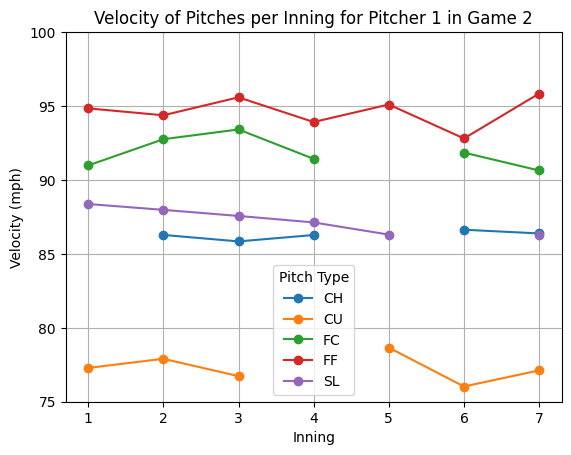

<Figure size 1200x500 with 0 Axes>

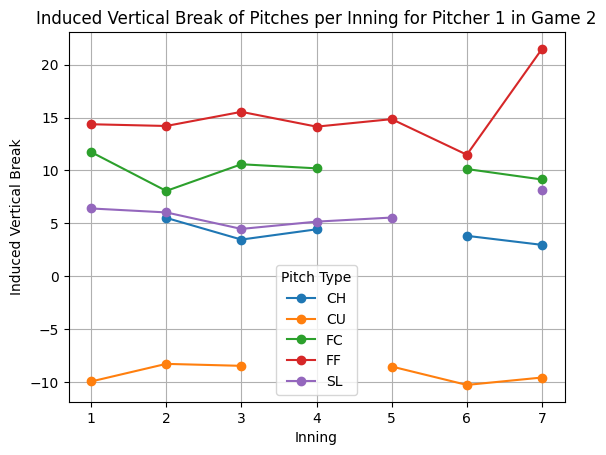

<Figure size 1200x500 with 0 Axes>

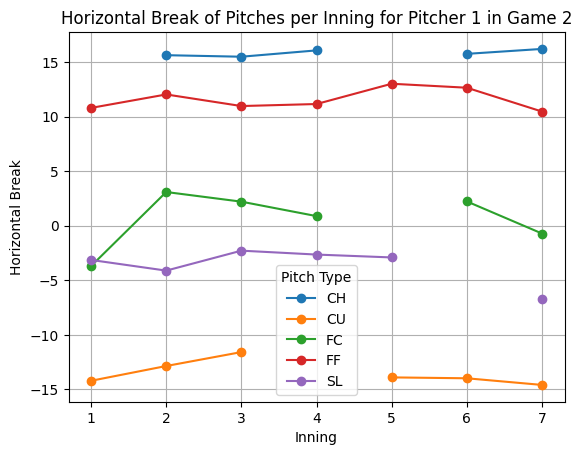

<Figure size 1200x500 with 0 Axes>

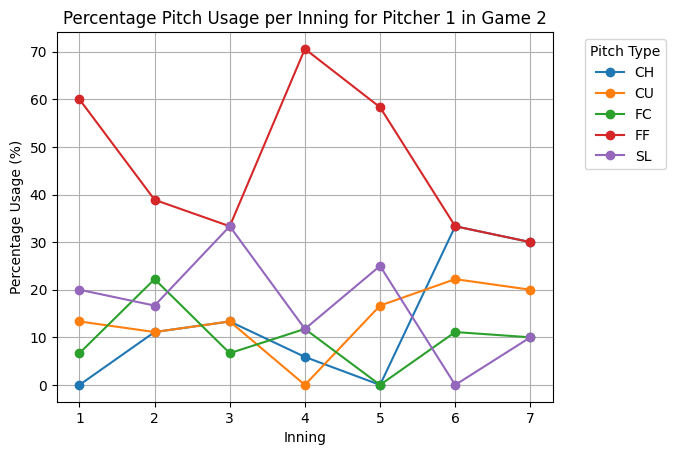

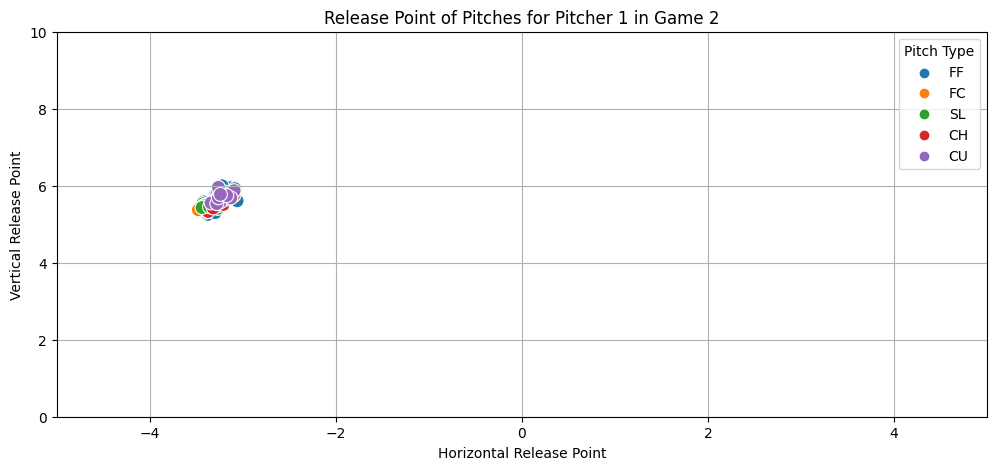

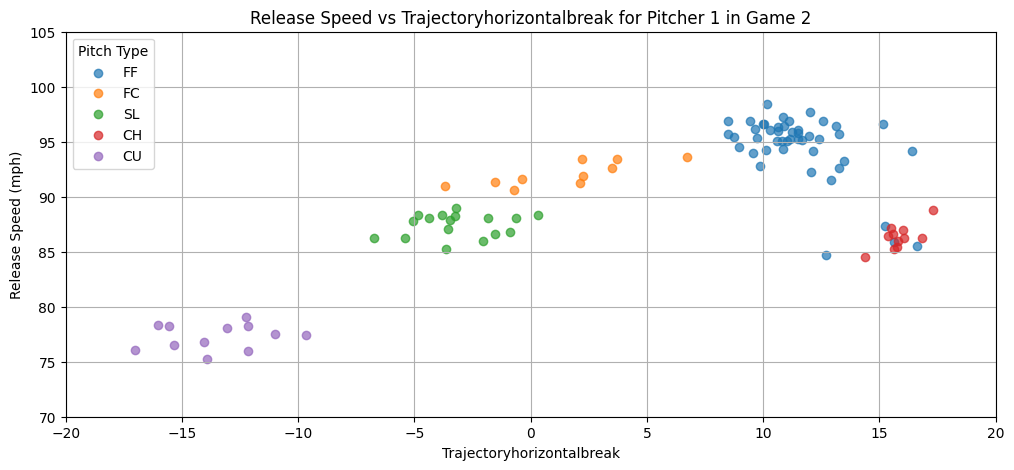

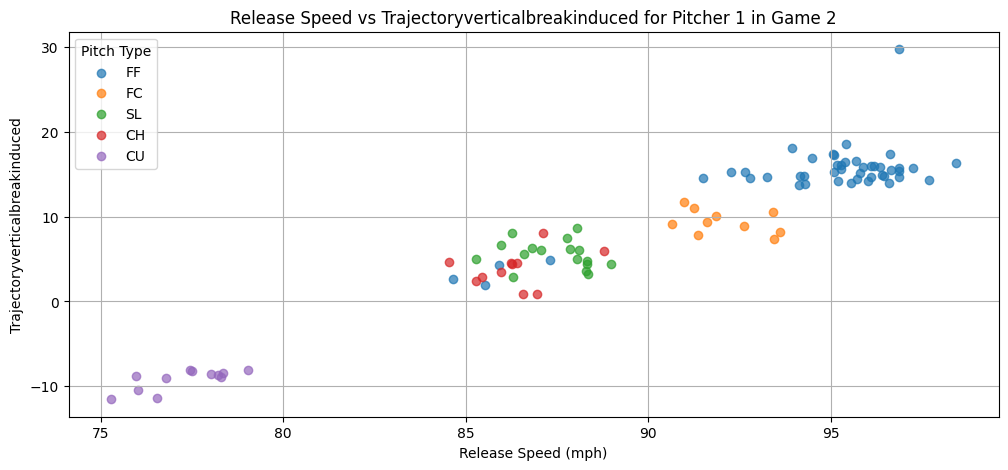

<Figure size 1200x500 with 0 Axes>

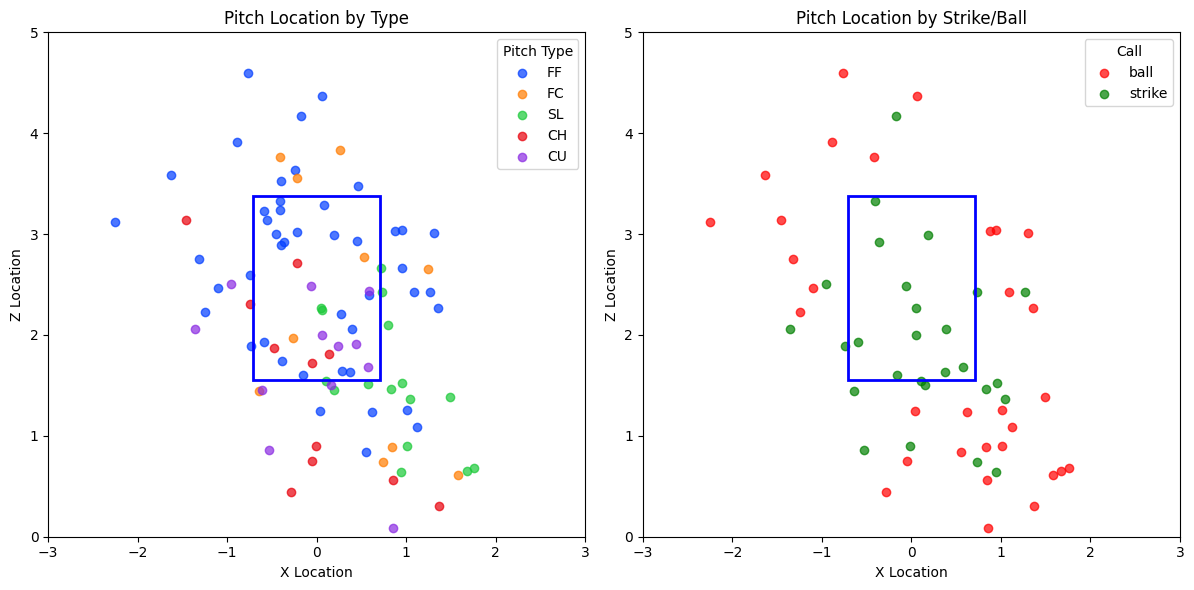

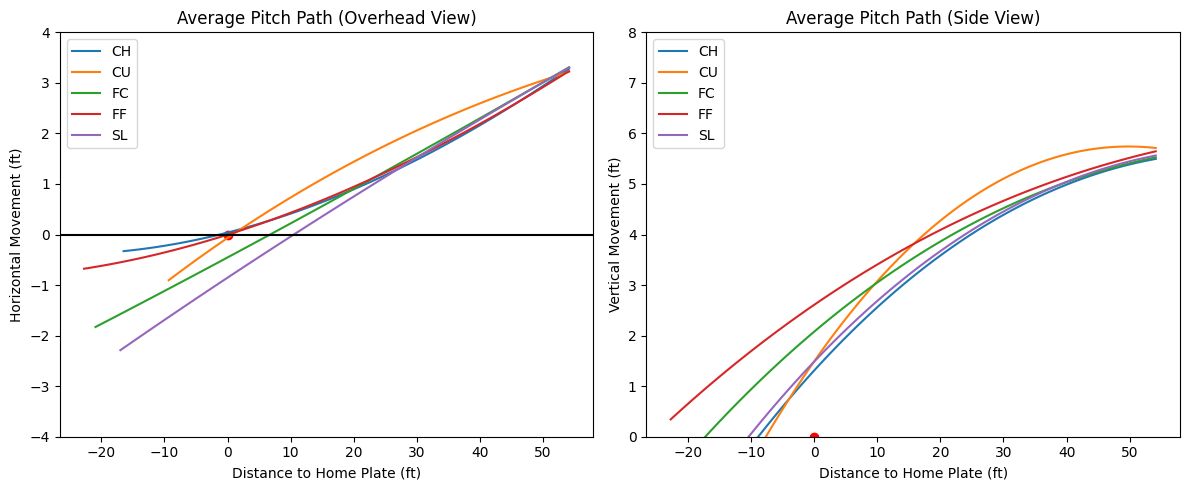

In [14]:
pitcher_1_1 = GameReport(data, 2, 1)
pitcher_1_1.plot_velocity_per_inning()
pitcher_1_1.plot_vertical_movement_per_inning()
pitcher_1_1.plot_horizontal_movement_per_inning()
pitcher_1_1.plot_pitch_usage_percentage()
pitcher_1_1.plot_release_point()
pitcher_1_1.plot_speed_vs_horizontal_movement()
pitcher_1_1.plot_speed_vs_vertical_movement()
pitcher_1_1.plot_strike_zone()
pitcher_1_1.plot_pitch_paths()

<Figure size 1200x500 with 0 Axes>

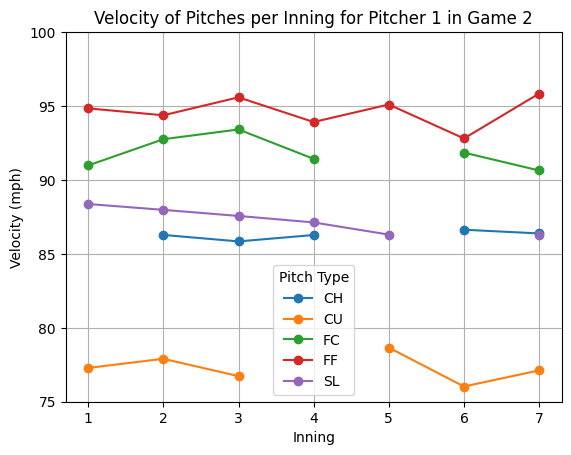

<Figure size 1200x500 with 0 Axes>

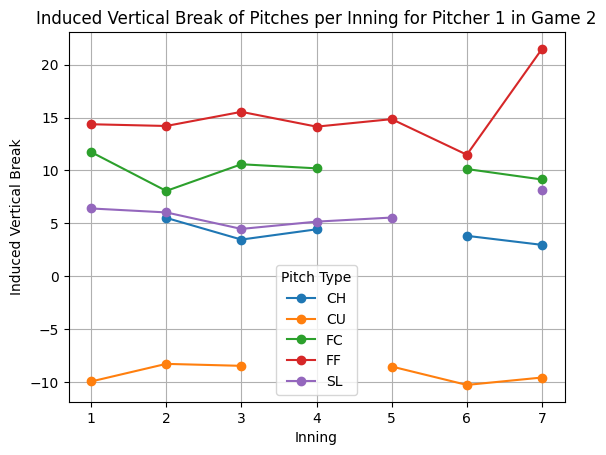

<Figure size 1200x500 with 0 Axes>

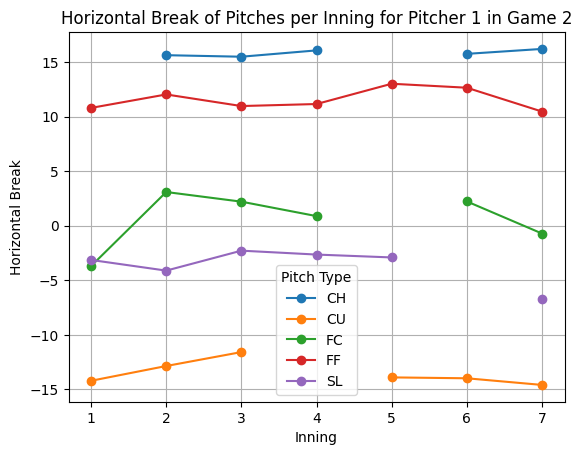

<Figure size 1200x500 with 0 Axes>

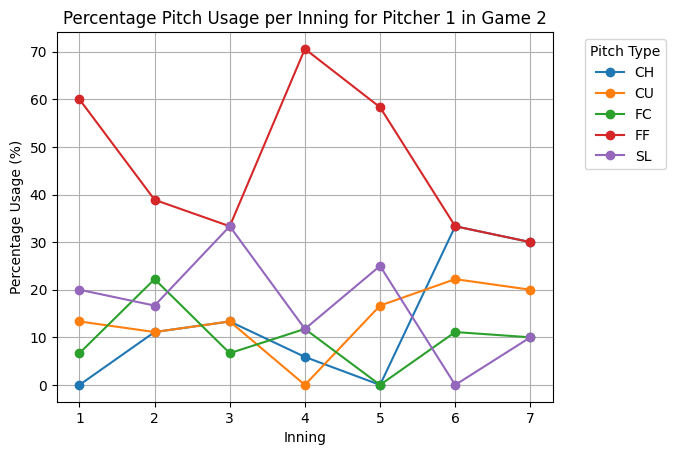

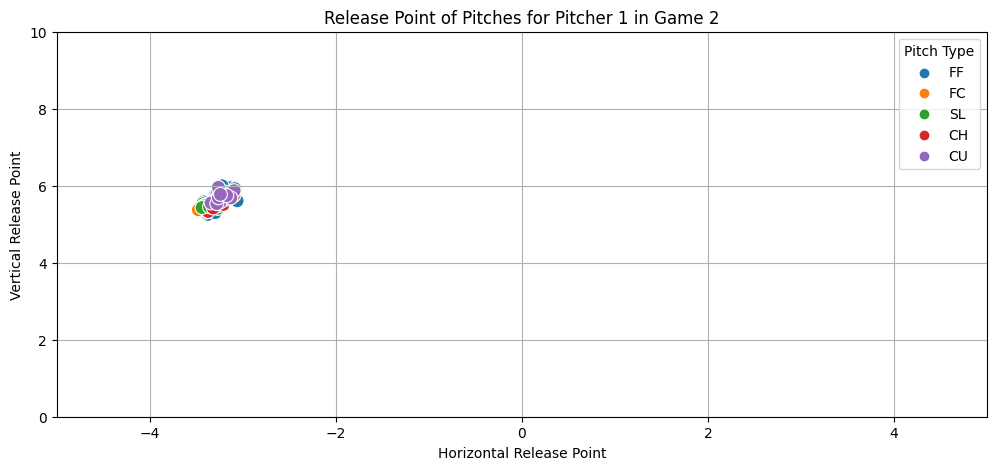

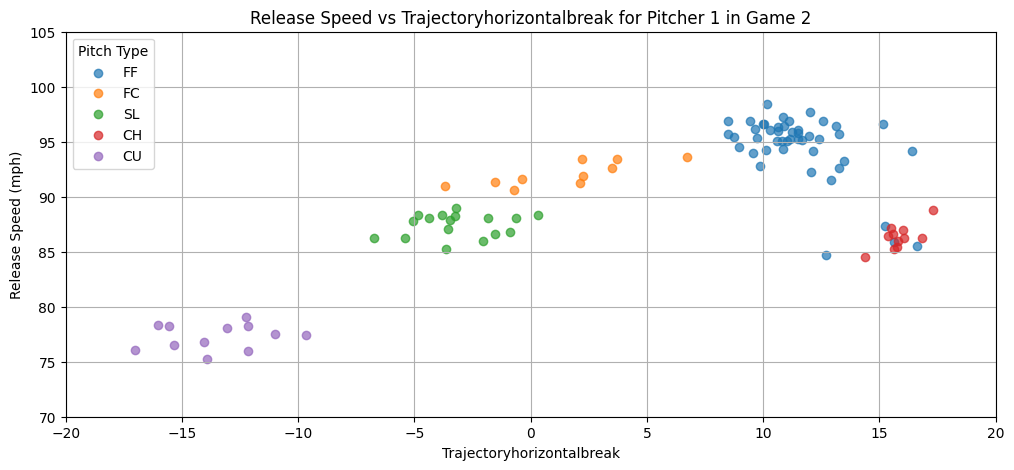

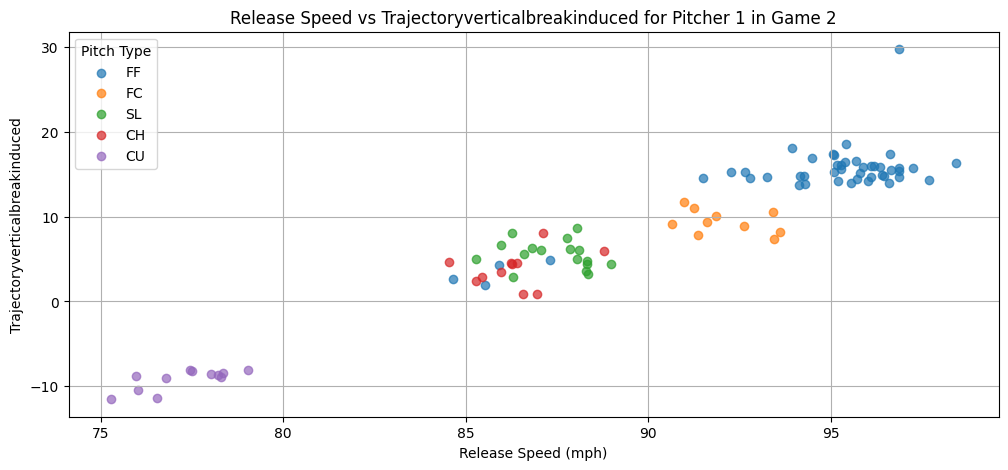

<Figure size 1200x500 with 0 Axes>

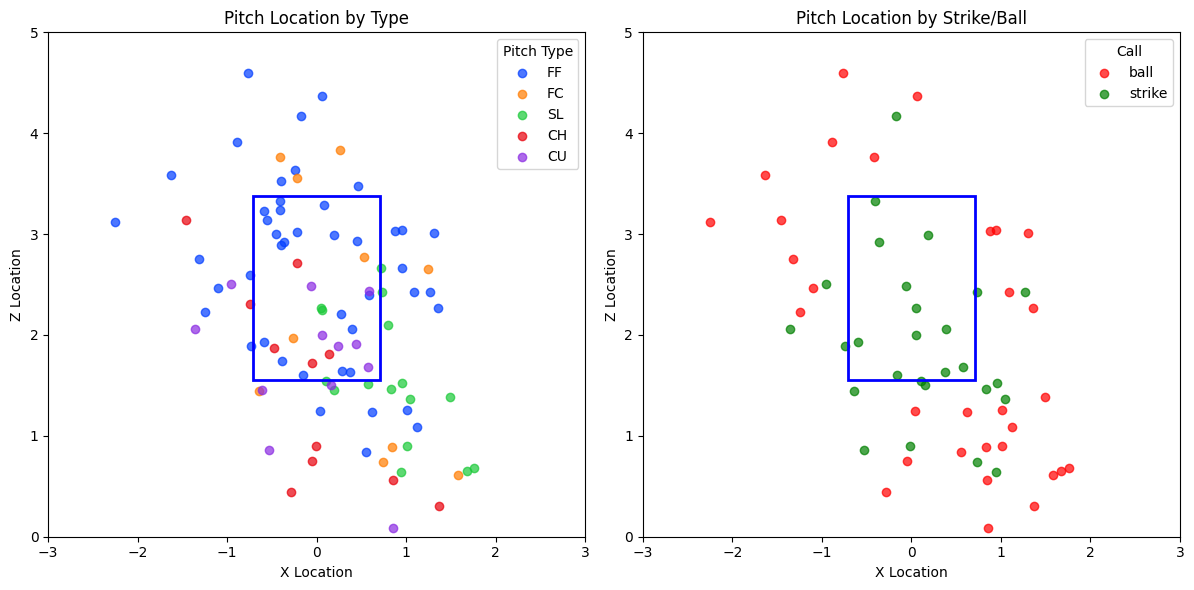

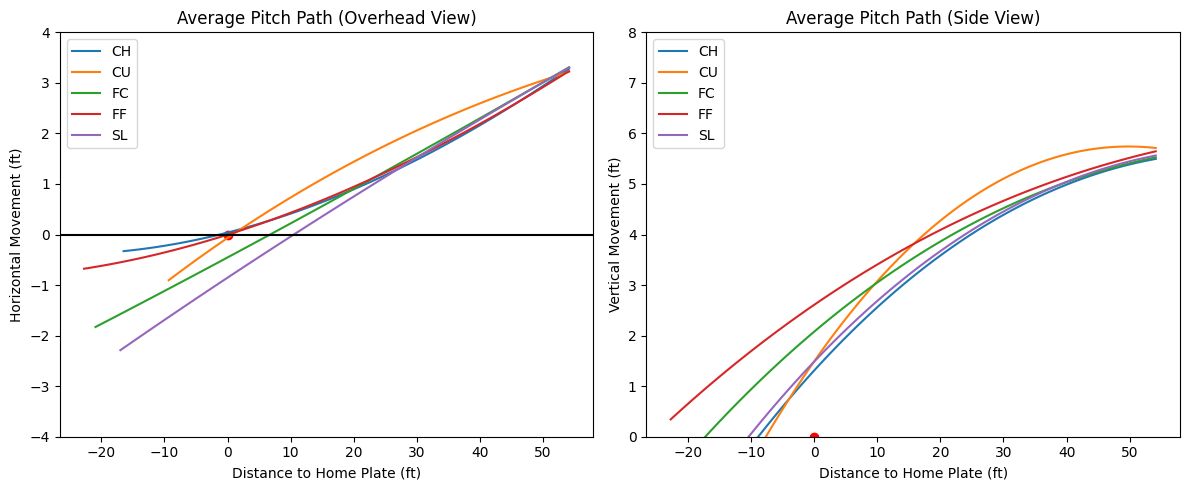

In [15]:
pitcher_2_1 = GameReport(data, 2, 1)
pitcher_2_1.plot_velocity_per_inning()
pitcher_2_1.plot_vertical_movement_per_inning()
pitcher_2_1.plot_horizontal_movement_per_inning()
pitcher_2_1.plot_pitch_usage_percentage()
pitcher_2_1.plot_release_point()
pitcher_2_1.plot_speed_vs_horizontal_movement()
pitcher_2_1.plot_speed_vs_vertical_movement()
pitcher_2_1.plot_strike_zone()
pitcher_2_1.plot_pitch_paths()